<center> <h1>Perturbation Analysis </h1> </center>

&nbsp;

&nbsp;

In this notebook, we investigate the  ability of the **GraphWave** algorithm to detect structural similarities, as well as its robustness to small perturbations. We propose an analysis of the accuracy of the recovery of the different topological roles based on simulations on toy graphs, so that we benefit from an actual ground-truth to benchmark the different results. 

The setup of the experiment is the following:

1. We begin by creating a toy graph (that is, a regular structure with repetitions of identical patterns at different areas of the graph). Each type of structural role (that is, bottom corner in the house shape, middle of the center ring, etc.) is endowed with a particular label.
2. __Optional__: to simulate the effect of small perturbations, we artificially remove and add a few edges on the graph
3. We compute the structural representations given by our method, as well as RolX and struct2vec
4. To assess the relevance of our results, we propose to evaluate our method using 3 different criteria:
    + We project these representations in 2D using PCA: the idea is to try to assess visually the proximity of the different featurization. 
    + We also plug-in these representations as input into a clustering algorithm (default: kmeans), and assess the purity of the clusters that are recovered using k-means. This gives us an indicator of the relevance of our embeddings if the goal was to recover $K$ distinct classes of structural equivalents.
    + Finally, we assess the "purity" of the nearest neighbors: that is, among the $j$ nearest neighbors(j being fixed), what are the percentage of these neighbors that are of the same class as the node.


To this end, the function *clustering_comparative_analysis* automatically compares the different featurizations.

## I. Loading the modules and creating the graph

In [1]:
%matplotlib inline
import numpy as np
import networkx as nx 
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import matplotlib.pyplot as plt
import sys
import seaborn as sb
sys.path.append( '../../structural_equivalents/')
#sys.path.append('/Users/cdonnat/Desktop/structural_equivalents/')
from SC import *
from distances_signature import *
from shapes.shapes import *
from heat_diffusion import *
from clustering_via_distances import *
import graph_tools 
from utils import *
#from stats.statistic_checks import *
from purity import *
from characteristic_functions import *
from clustering_comparative_analysis import *
from cluster_analysis import *
from performance_evaluation import *
#import sys
#sys.path.append( '../structural_equivalents/struc2vec_alg/src')

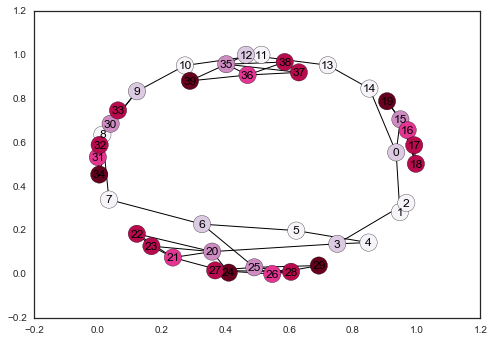

In [6]:
# 1- Start by defining our favorite regular structure

width_basis=15
nbTrials=20


################################### EXAMPLE TO BUILD A SIMPLE REGULAR STRUCTURE ##########
## REGULAR STRUCTURE: the most simple structure:  basis + n small patterns of a single type

### 1. Choose the basis (cycle, torus or chain)
basis_type="cycle" 

### 2. Add the shapes 
nb_shapes=5  ## numbers of shapes to add 
#shape=["fan",6] ## shapes and their associated required parameters  (nb of edges for the star, etc)
#shape=["star",6]
shape=["house"]

### 3. Give a name to the graph
identifier='AA'  ## just a name to distinguish between different trials
name_graph='houses'+ identifier
sb.set_style('white')

### 4. Pass all these parameters to the Graph Structure
G,colors=build_regular_structure(width_basis,basis_type, nb_shapes,shape, start=0,add_random_edges=0,plot=True,savefig=False)
A=nx.adjacency_matrix(G).todense()
nb_clust=len(np.unique(colors))



## Start the analysis!!

2017-10-12 16:14:46,746:[INFO](pygsp.filters.filter.__init__): Heat : has to compute lmax
2017-10-12 16:14:46,775:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-10-12 16:14:46,898:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-10-12 16:14:46,966:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-10-12 16:14:47,078:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-10-12 16:14:47,151:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-10-12 16:14:47,203:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-10-12 16:14:47,254:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-10-12 16:14:47,307:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-10-12 16:14:47,381:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-10-12 16:14:47,444:[INFO](pygsp.filters.filter.analysis): The analysis method

Creating Vertex Features matrix
V is a 40 by 8 matrix.
Node-role matrix is of dimensions 40 by 6
[[ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959  

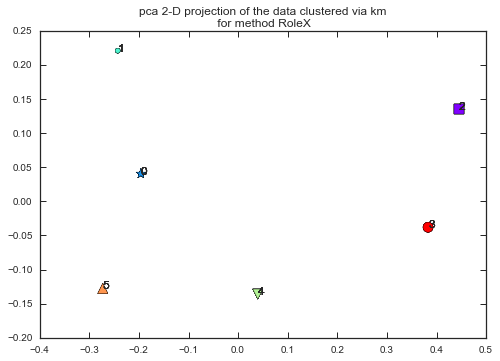

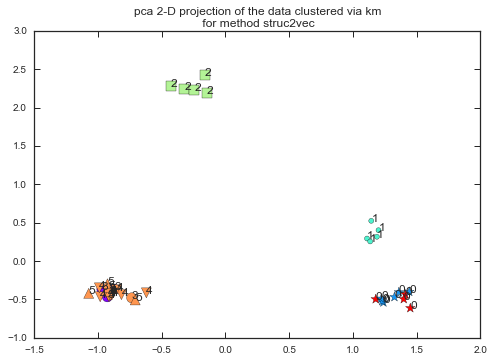

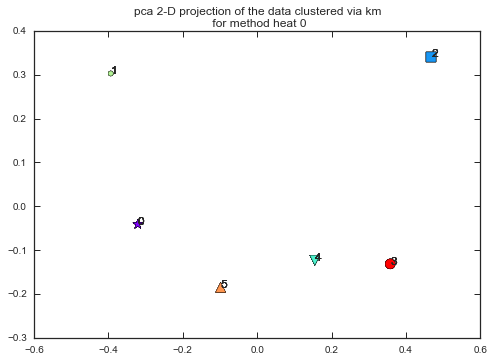

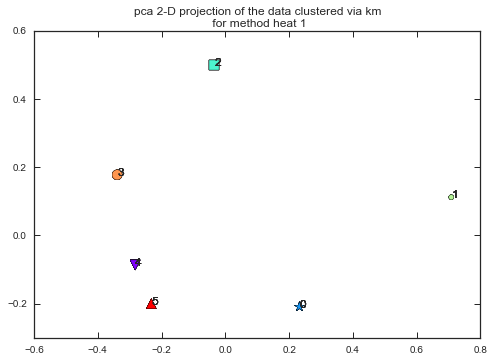

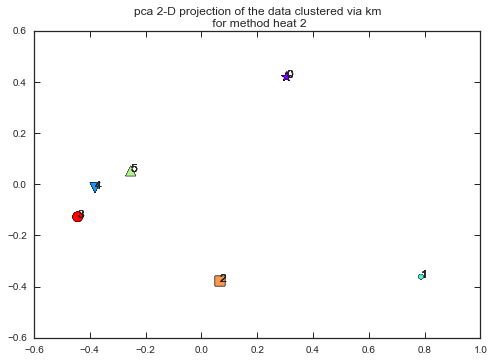

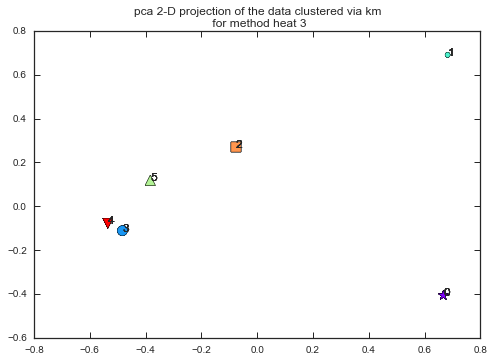

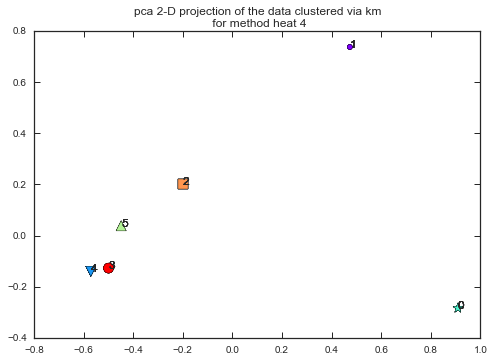

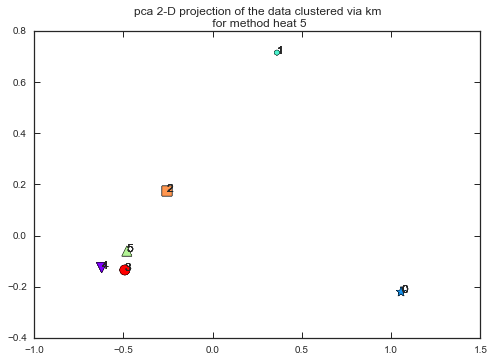

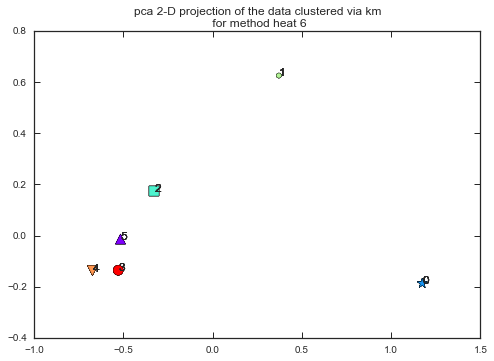

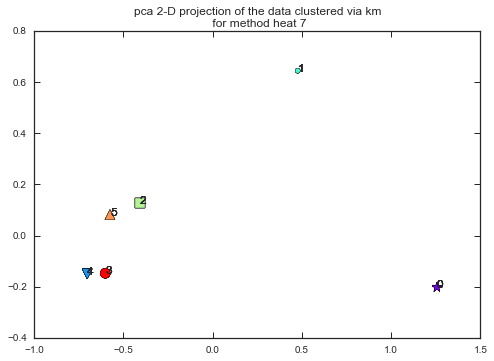

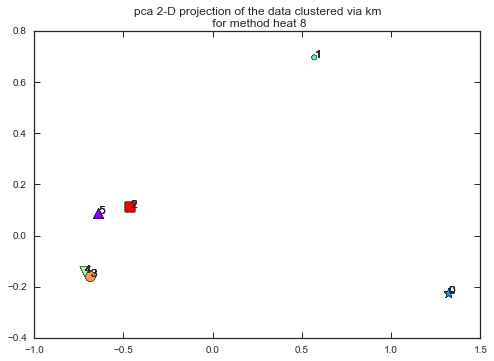

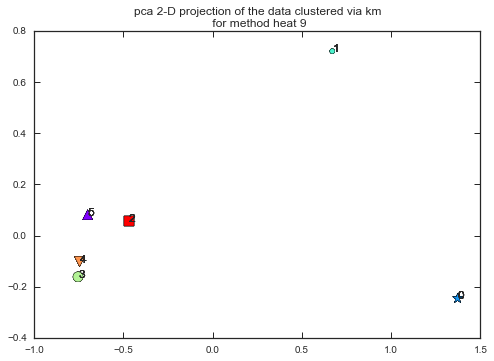

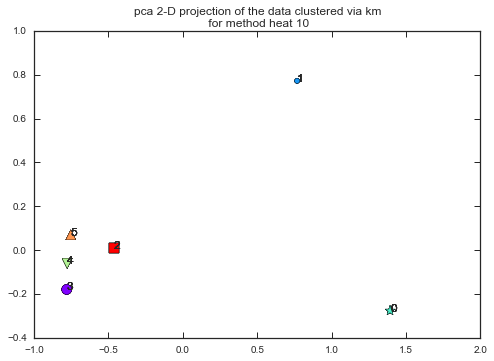

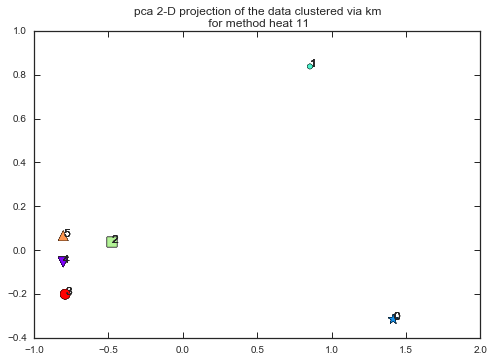

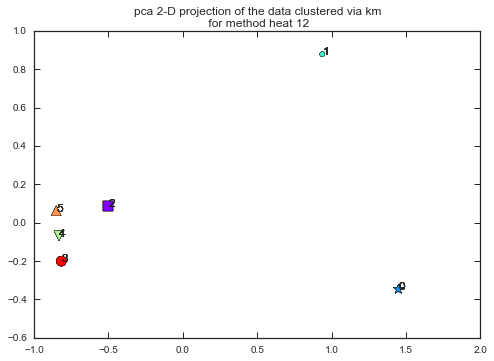

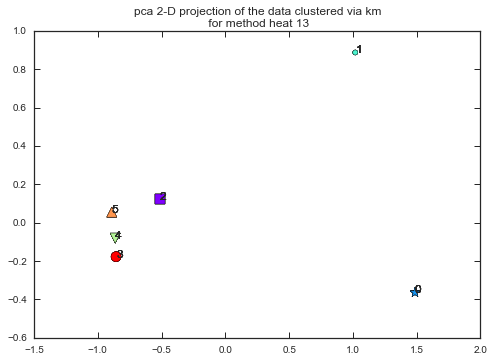

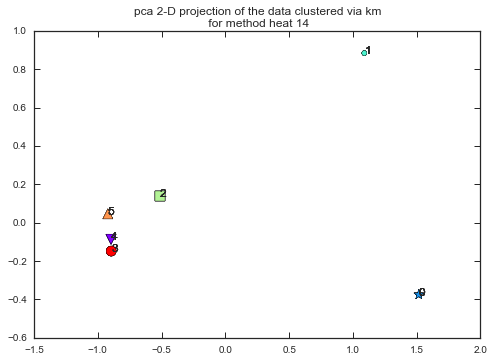

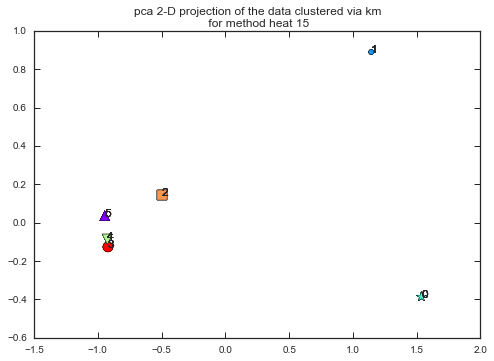

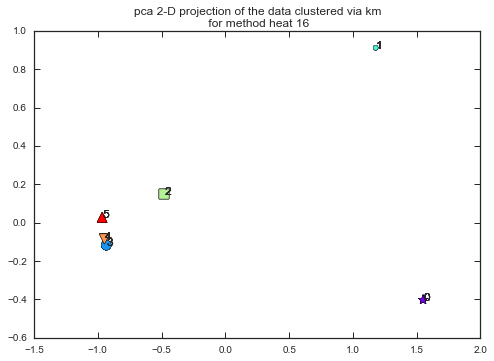

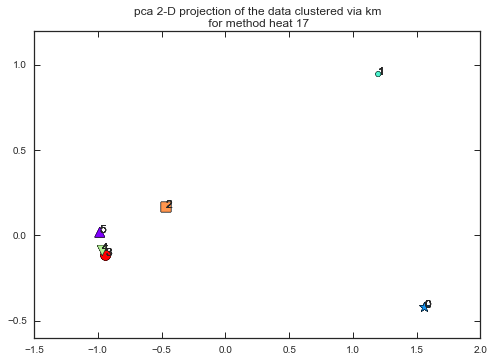

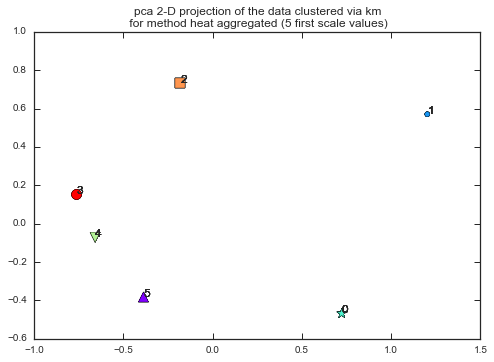

smax= 18  and smin= 1


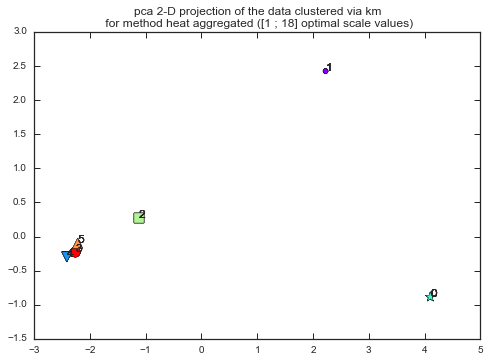

smax= 6  and smin= 1


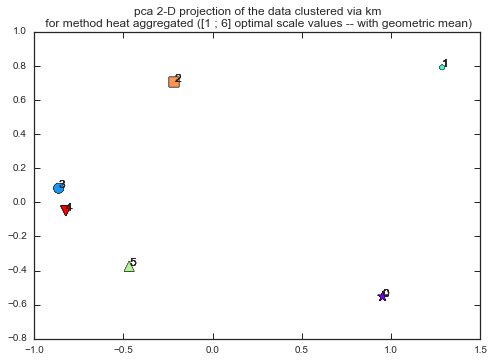

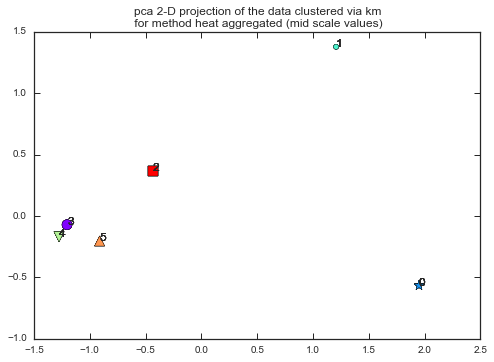

Creating Vertex Features matrix
V is a 40 by 8 matrix.
Node-role matrix is of dimensions 40 by 6
[[ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959  

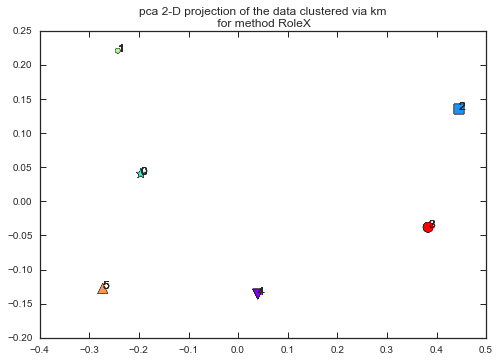

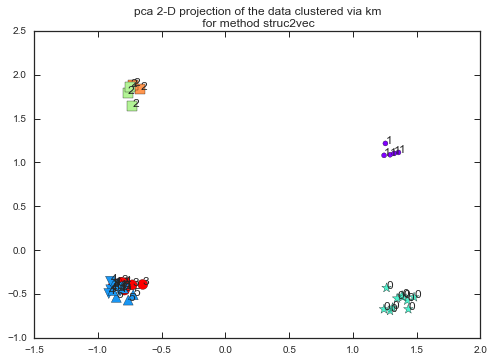

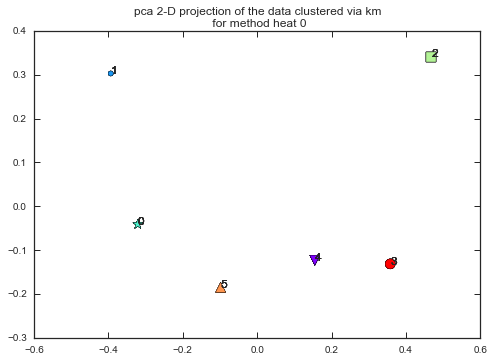

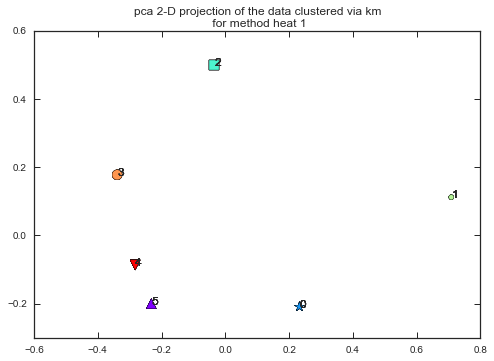

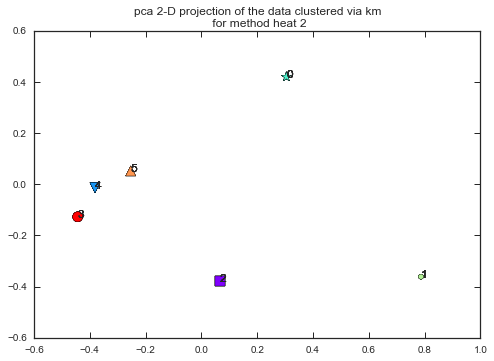

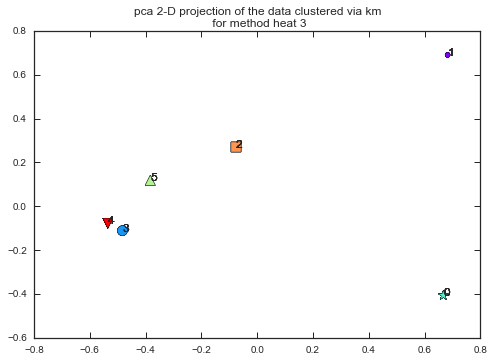

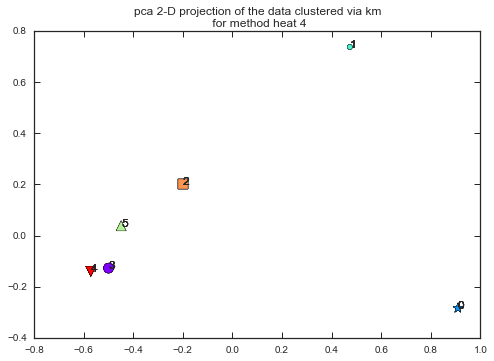

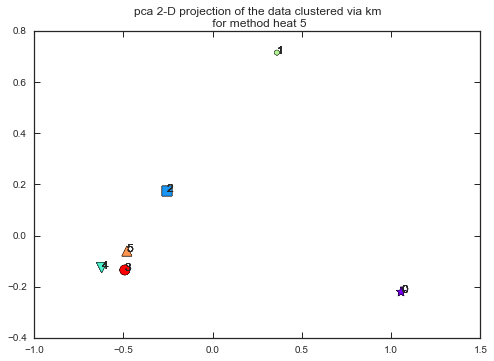

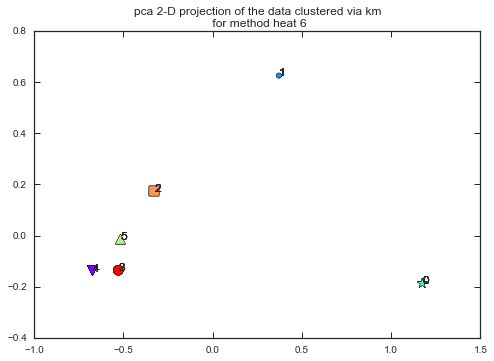

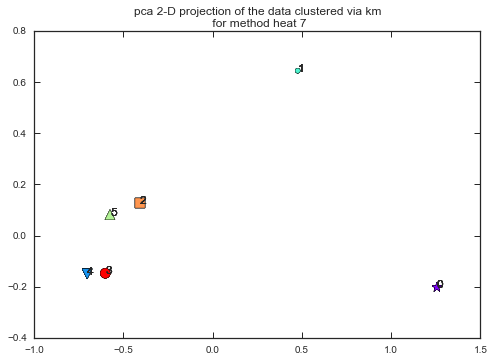

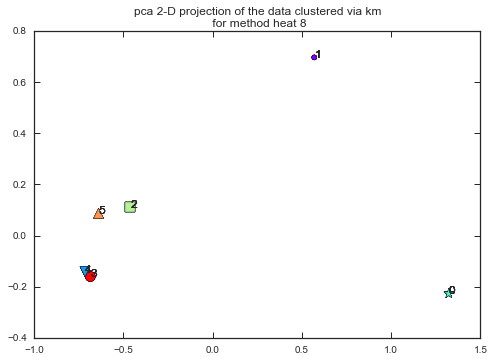

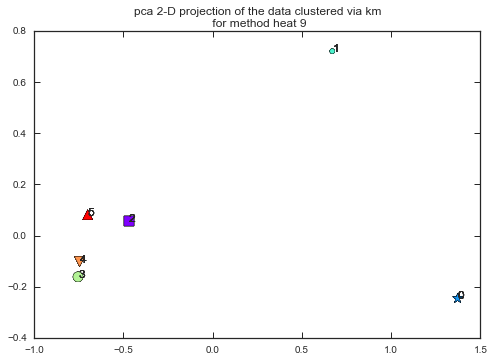

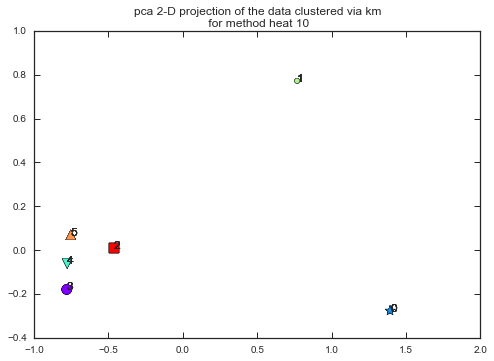

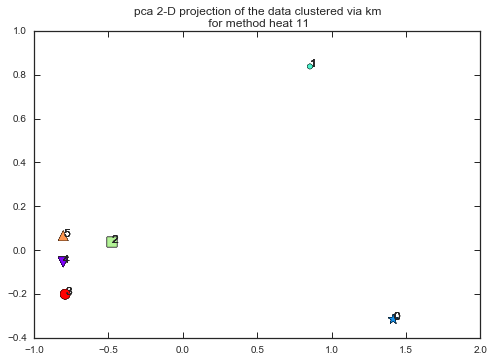

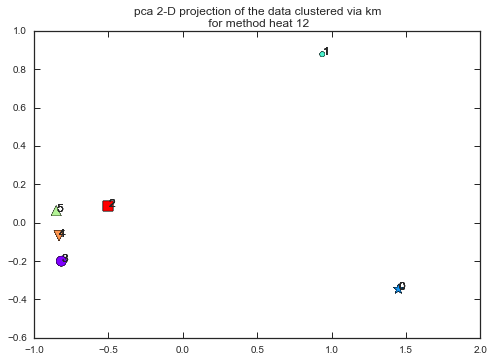

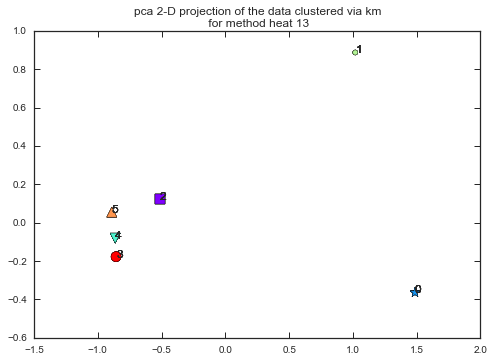

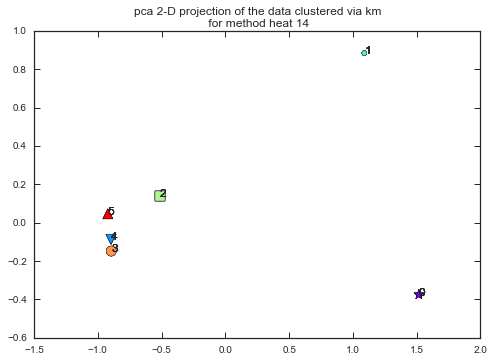

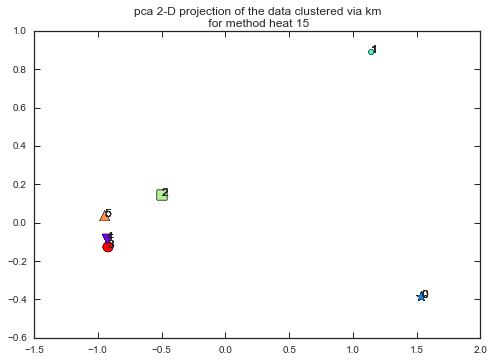

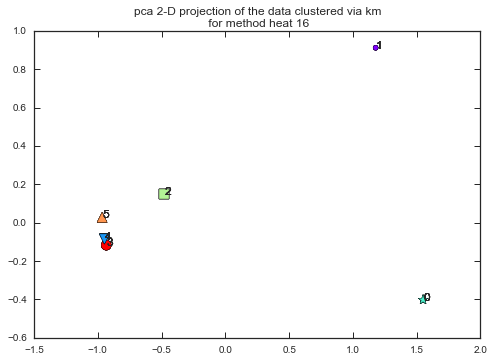

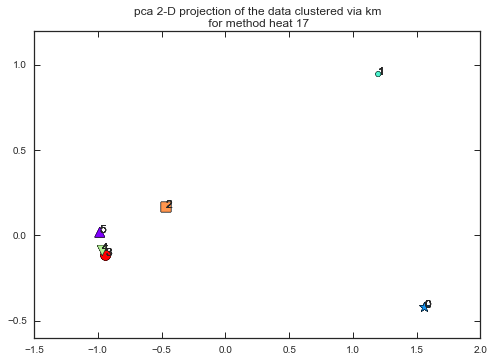

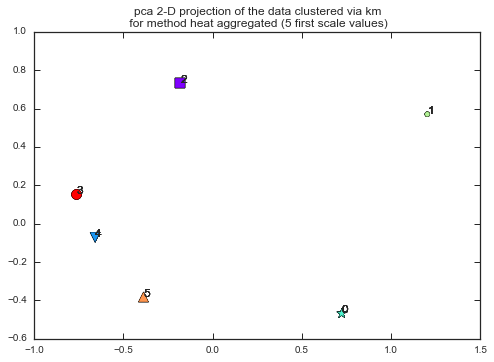

smax= 18  and smin= 1


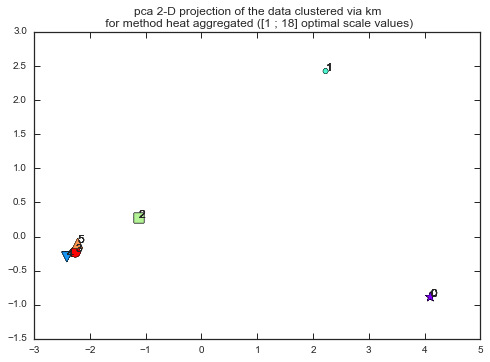

smax= 6  and smin= 1


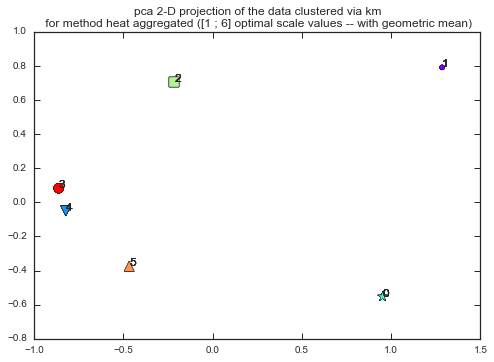

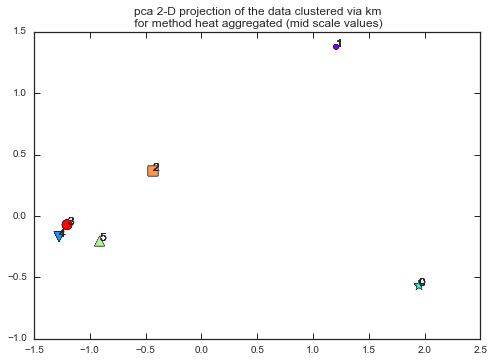

Creating Vertex Features matrix
V is a 40 by 8 matrix.
Node-role matrix is of dimensions 40 by 6
[[ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959  

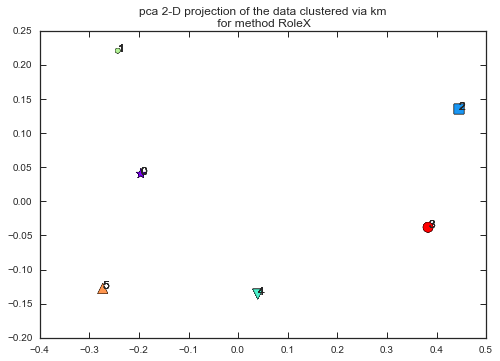

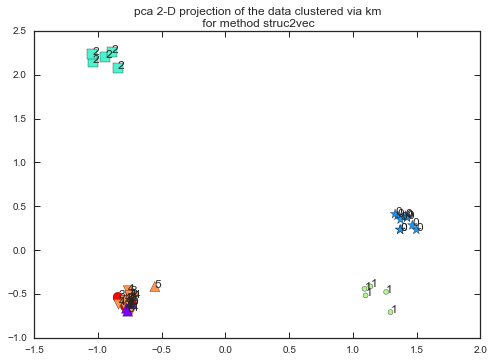

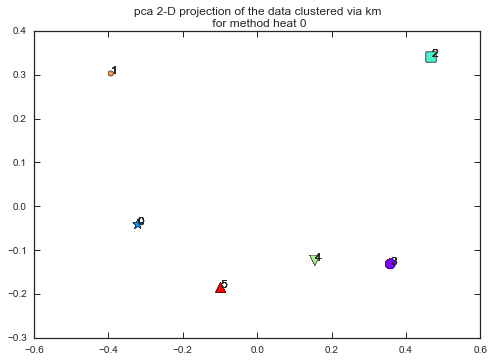

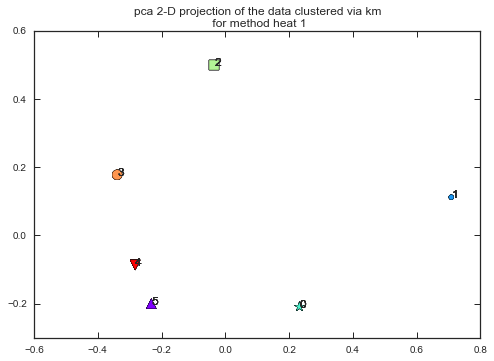

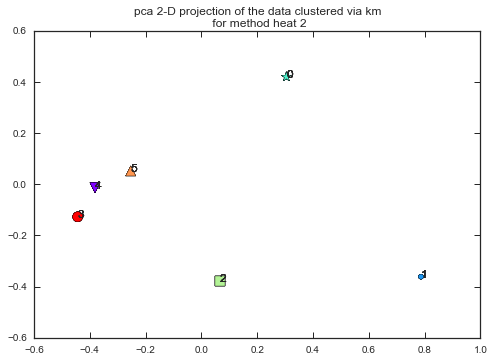

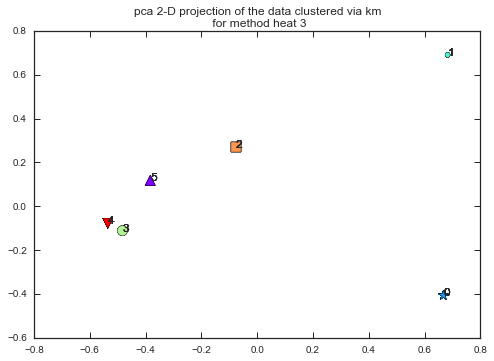

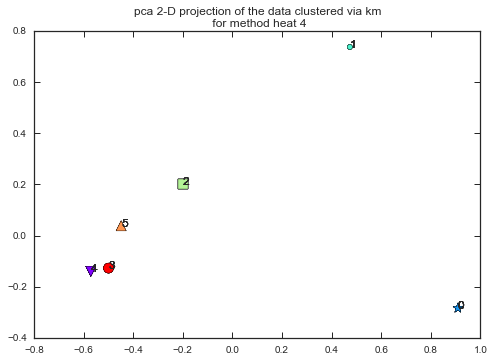

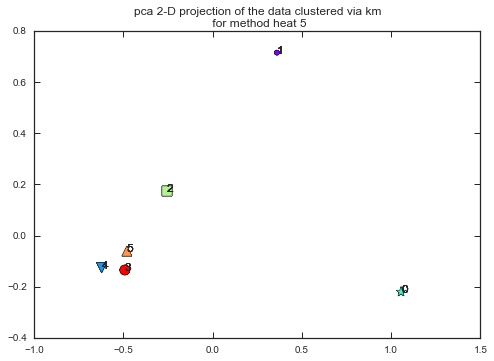

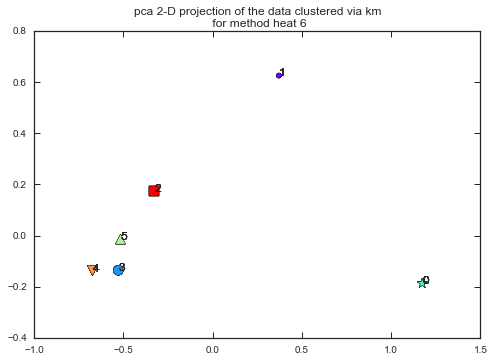

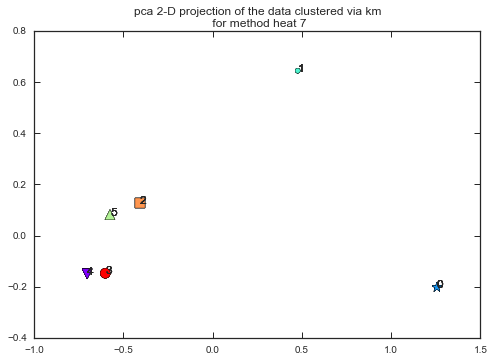

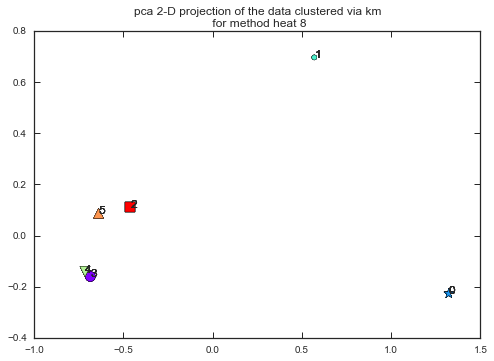

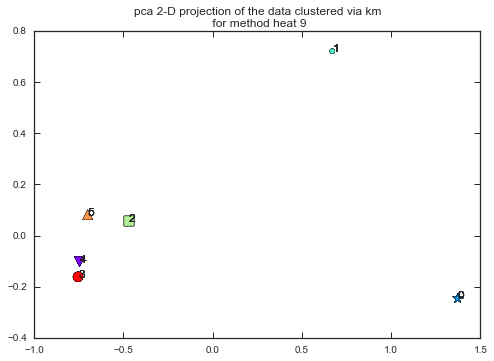

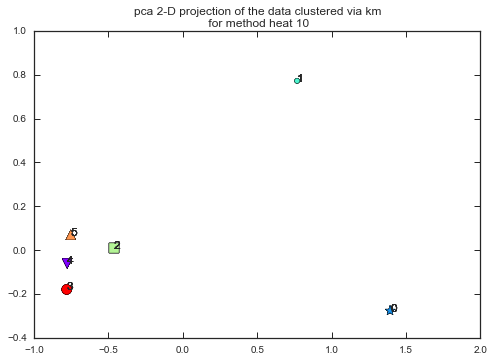

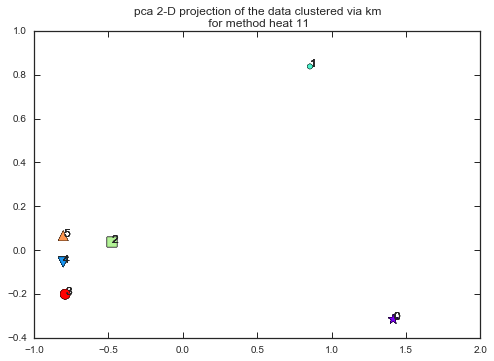

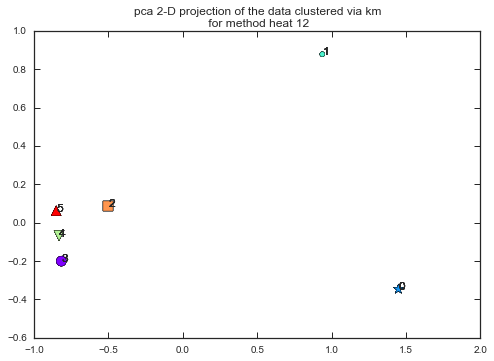

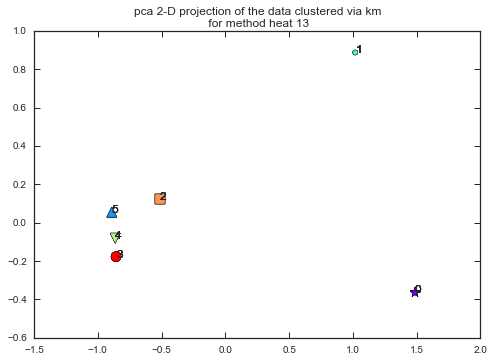

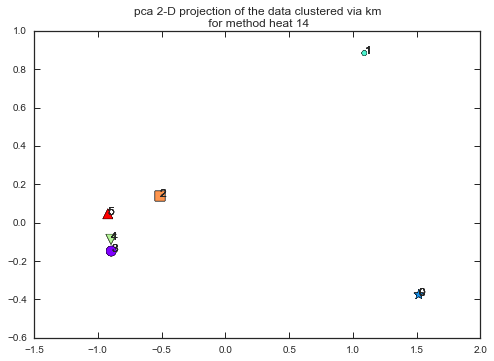

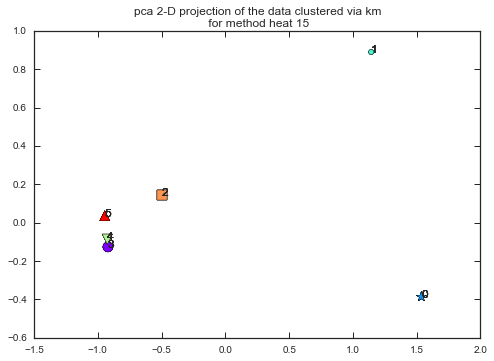

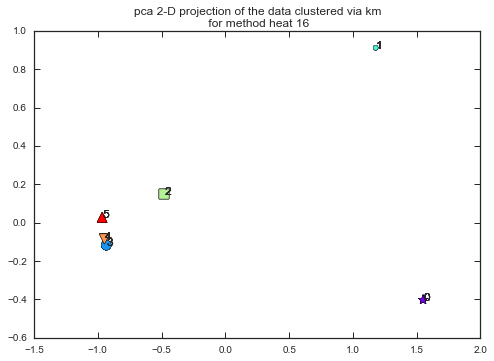

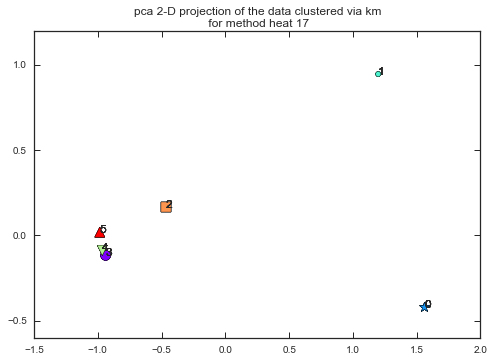

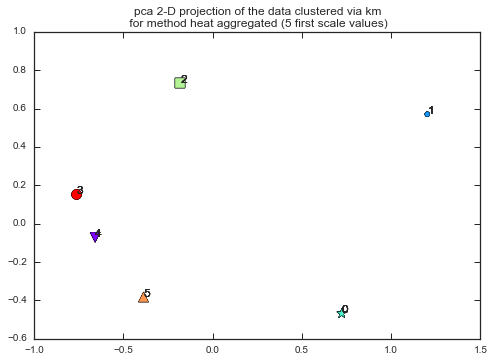

smax= 18  and smin= 1


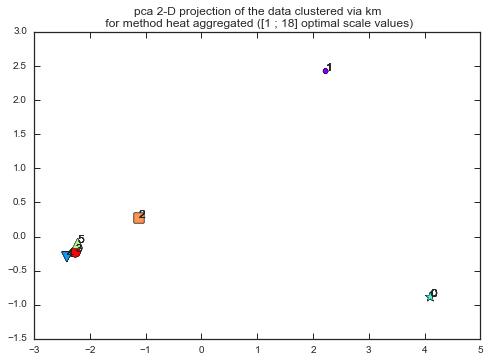

smax= 6  and smin= 1


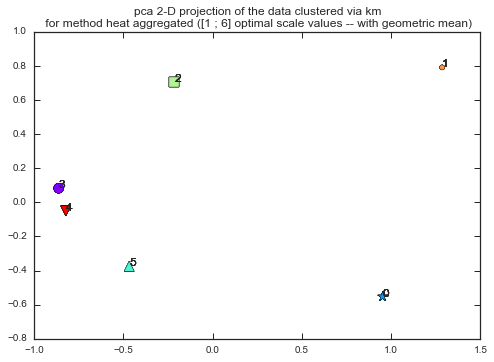

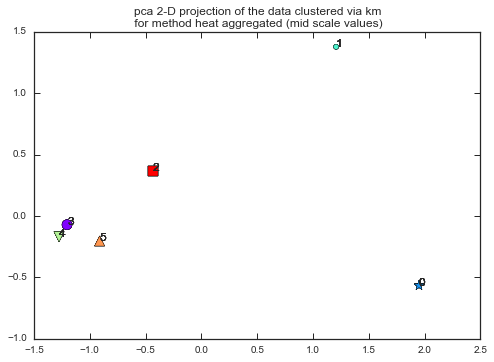

Creating Vertex Features matrix
V is a 40 by 8 matrix.
Node-role matrix is of dimensions 40 by 6
[[ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959  

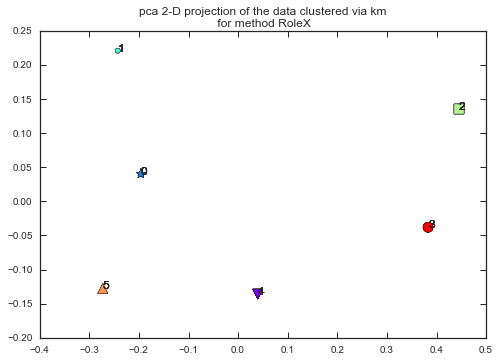

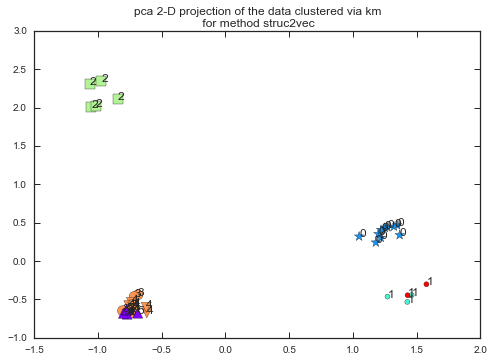

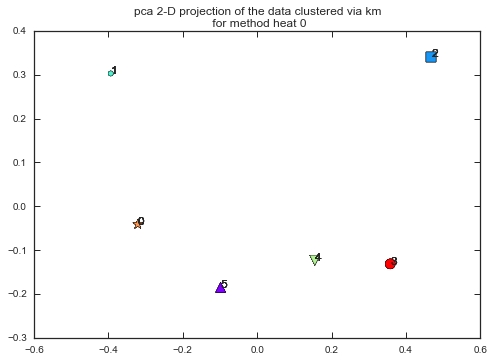

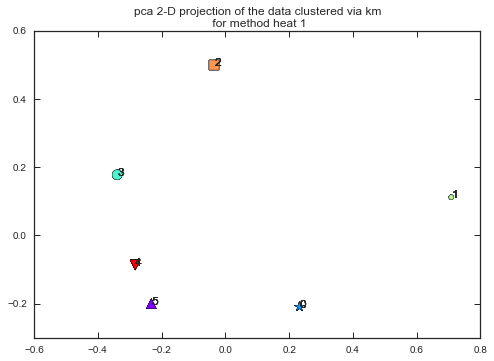

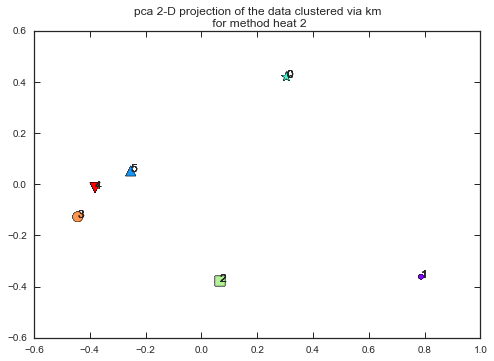

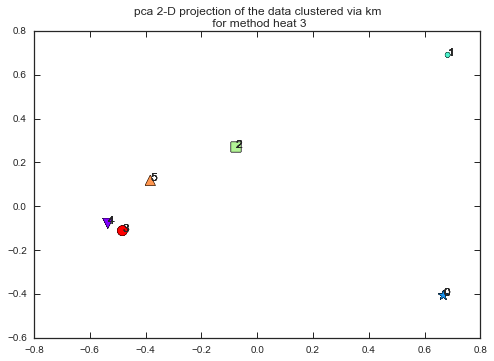

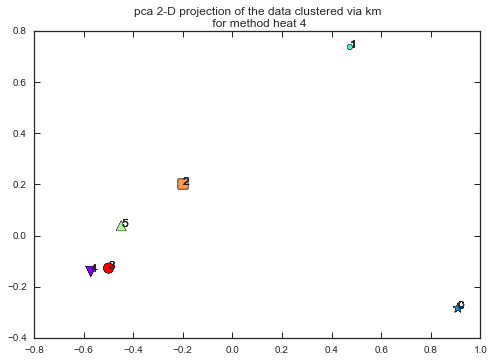

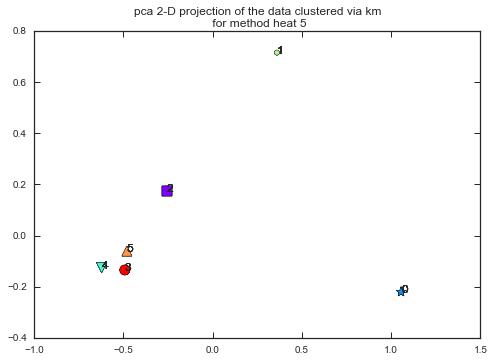

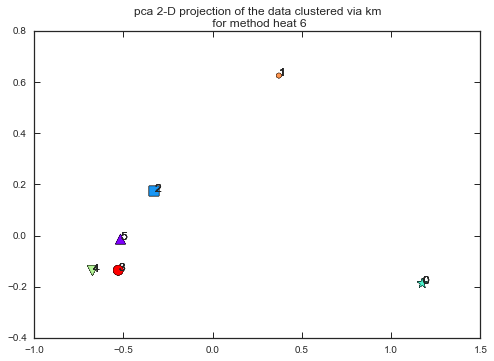

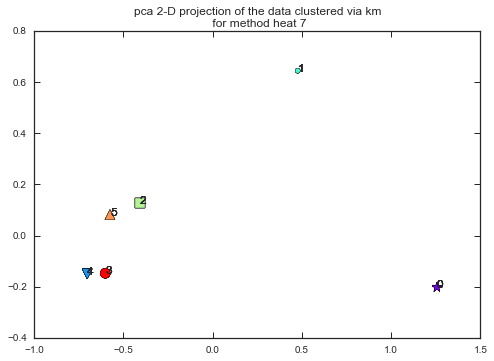

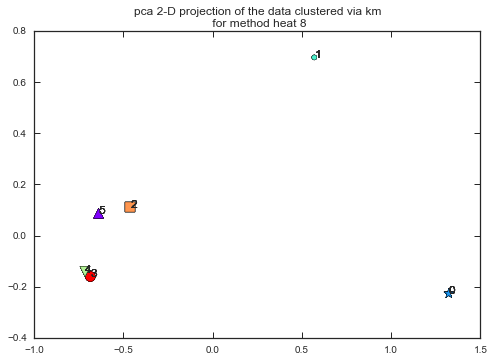

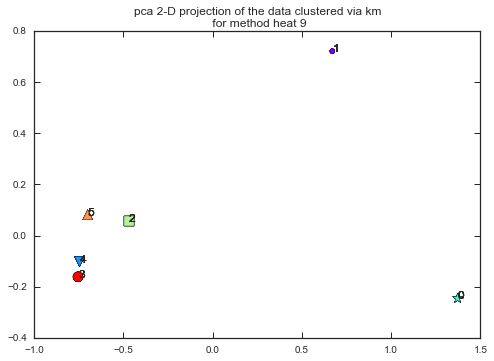

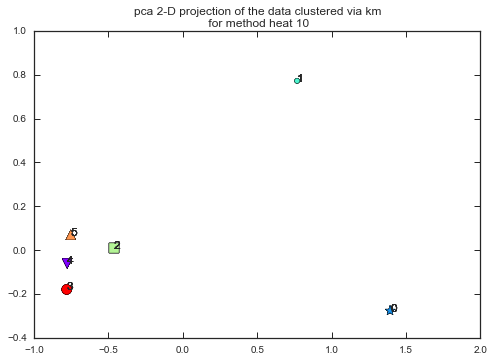

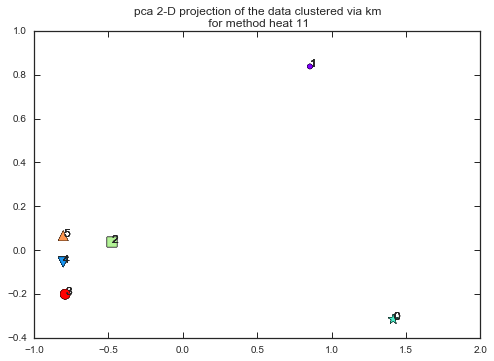

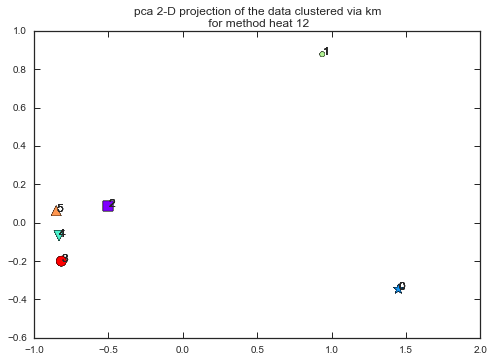

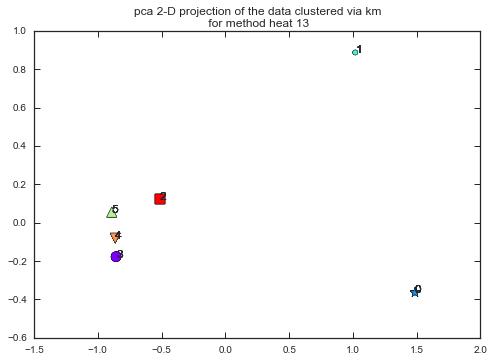

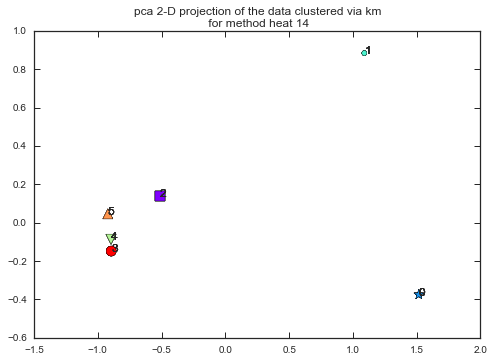

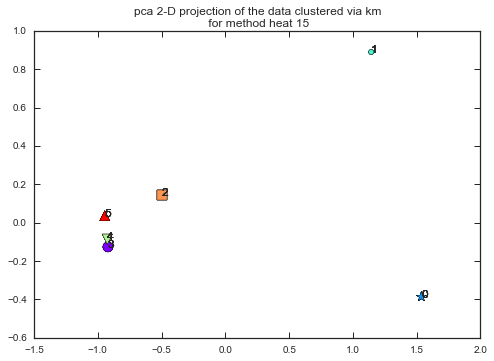

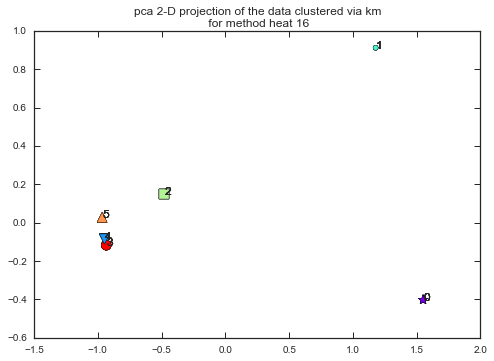

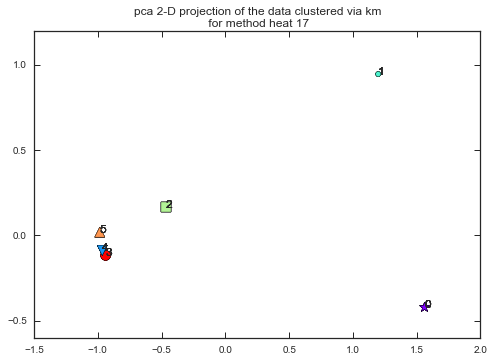

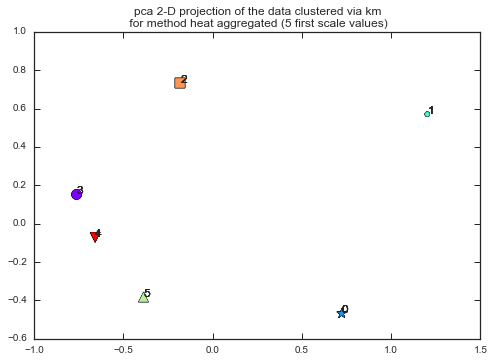

smax= 18  and smin= 1


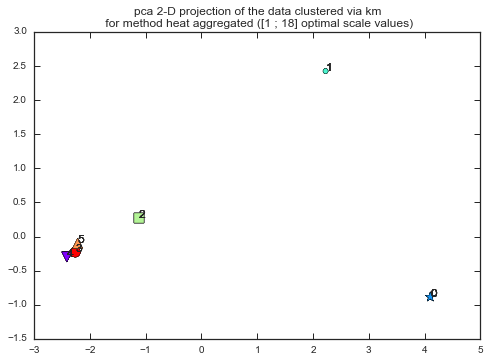

smax= 6  and smin= 1


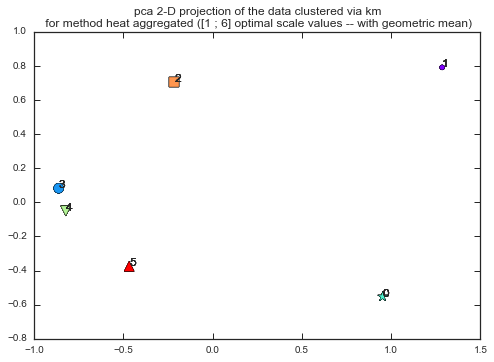

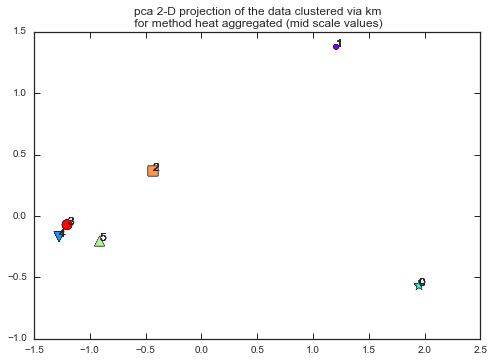

Creating Vertex Features matrix
V is a 40 by 8 matrix.
Node-role matrix is of dimensions 40 by 6
[[ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959  

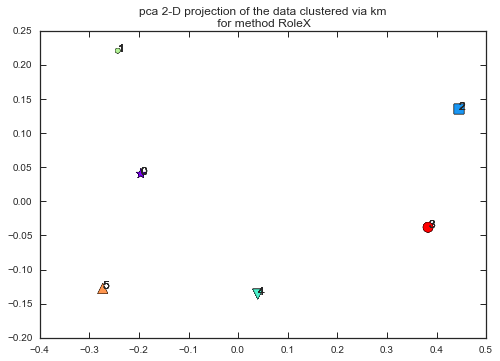

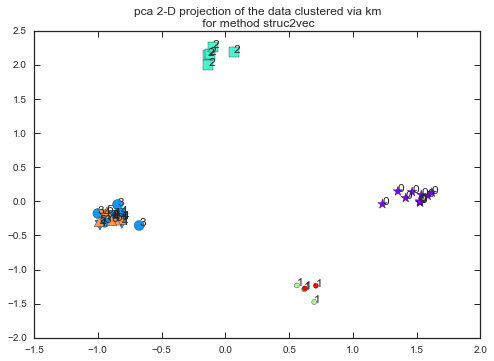

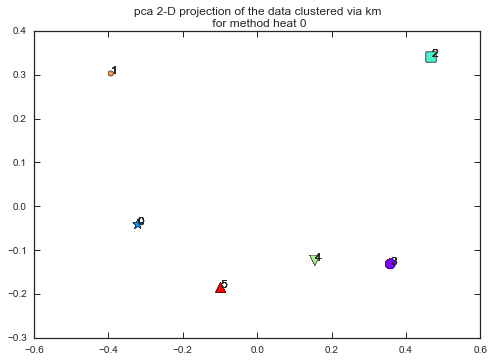

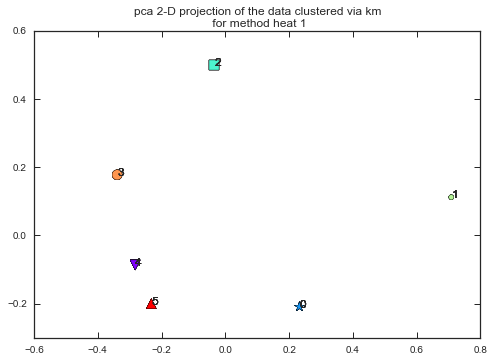

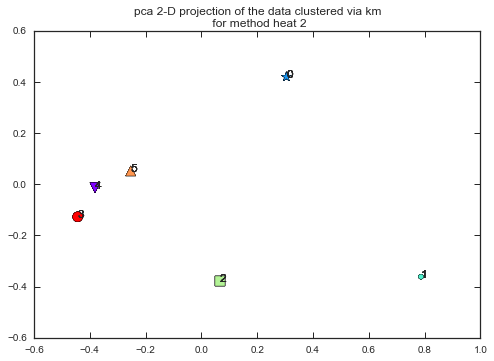

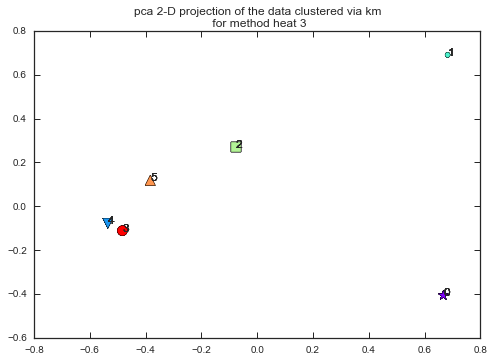

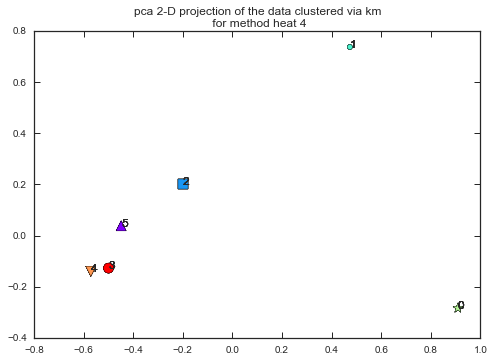

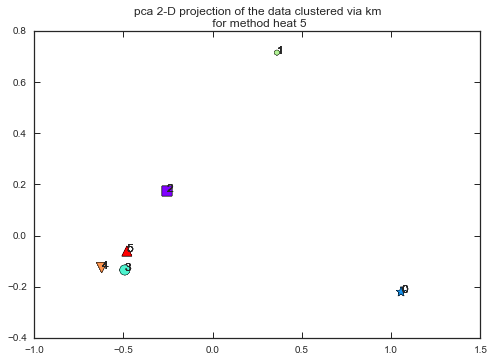

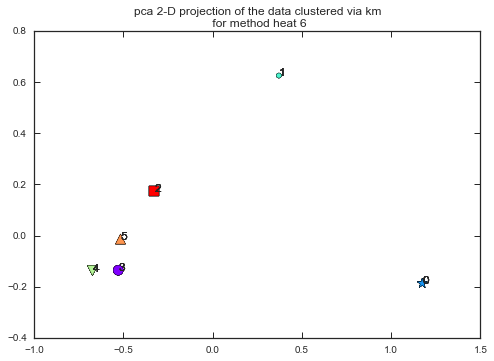

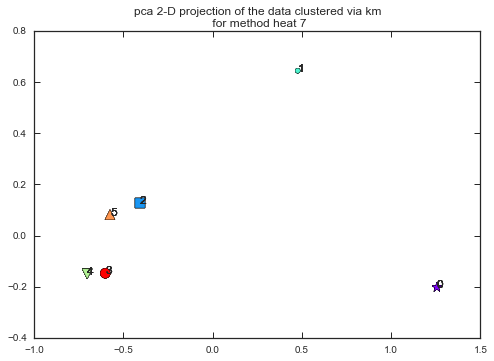

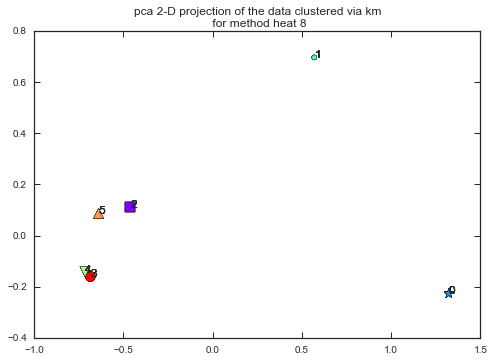

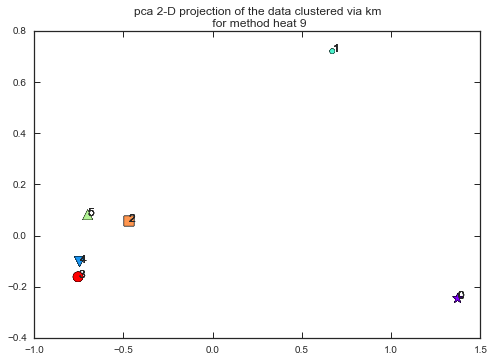

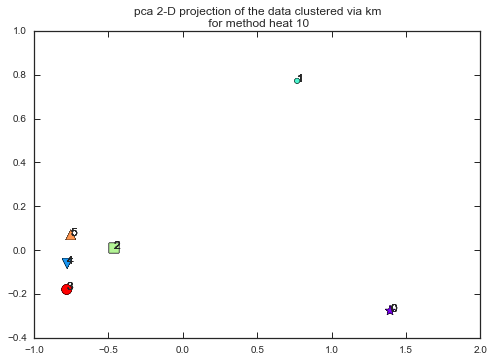

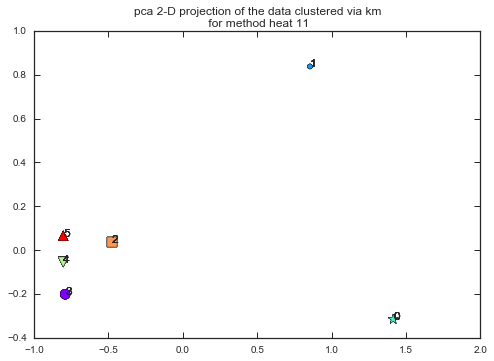

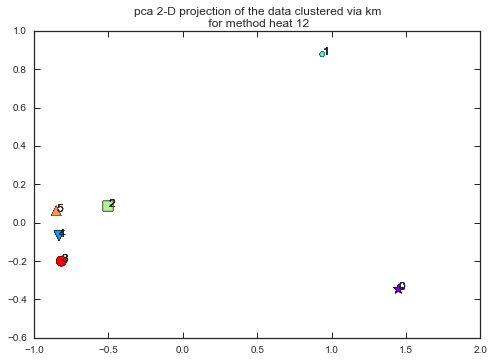

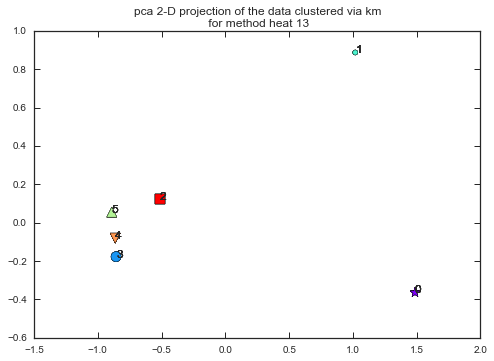

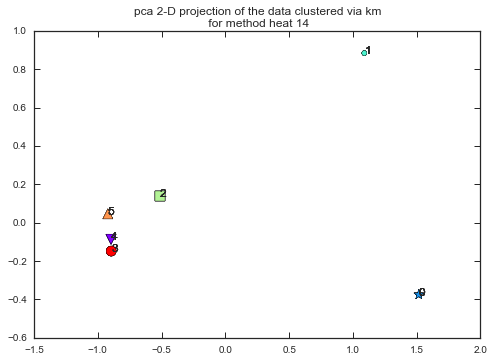

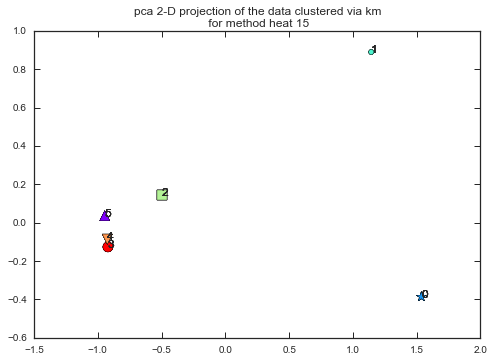

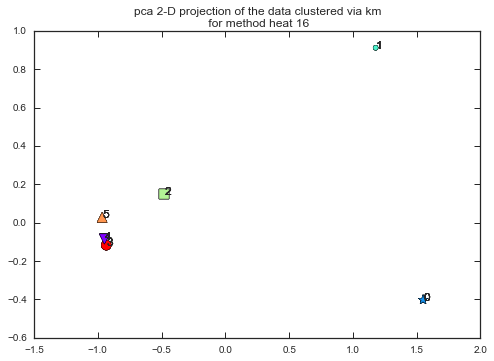

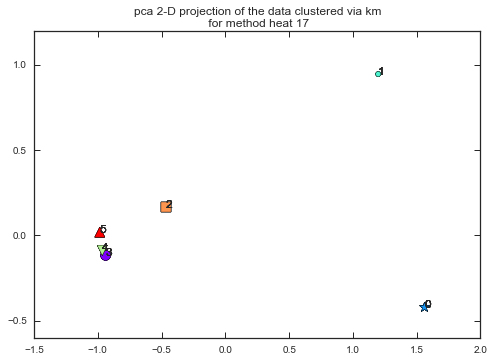

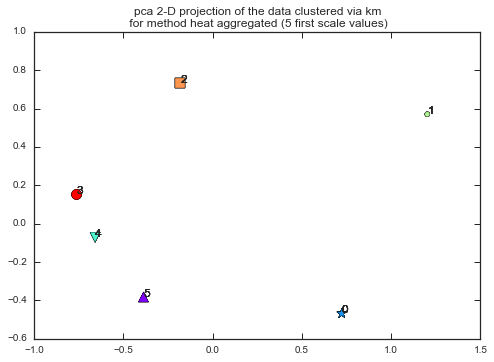

smax= 18  and smin= 1


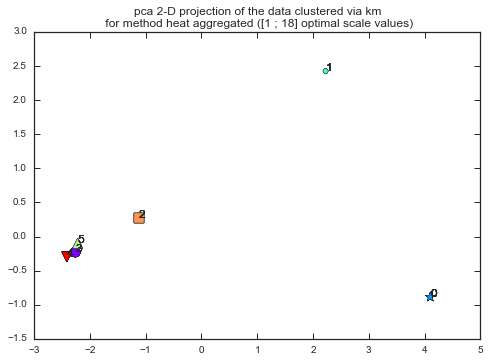

smax= 6  and smin= 1


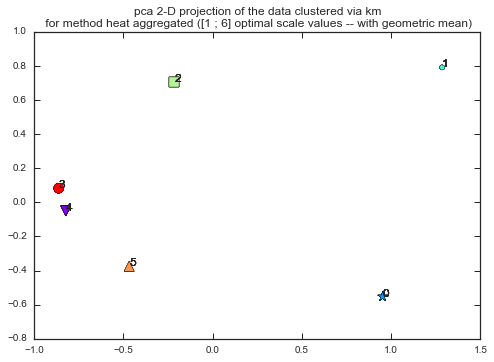

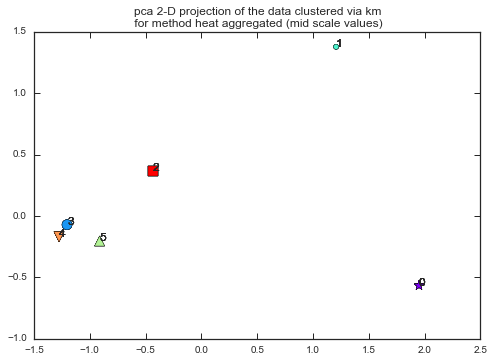

Creating Vertex Features matrix
V is a 40 by 8 matrix.
Node-role matrix is of dimensions 40 by 6
[[ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959  

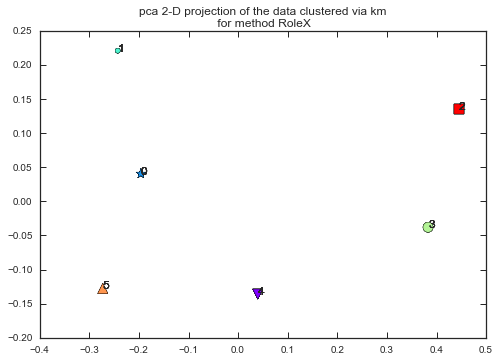

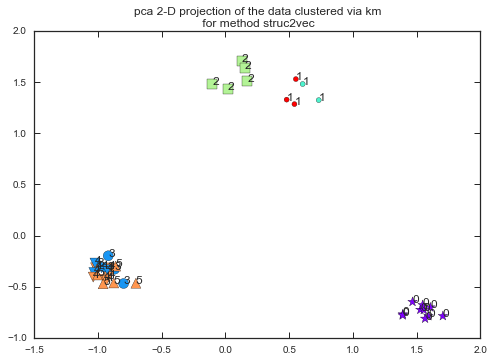

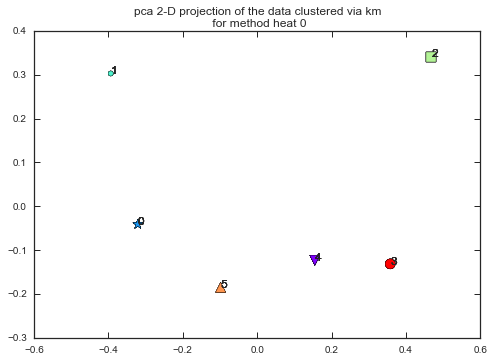

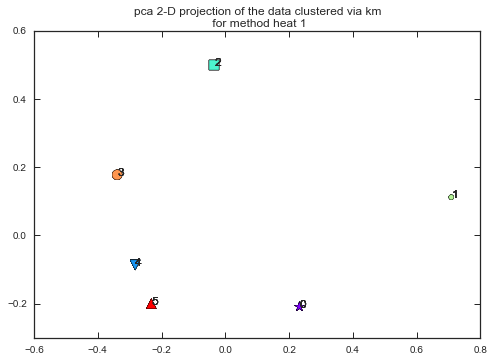

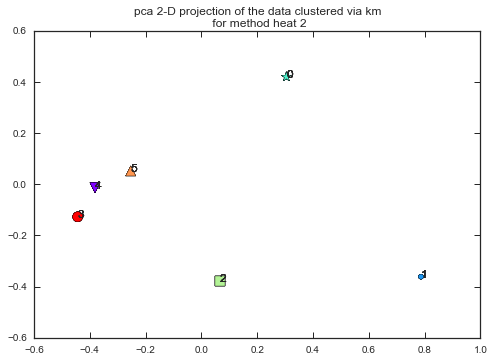

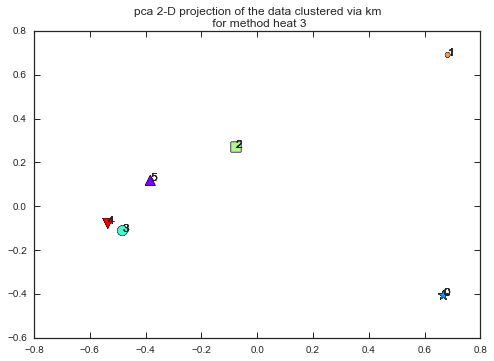

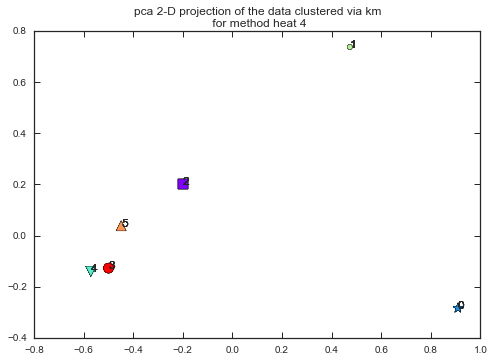

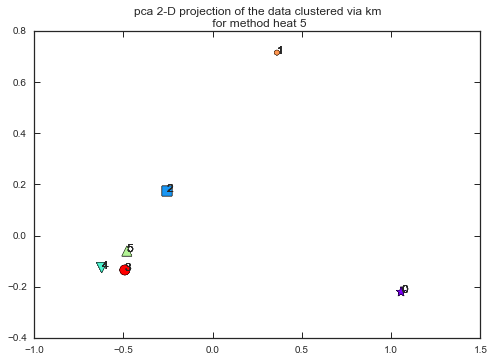

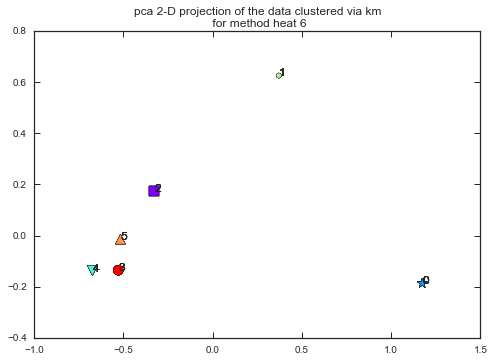

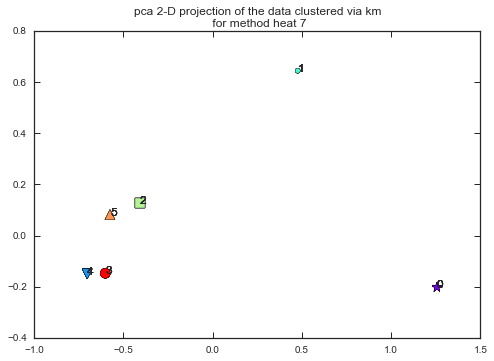

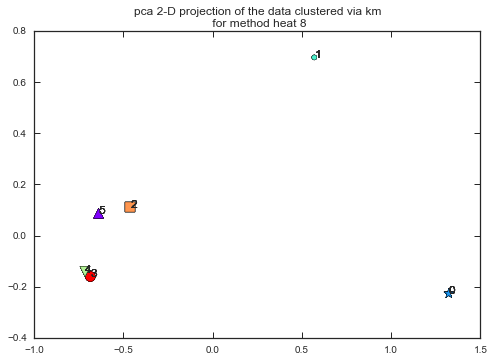

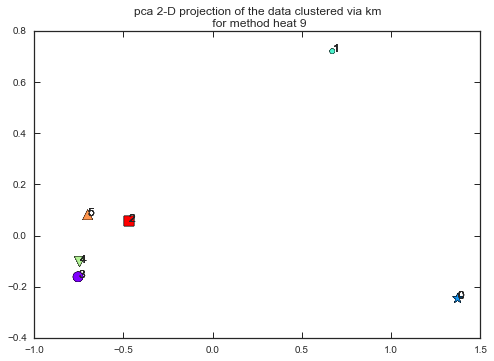

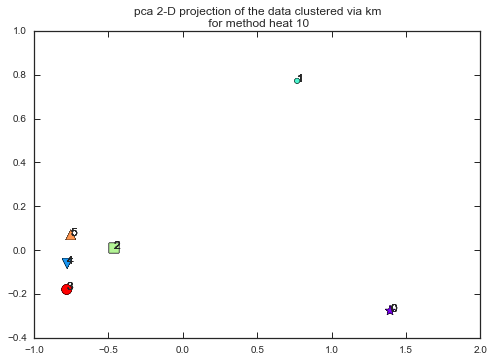

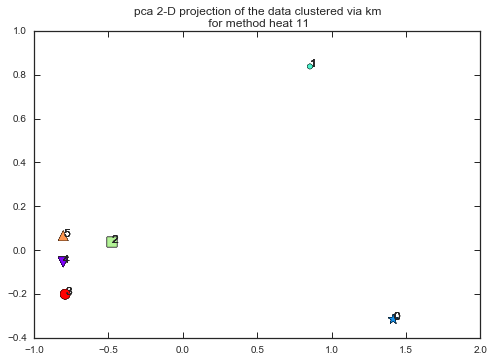

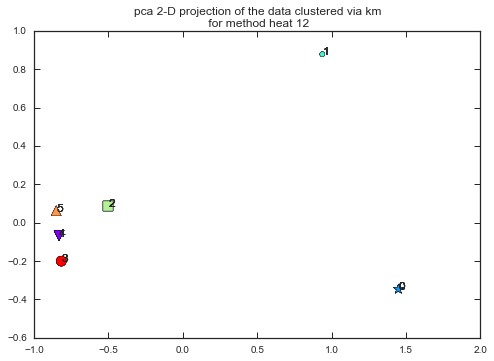

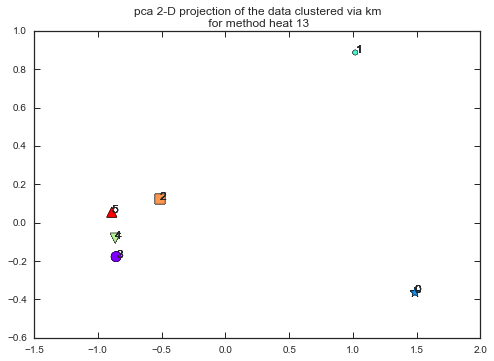

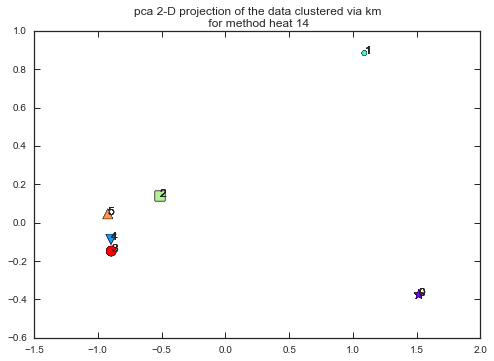

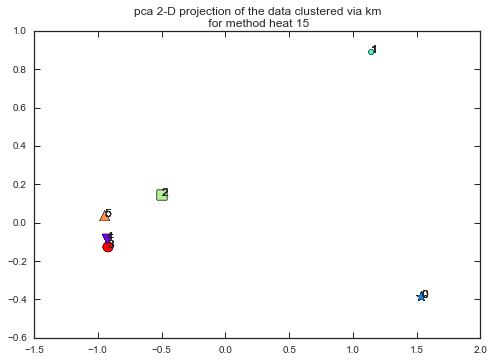

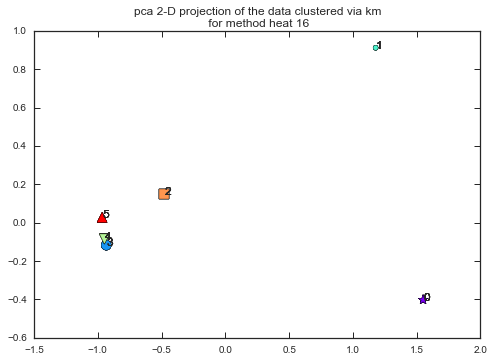

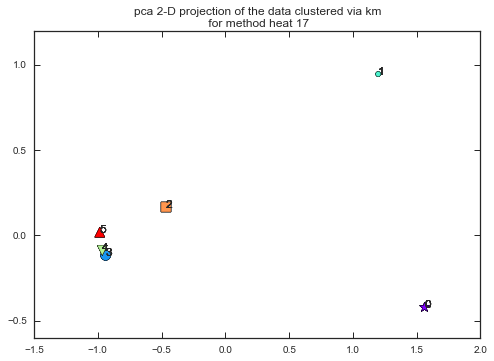

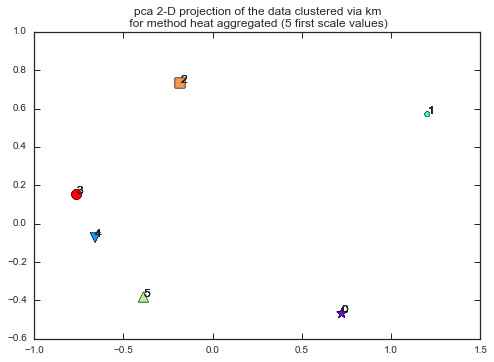

smax= 18  and smin= 1


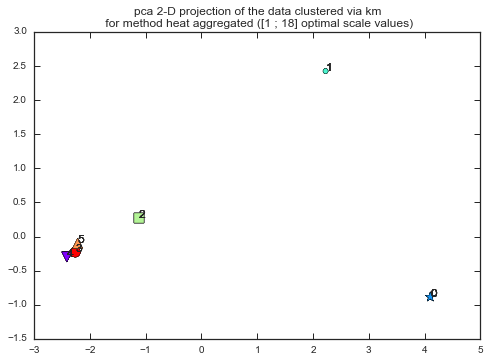

smax= 6  and smin= 1


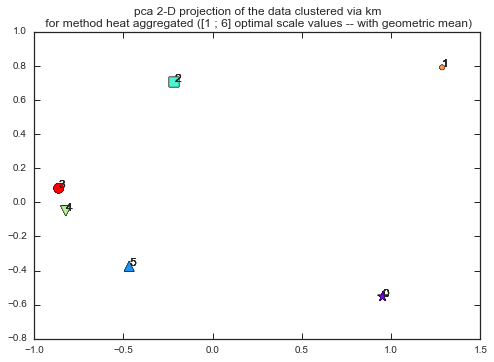

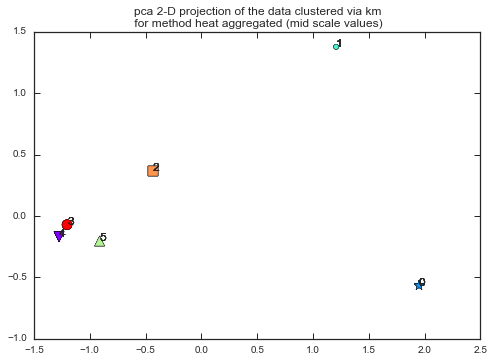

Creating Vertex Features matrix
V is a 40 by 8 matrix.
Node-role matrix is of dimensions 40 by 6
[[ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959  

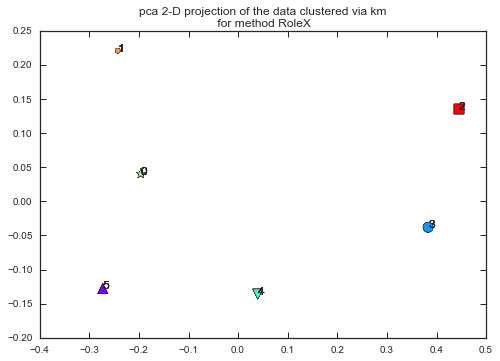

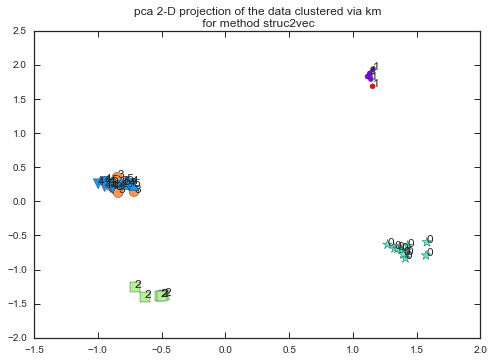

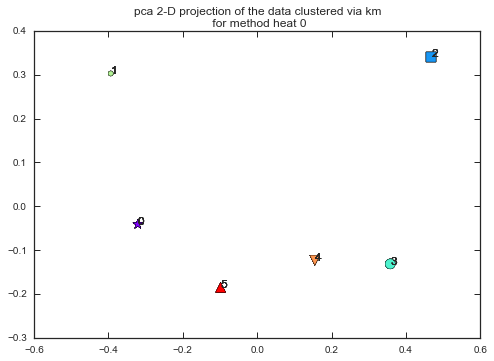

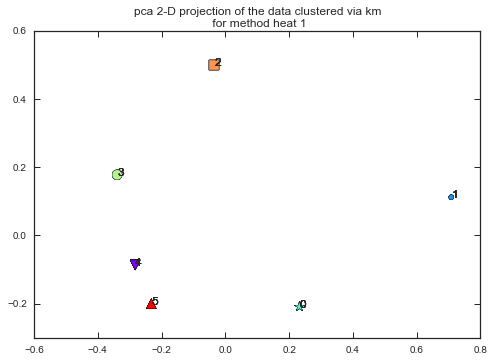

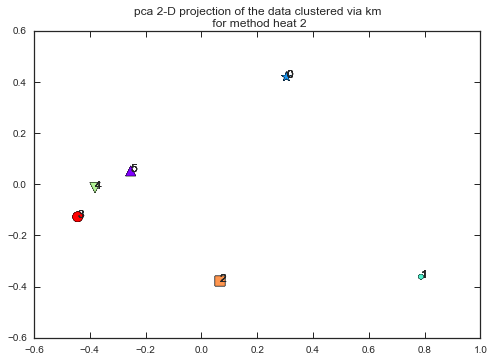

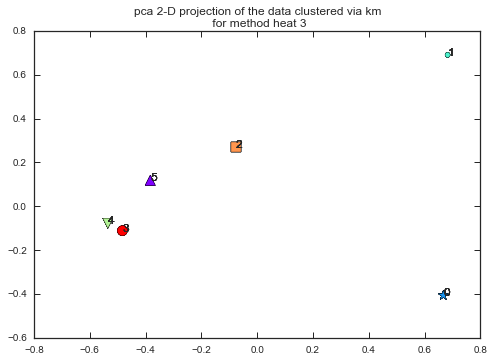

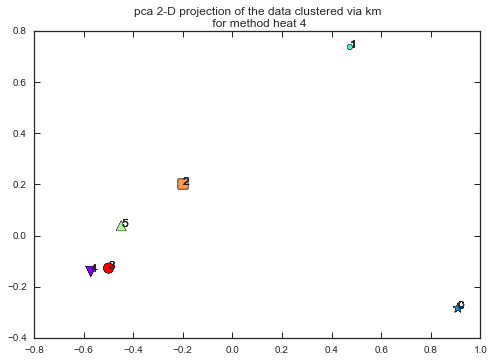

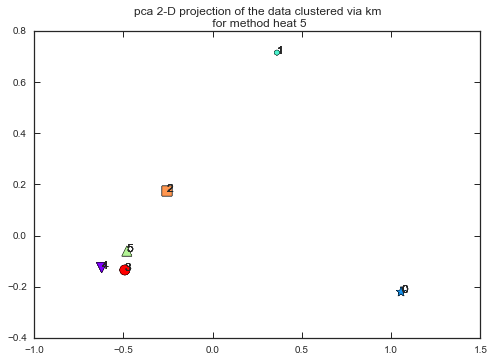

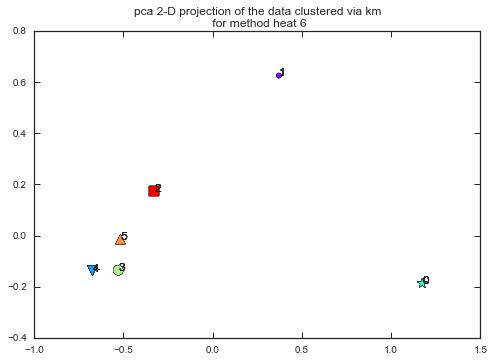

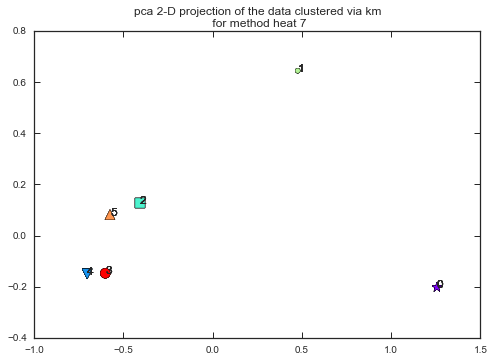

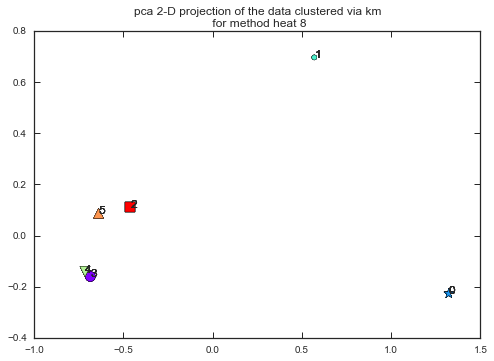

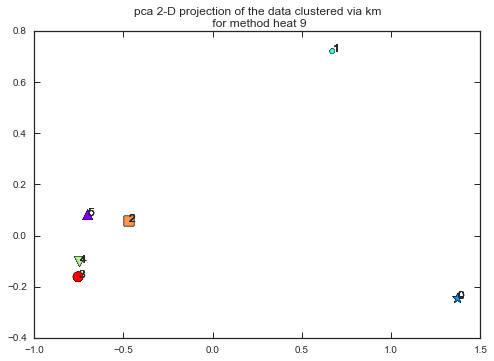

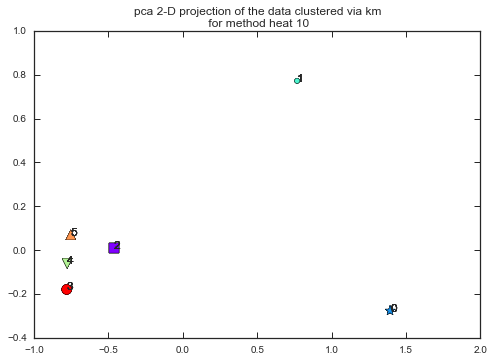

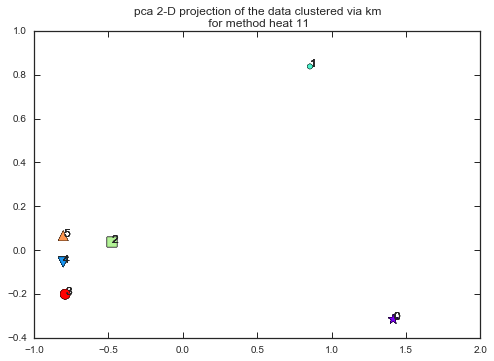

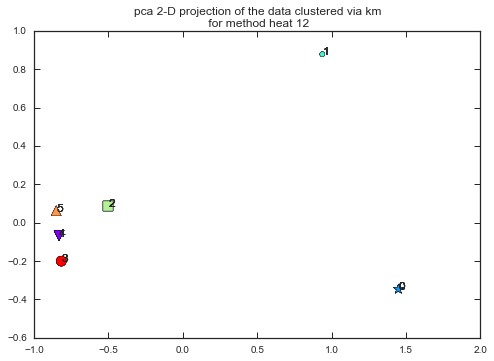

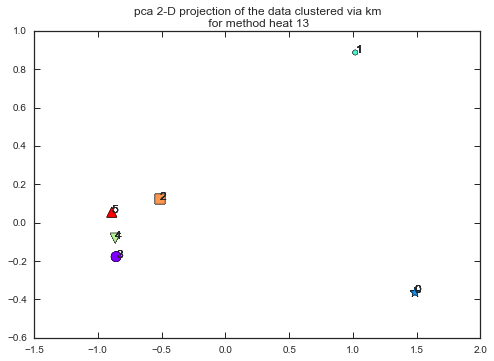

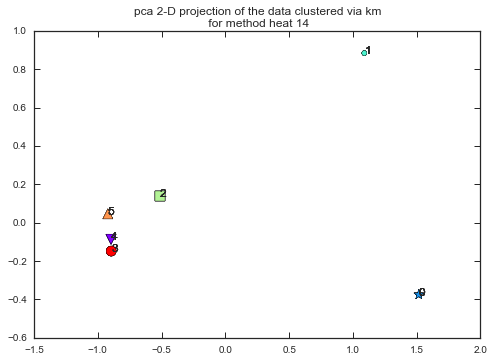

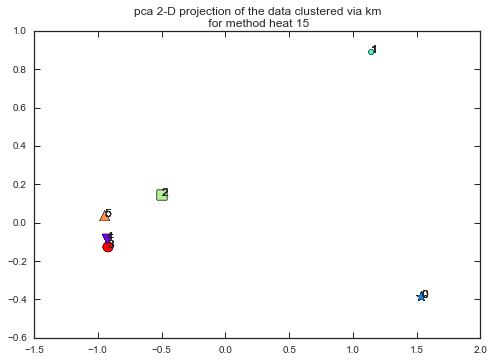

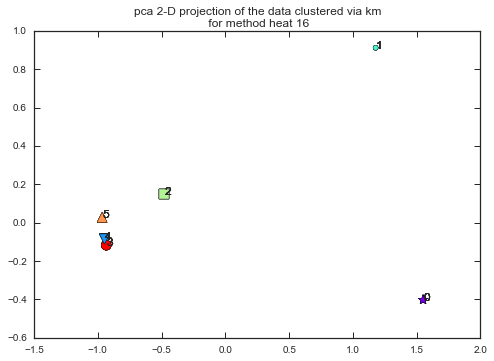

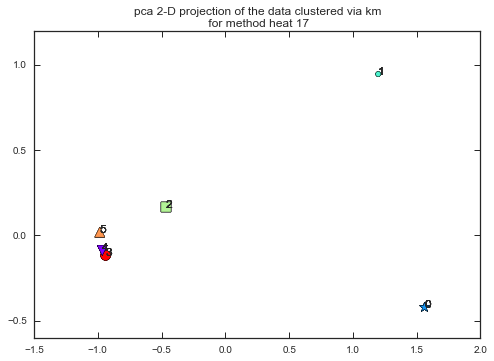

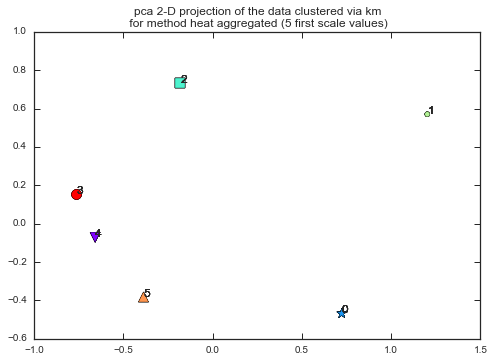

smax= 18  and smin= 1


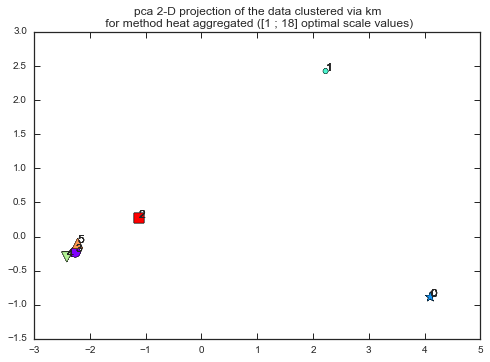

smax= 6  and smin= 1


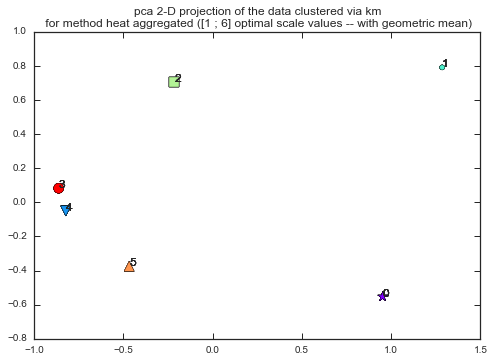

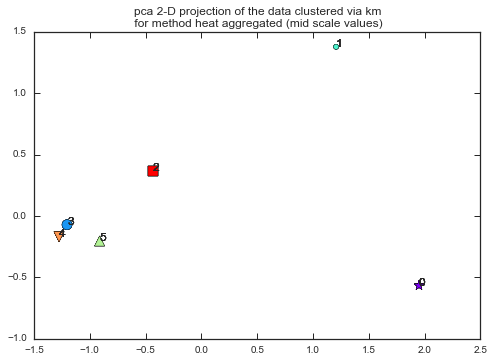

Creating Vertex Features matrix
V is a 40 by 8 matrix.
Node-role matrix is of dimensions 40 by 6
[[ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959  

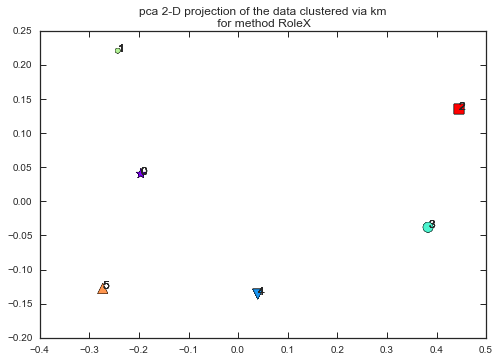

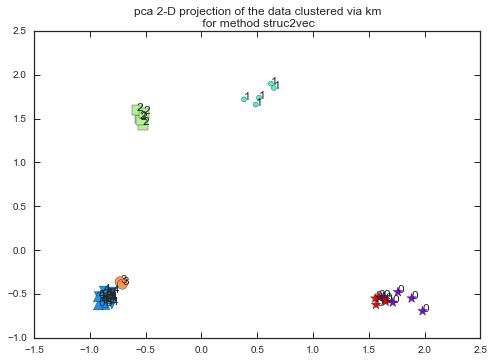

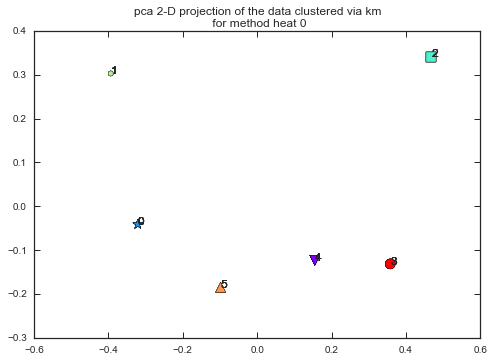

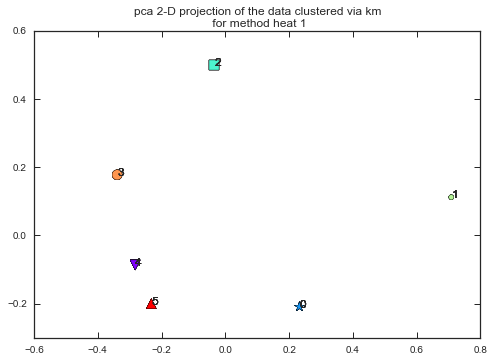

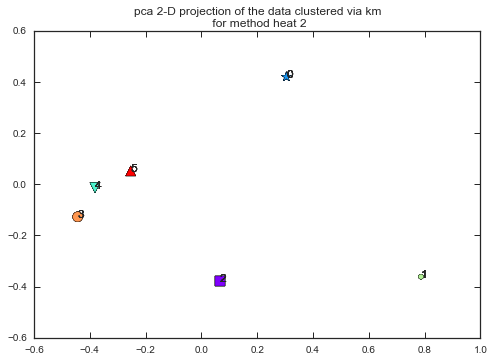

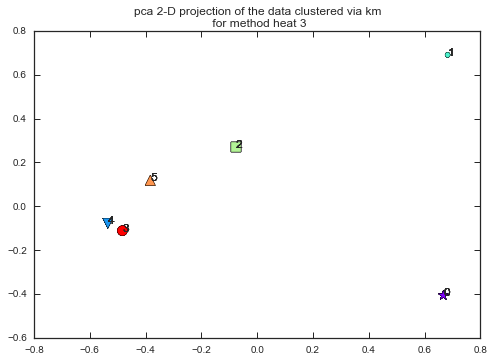

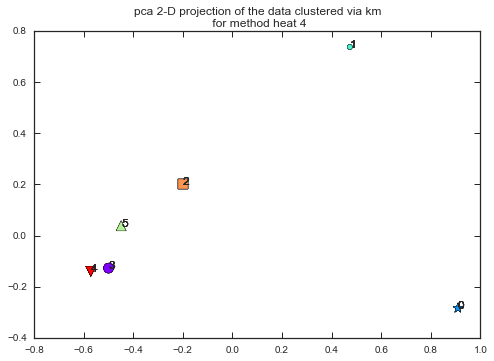

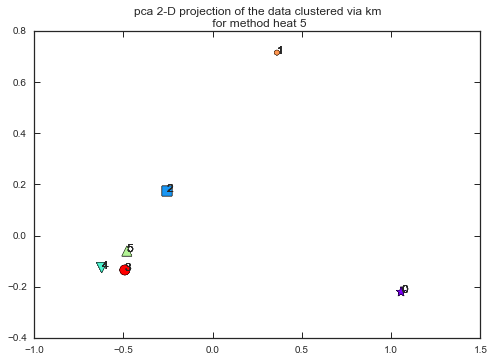

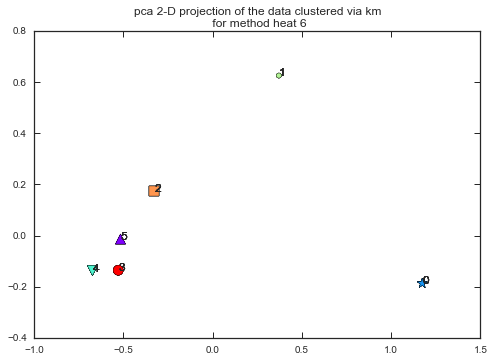

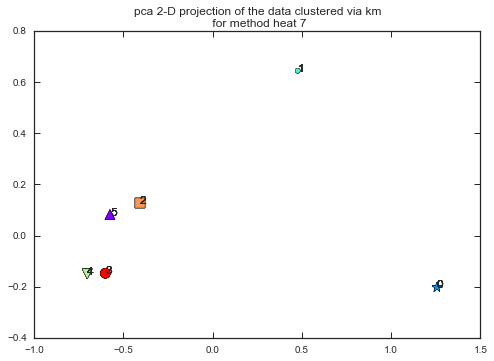

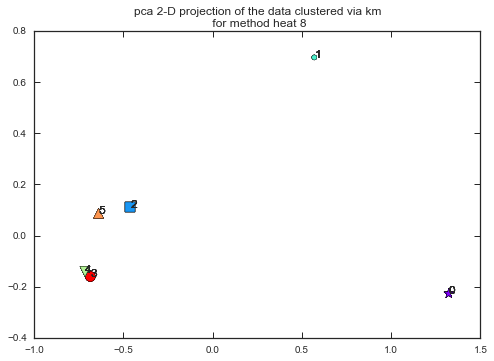

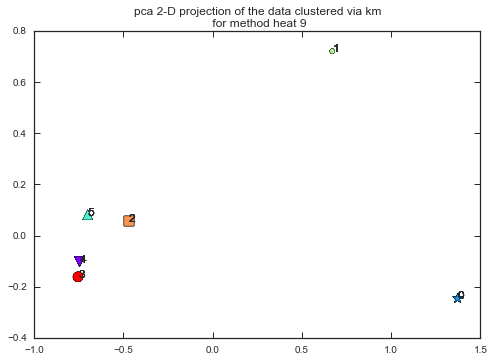

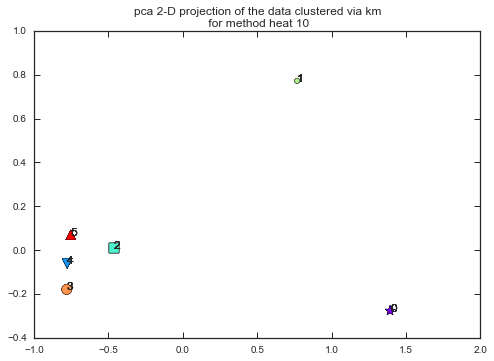

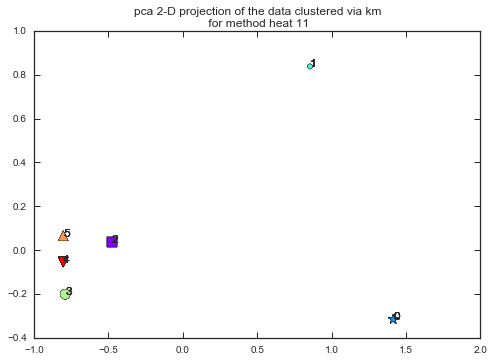

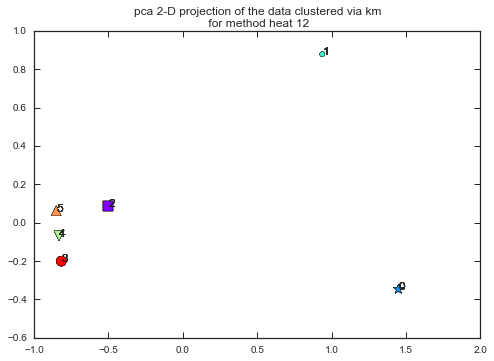

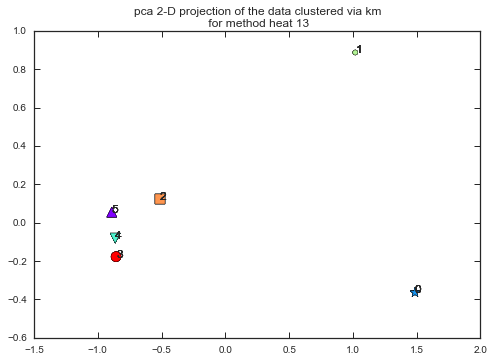

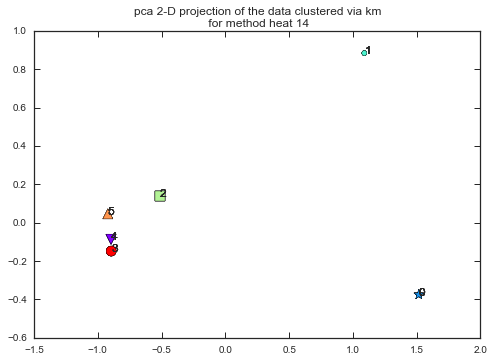

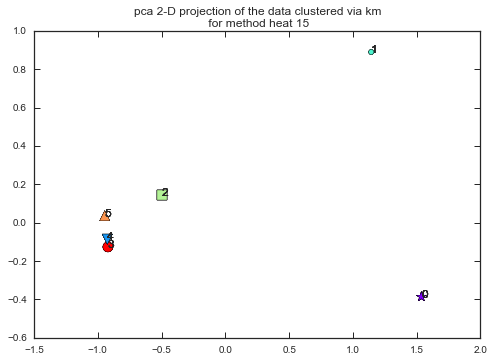

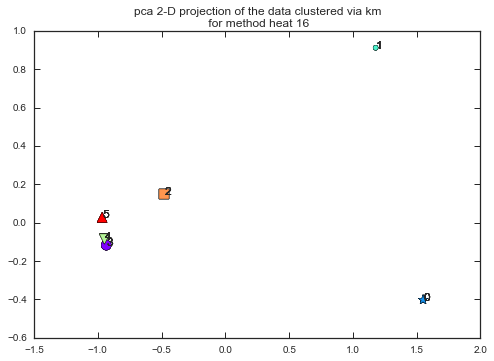

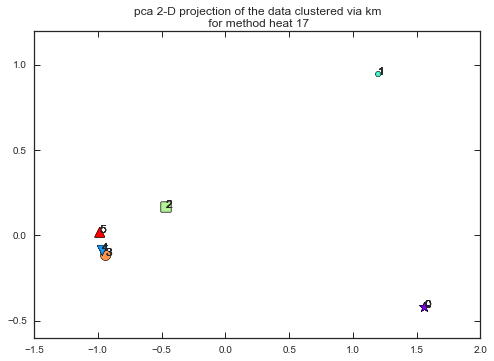

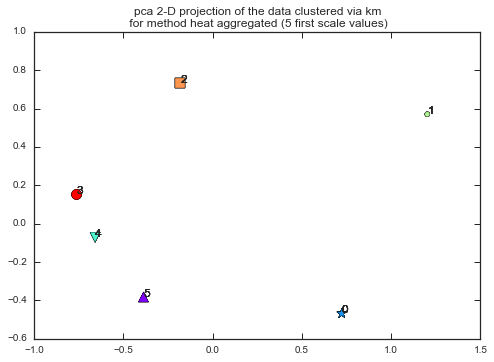

smax= 18  and smin= 1


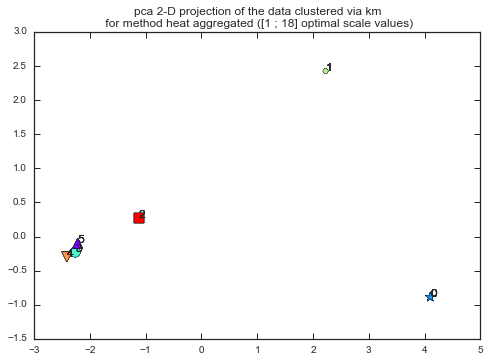

smax= 6  and smin= 1


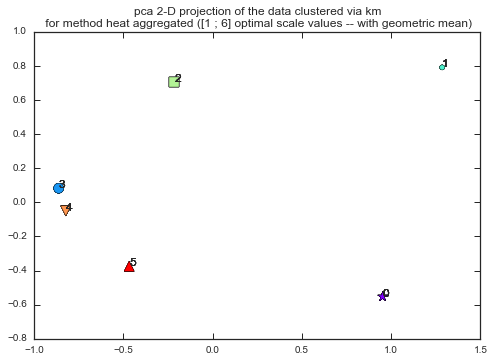

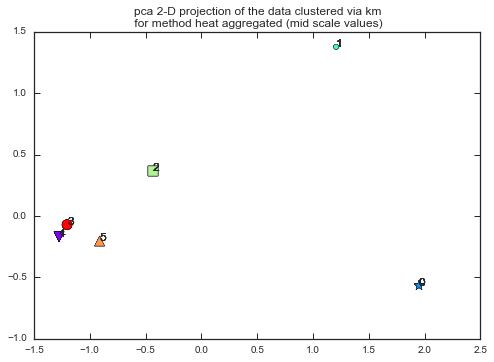

Creating Vertex Features matrix
V is a 40 by 8 matrix.
Node-role matrix is of dimensions 40 by 6
[[ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959  

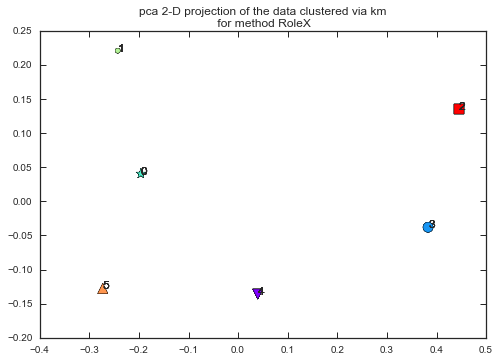

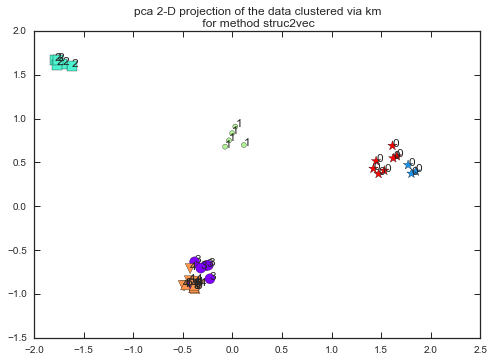

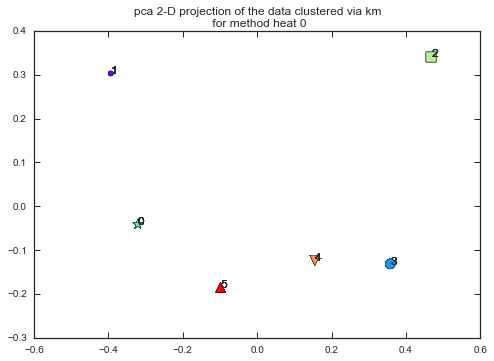

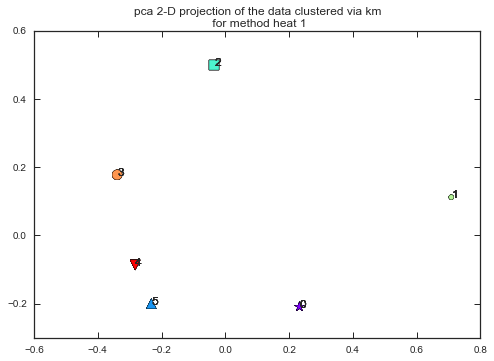

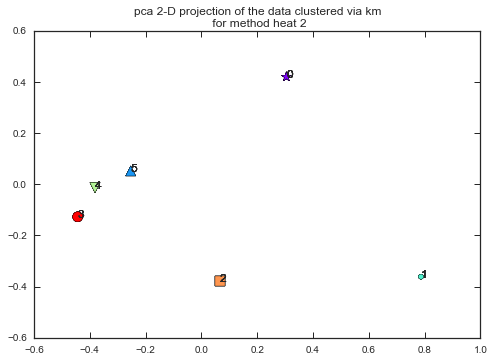

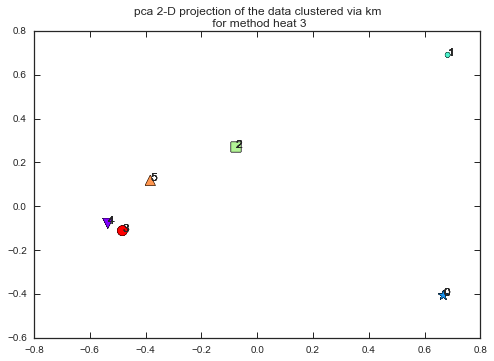

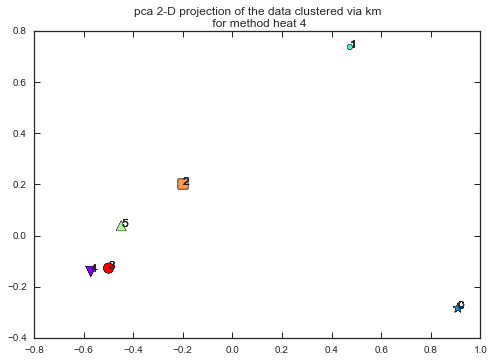

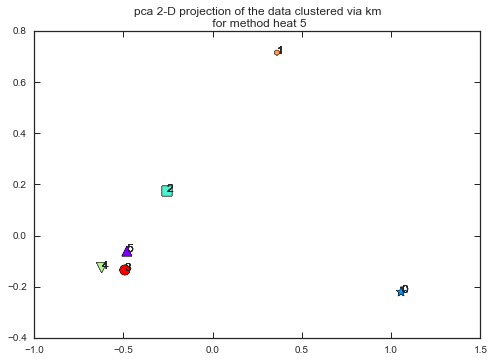

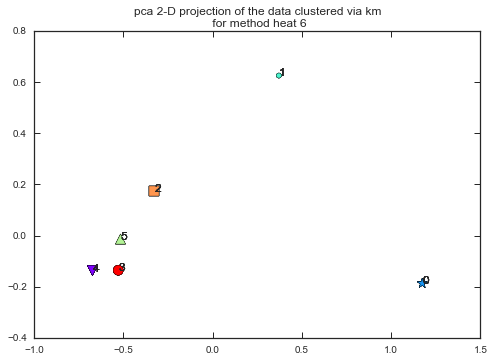

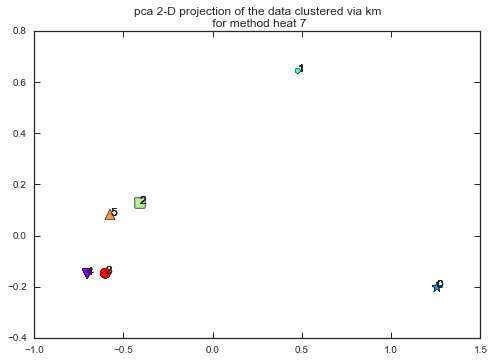

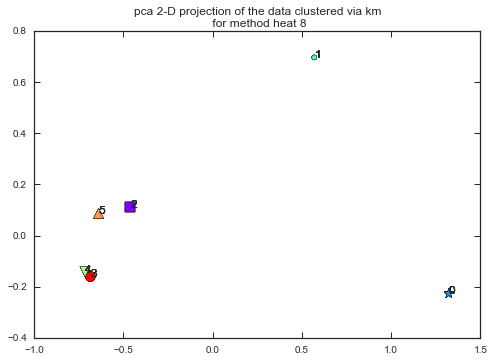

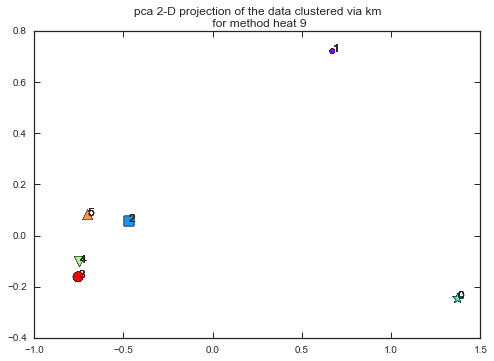

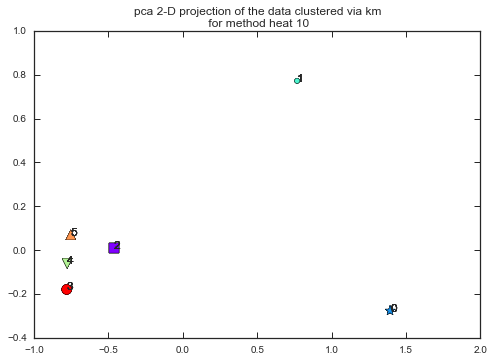

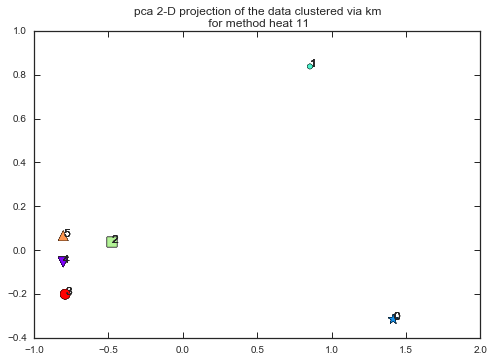

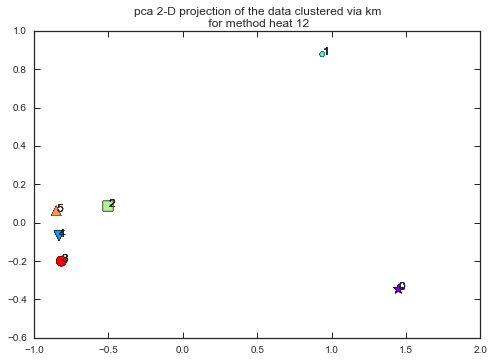

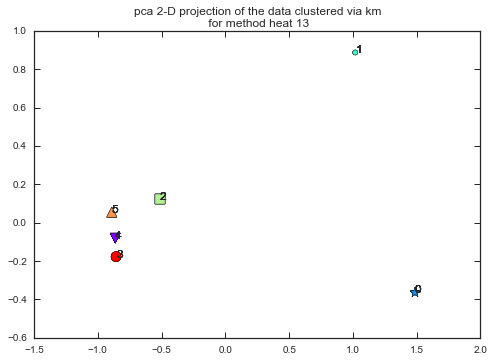

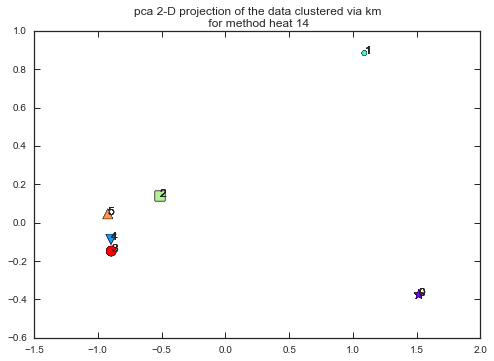

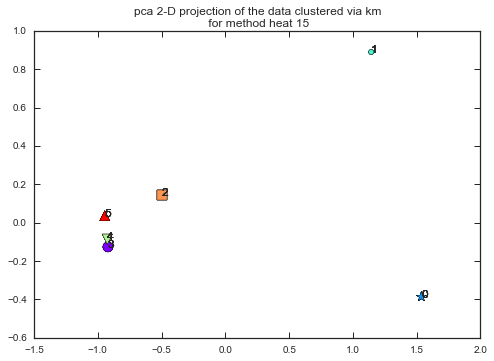

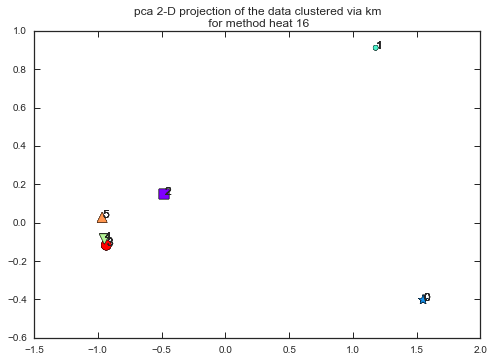

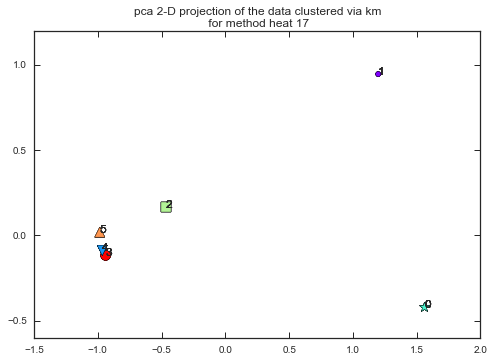

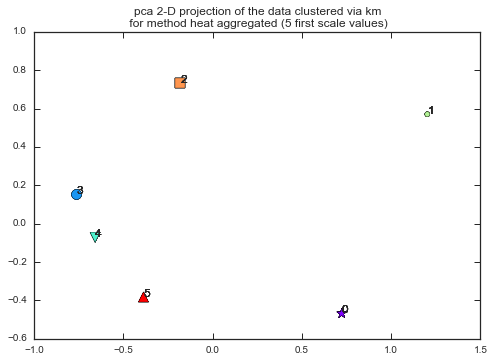

smax= 18  and smin= 1


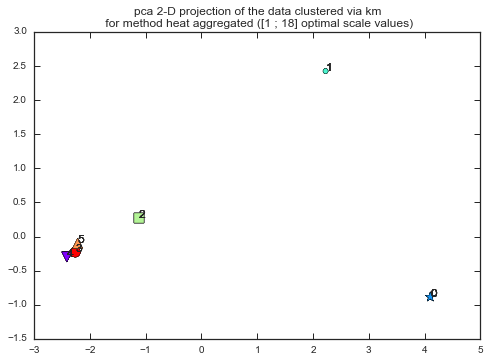

smax= 6  and smin= 1


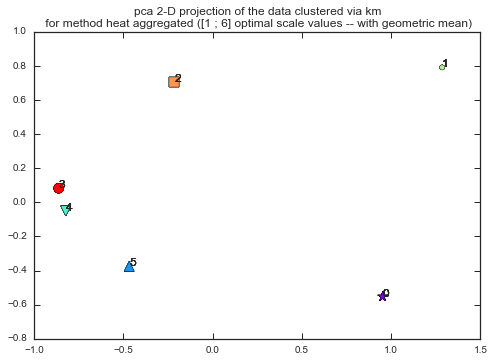

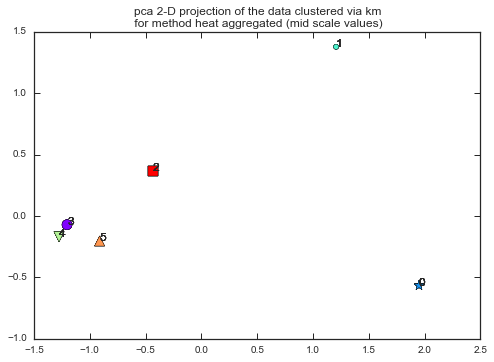

Creating Vertex Features matrix
V is a 40 by 8 matrix.
Node-role matrix is of dimensions 40 by 6
[[ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959  

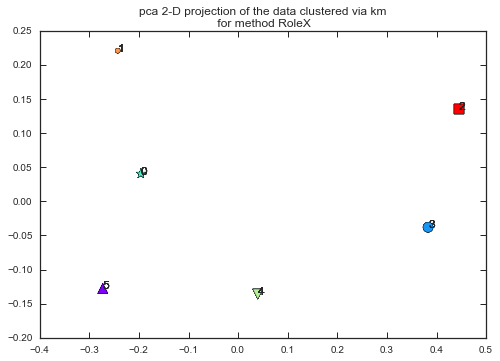

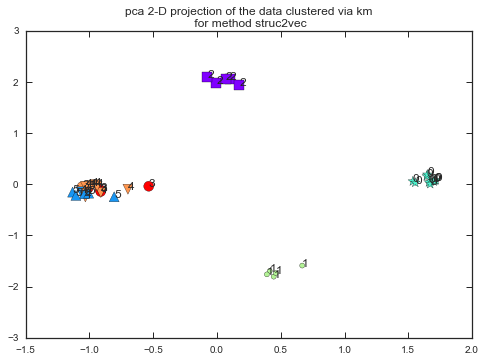

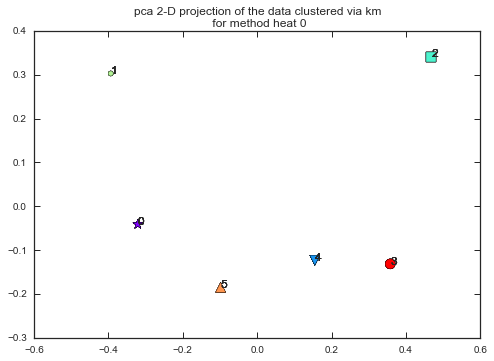

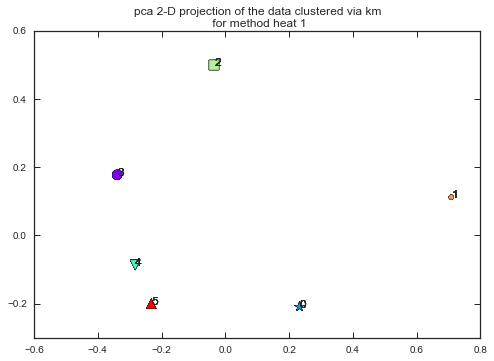

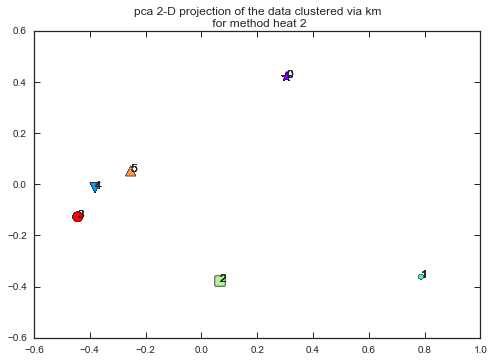

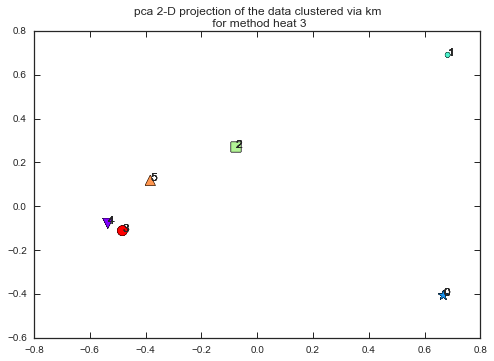

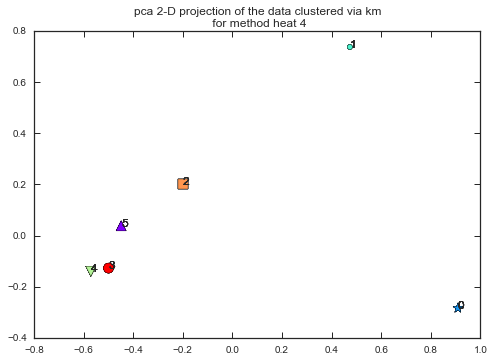

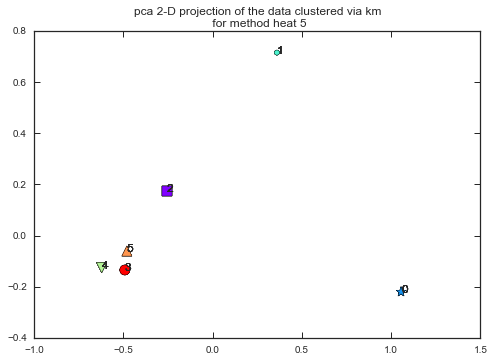

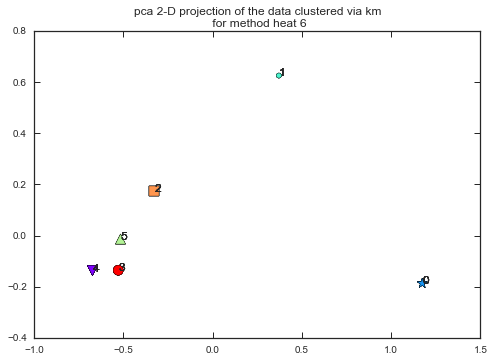

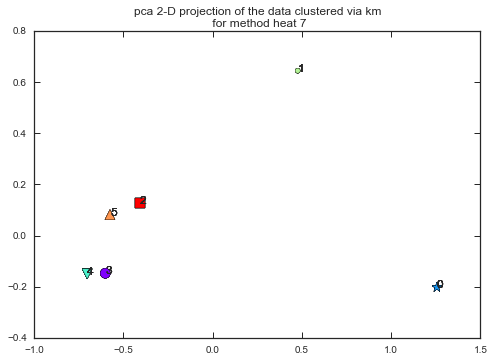

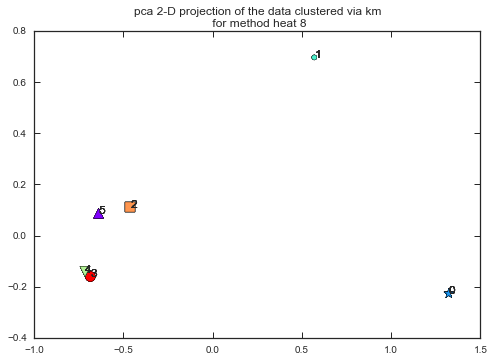

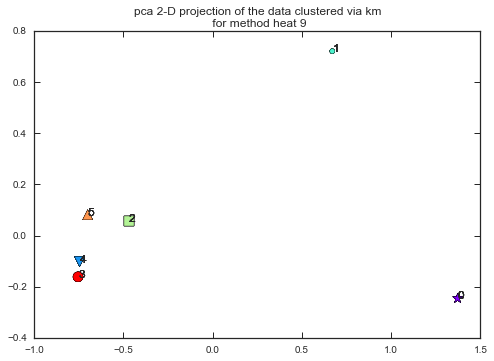

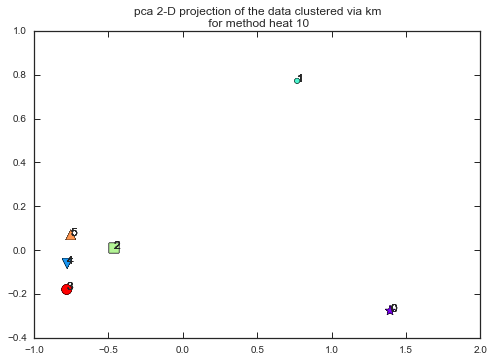

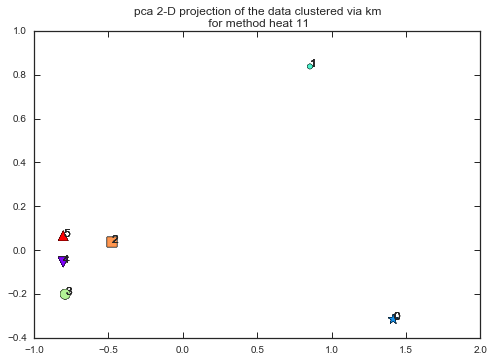

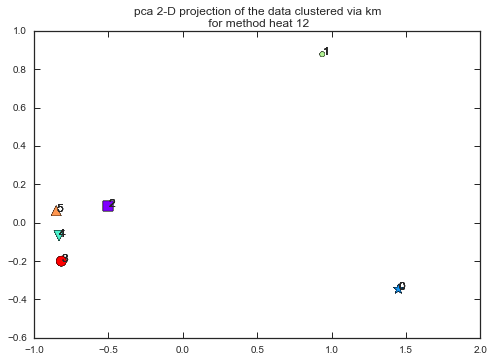

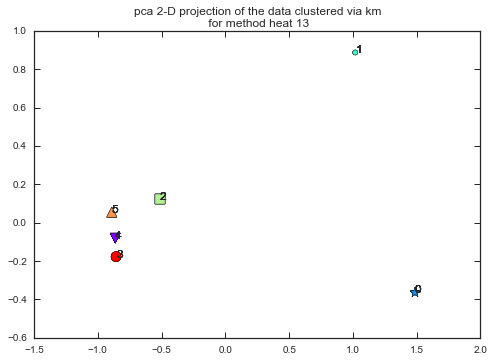

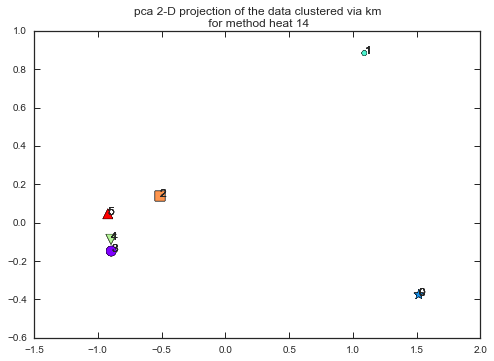

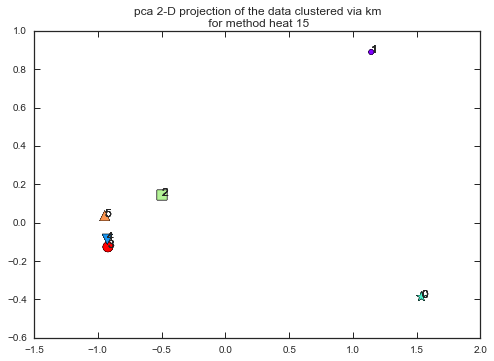

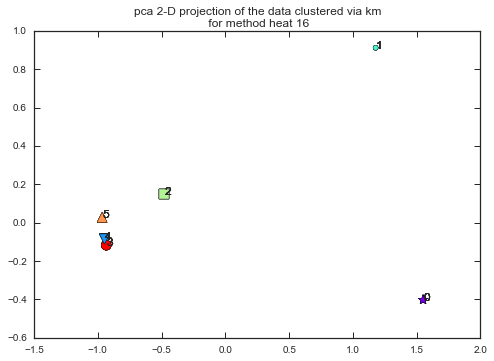

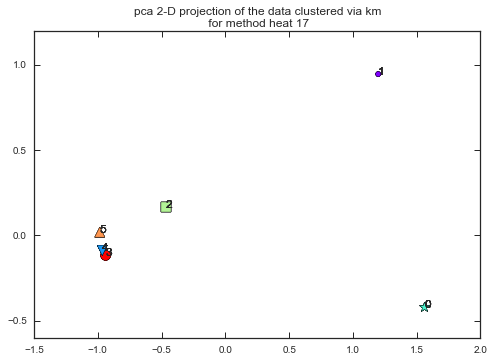

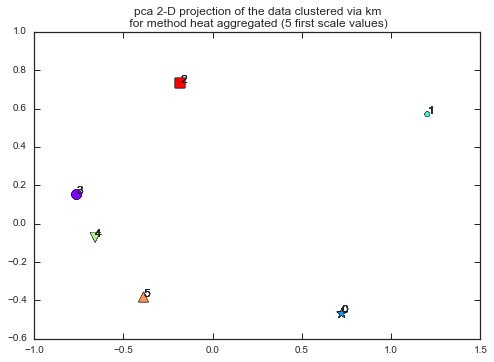

smax= 18  and smin= 1


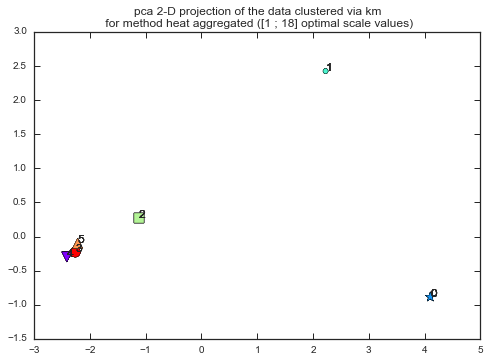

smax= 6  and smin= 1


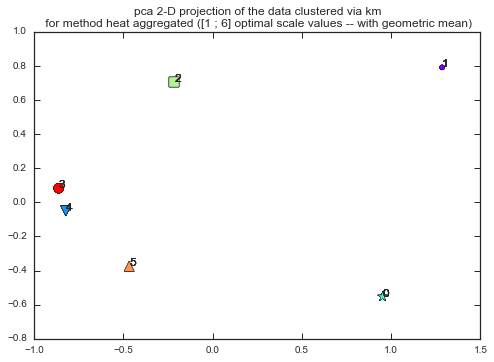

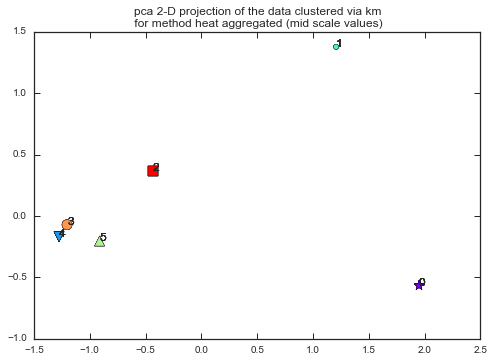

Creating Vertex Features matrix
V is a 40 by 8 matrix.
Node-role matrix is of dimensions 40 by 6
[[ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959  

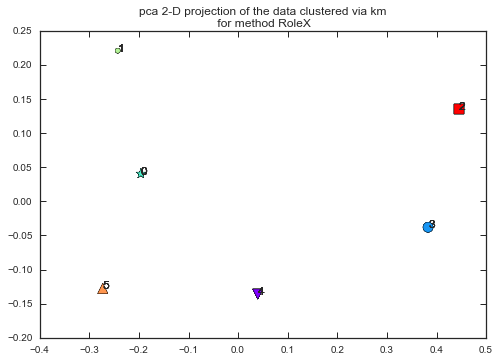

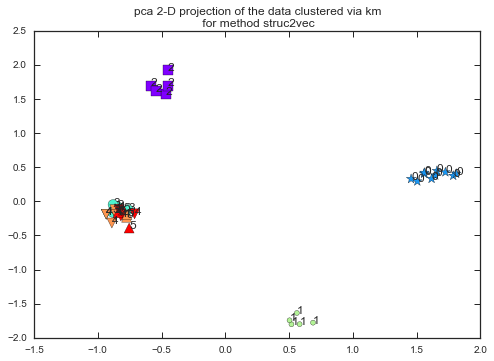

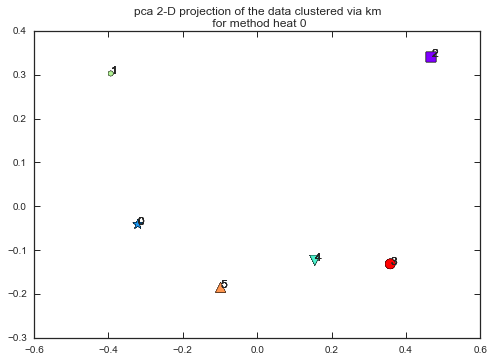

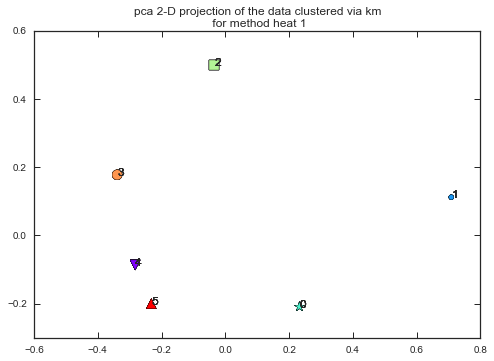

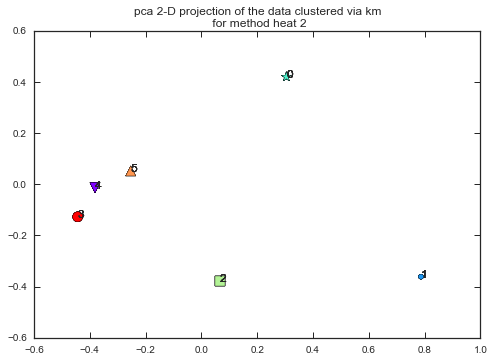

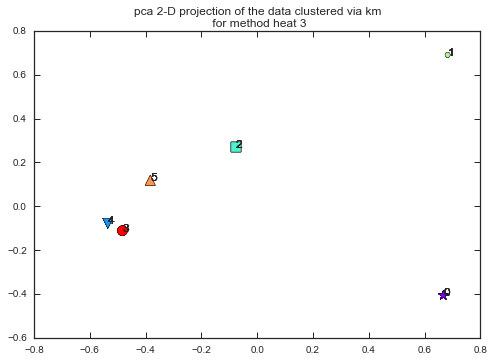

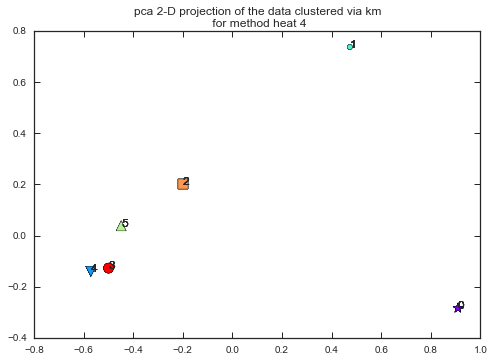

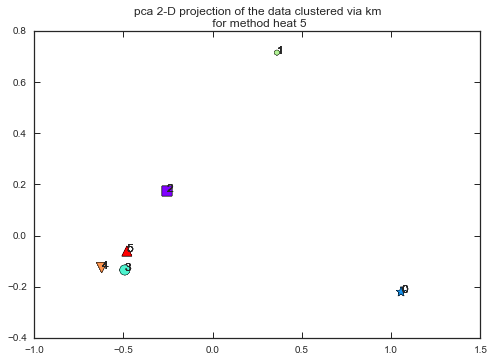

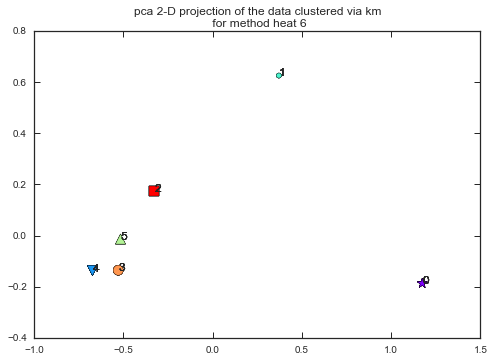

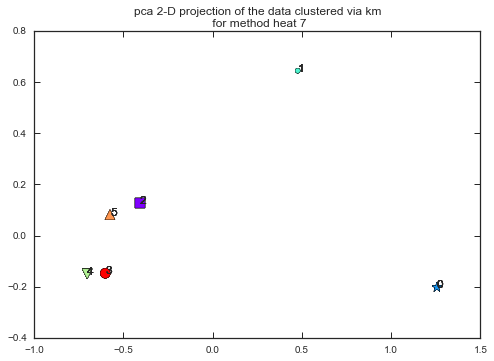

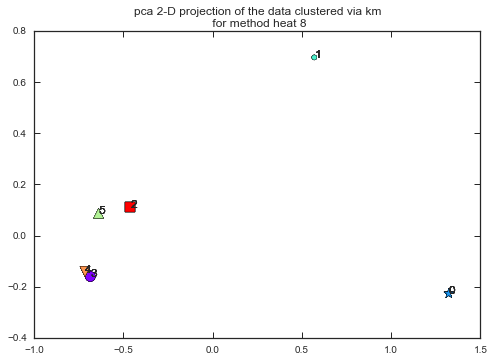

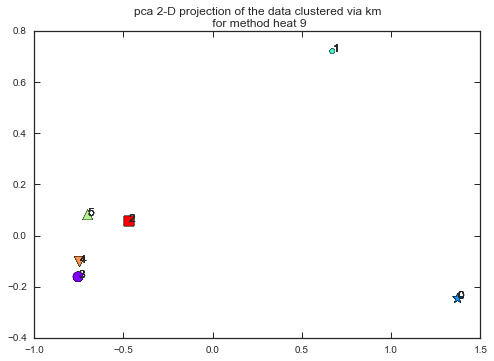

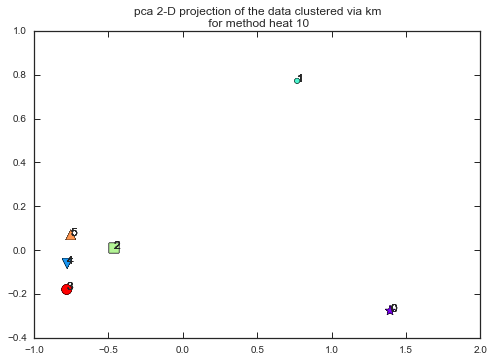

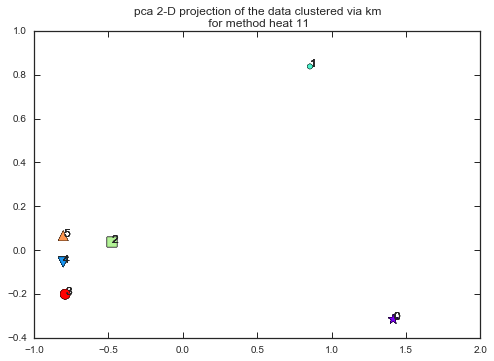

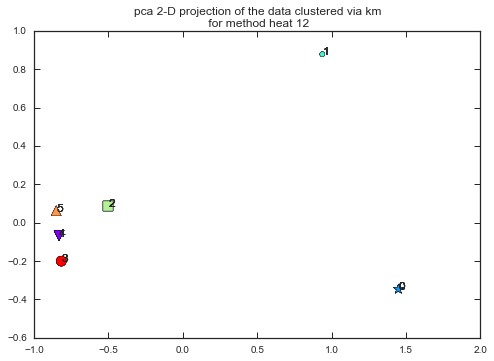

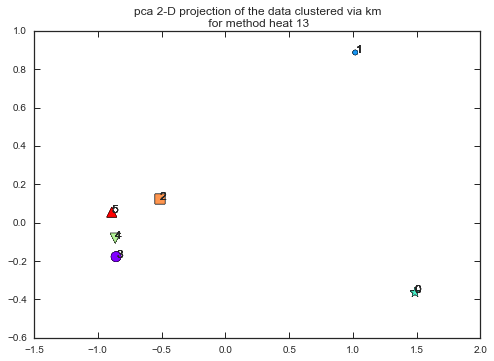

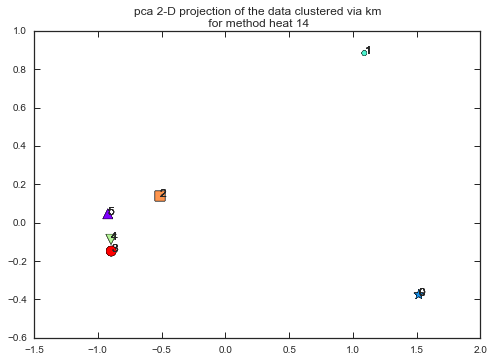

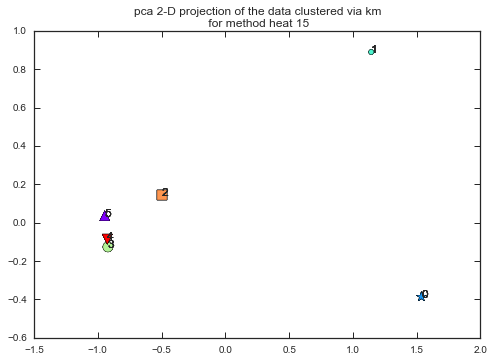

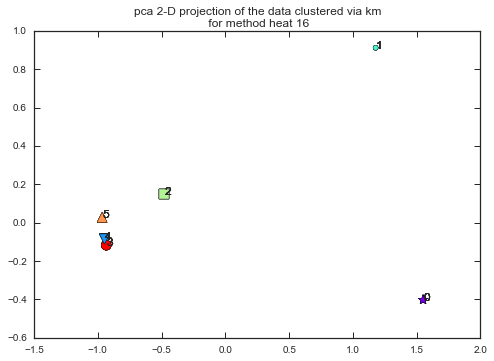

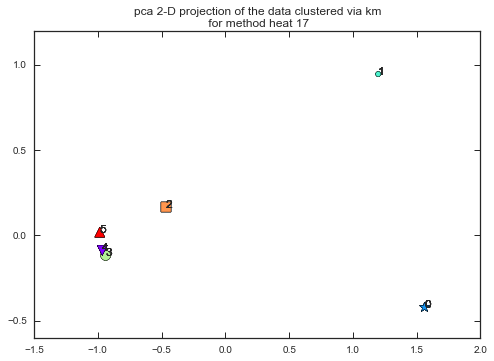

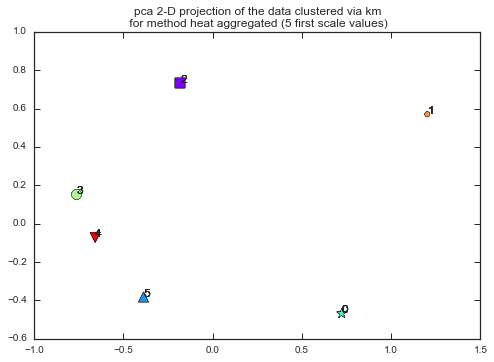

smax= 18  and smin= 1


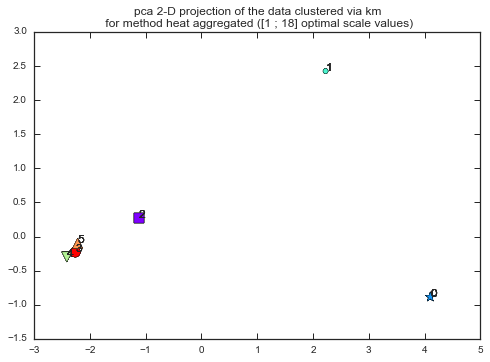

smax= 6  and smin= 1


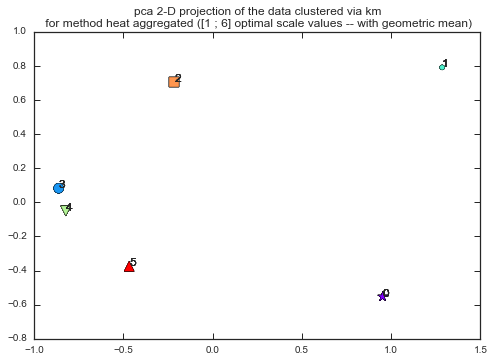

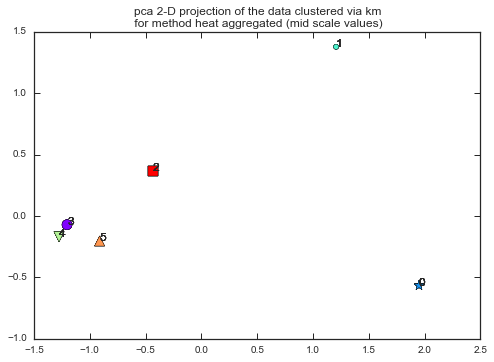

Creating Vertex Features matrix
V is a 40 by 8 matrix.
Node-role matrix is of dimensions 40 by 6
[[ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959  

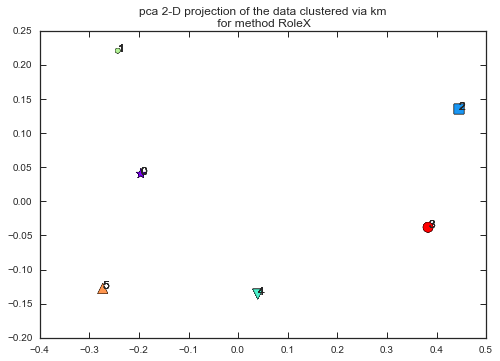

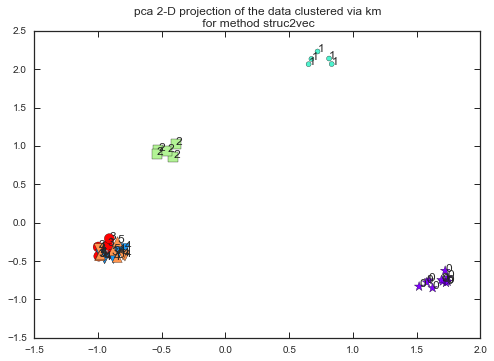

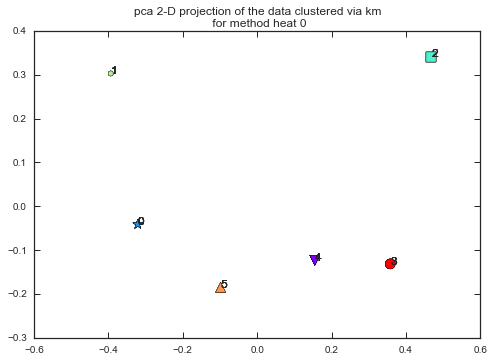

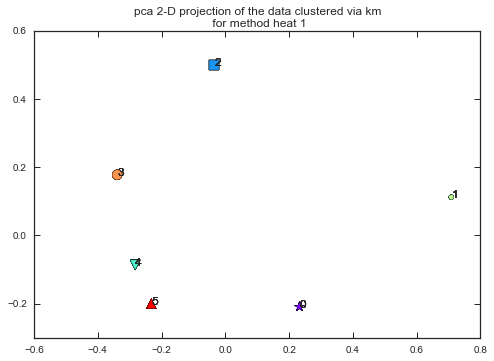

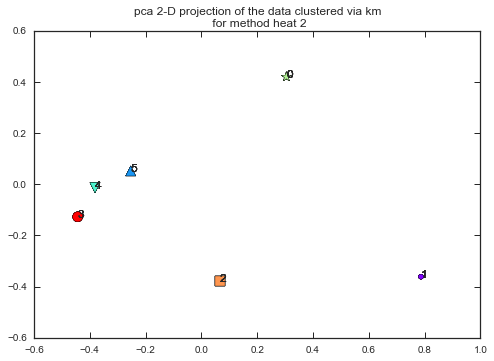

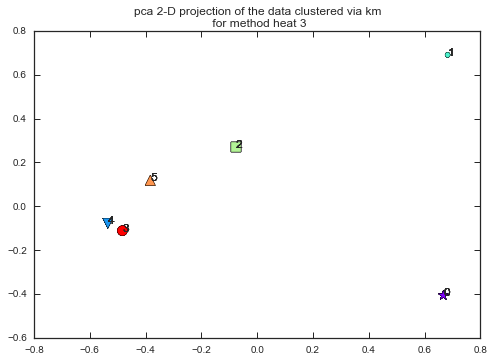

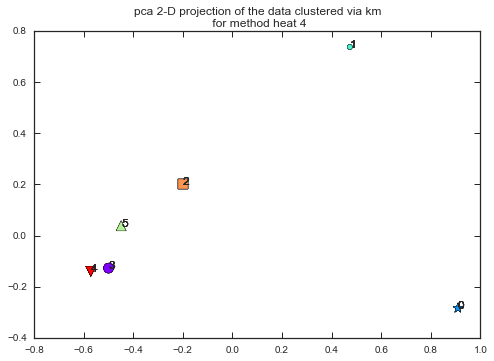

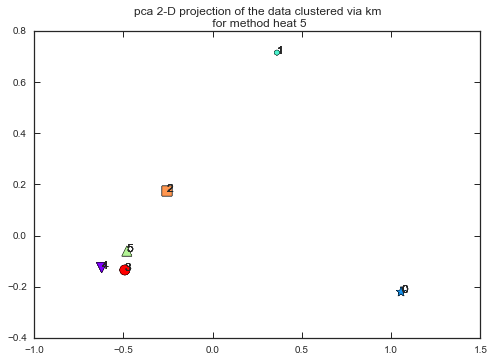

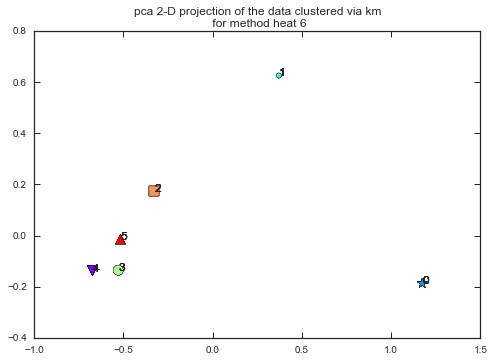

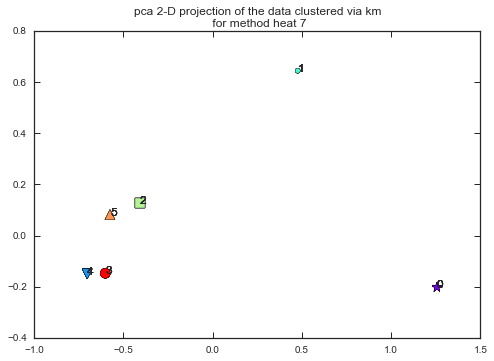

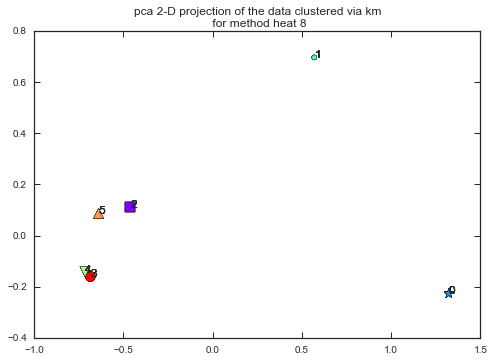

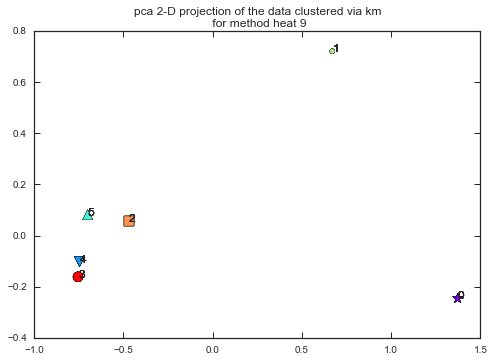

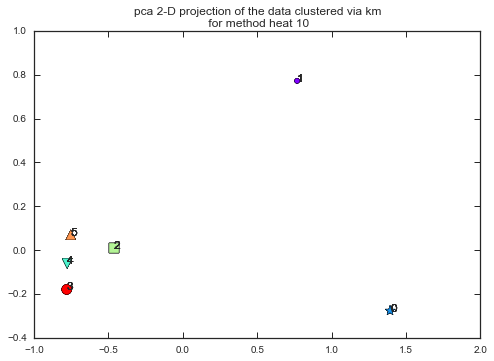

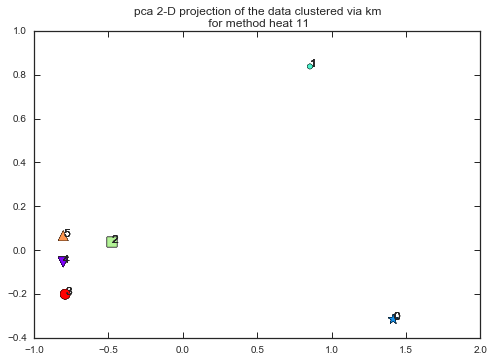

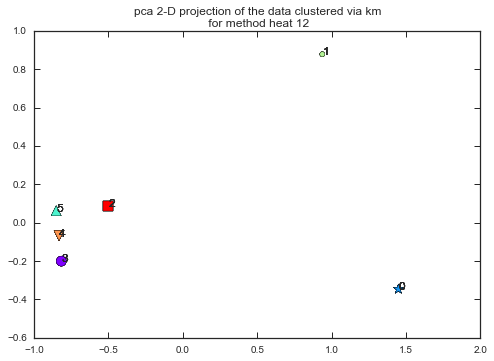

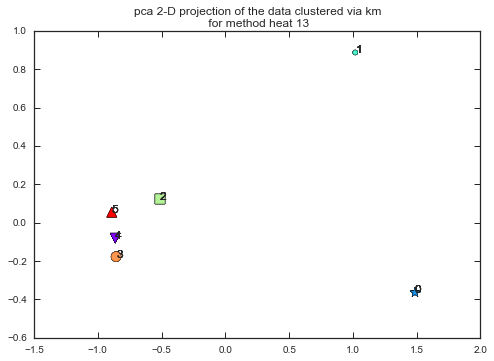

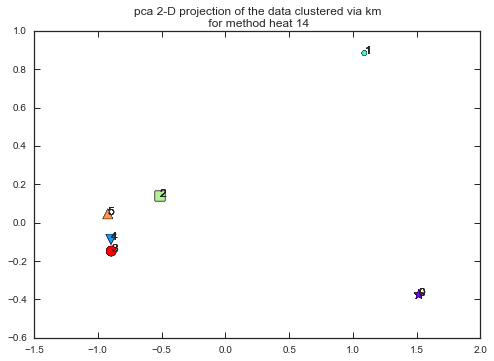

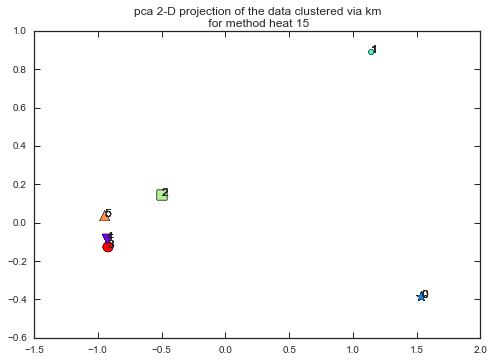

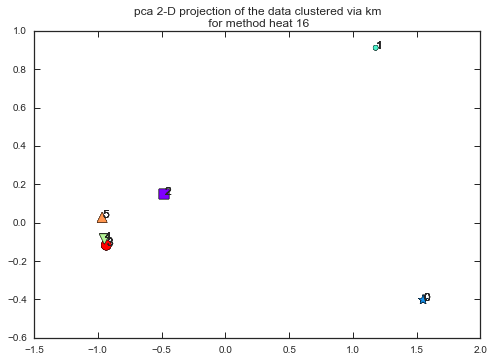

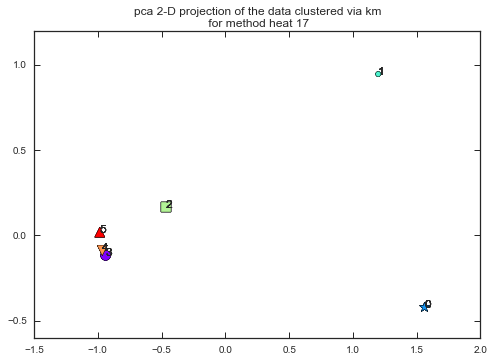

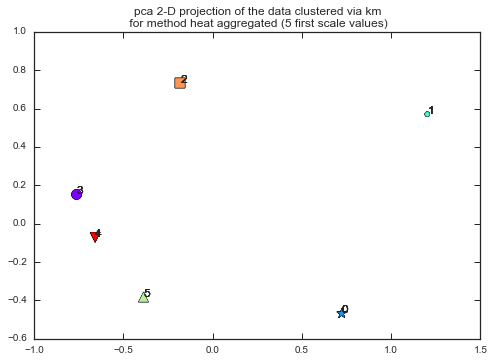

smax= 18  and smin= 1


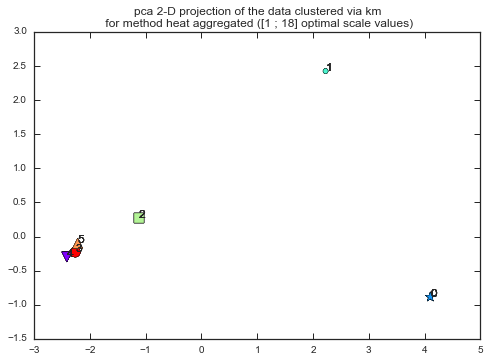

smax= 6  and smin= 1


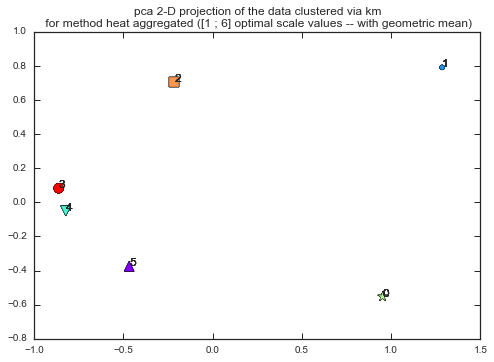

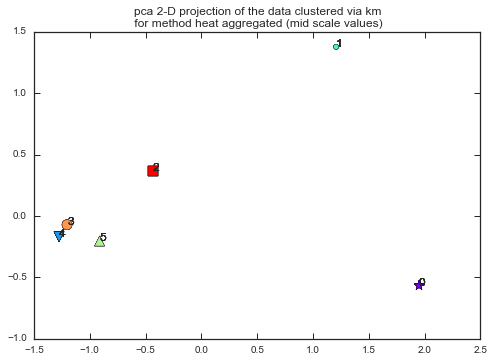

Creating Vertex Features matrix
V is a 40 by 8 matrix.
Node-role matrix is of dimensions 40 by 6
[[ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959  

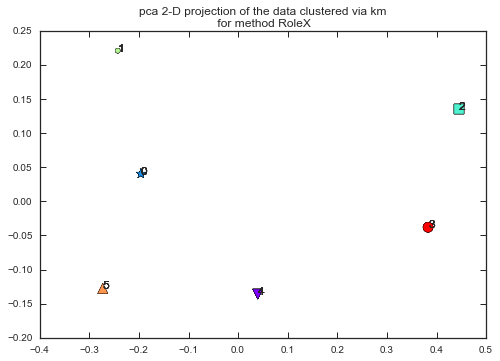

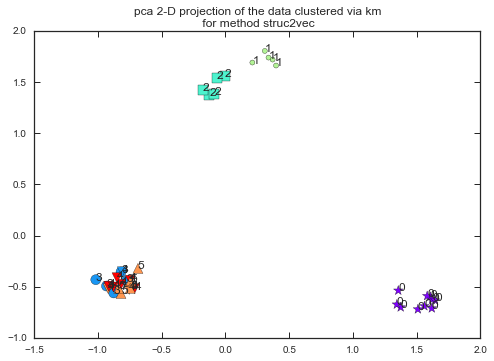

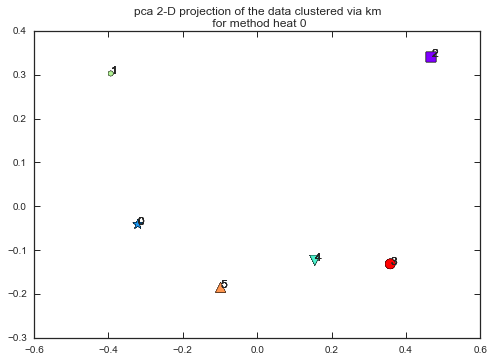

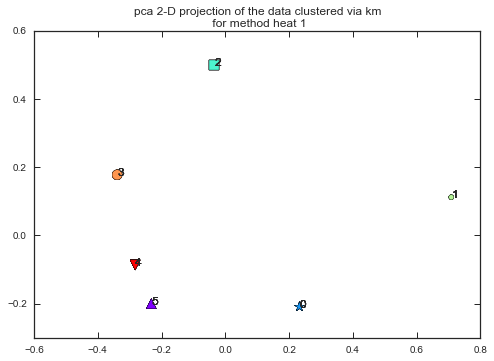

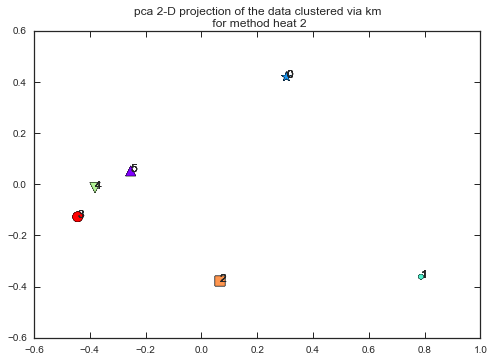

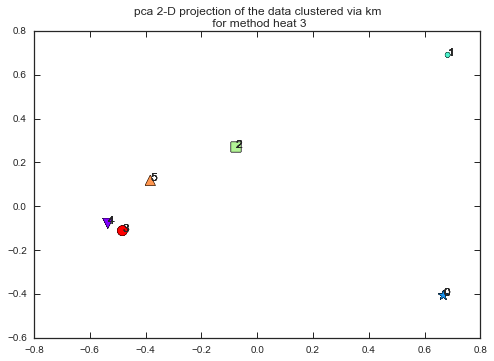

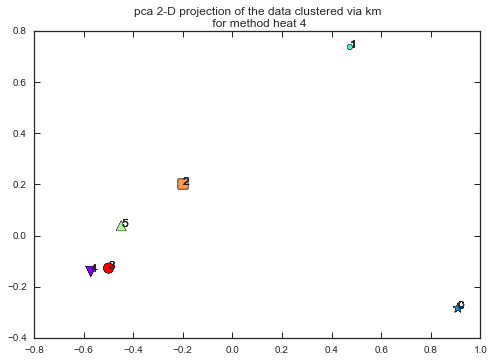

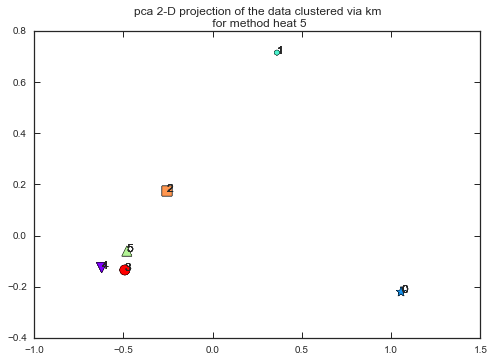

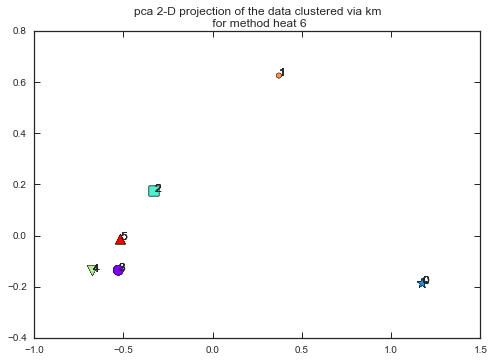

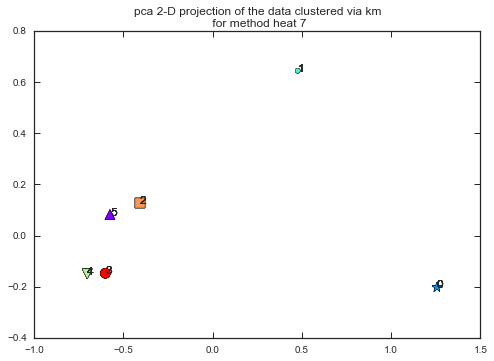

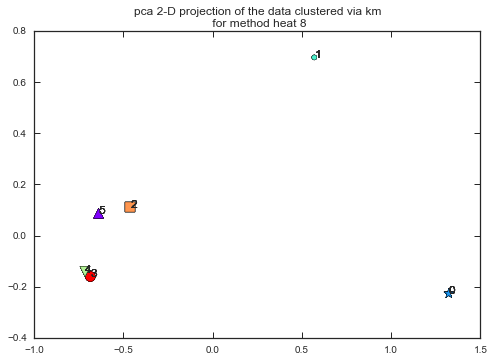

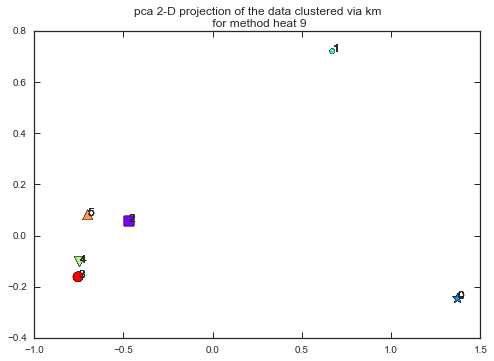

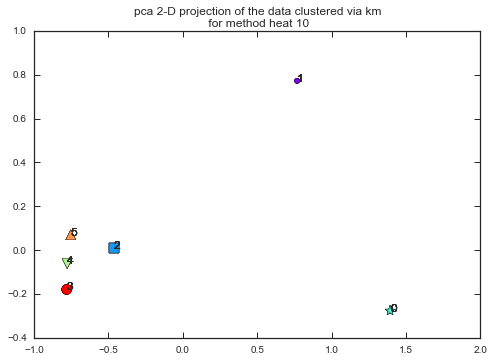

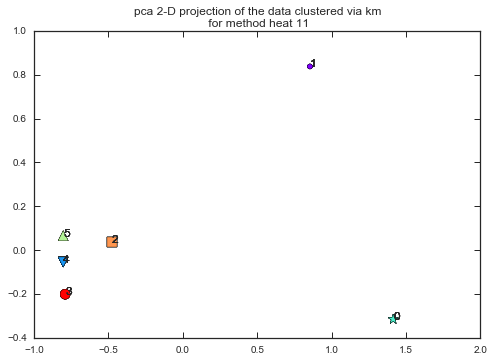

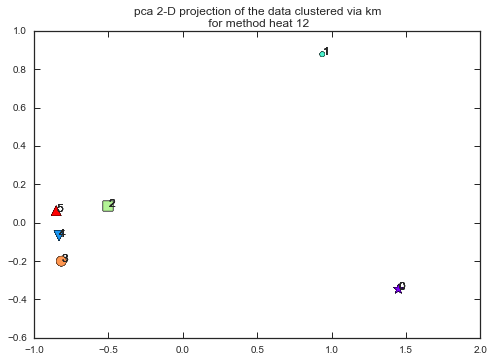

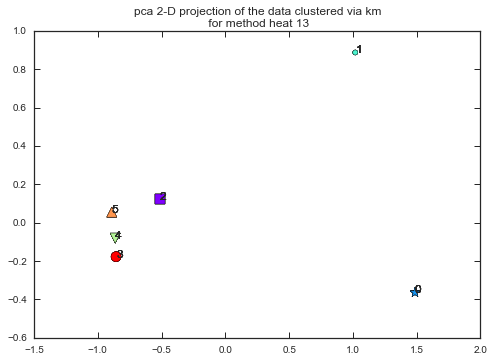

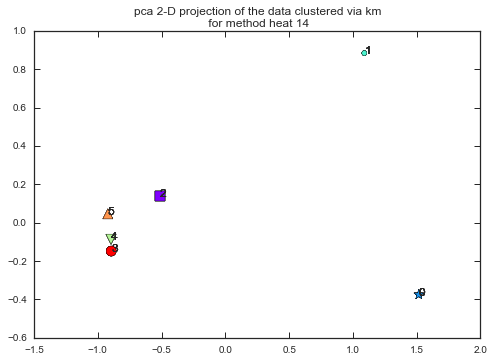

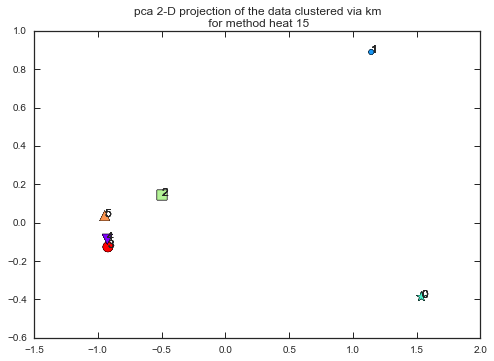

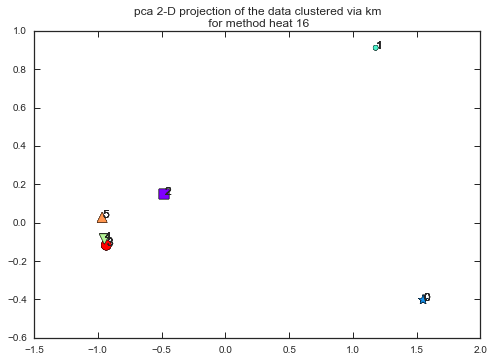

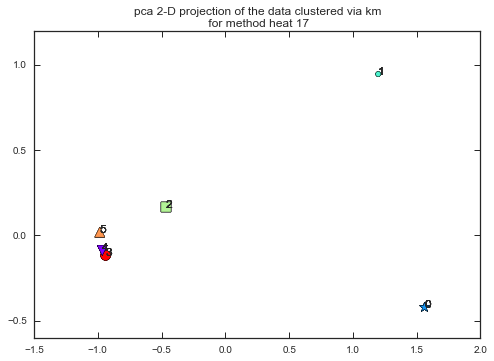

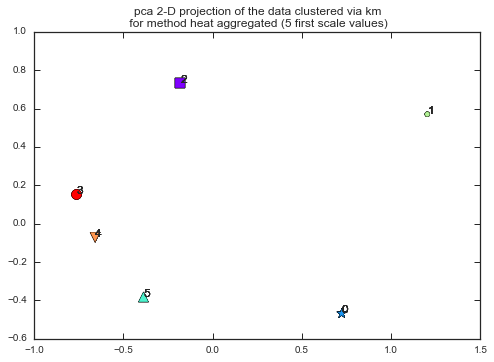

smax= 18  and smin= 1


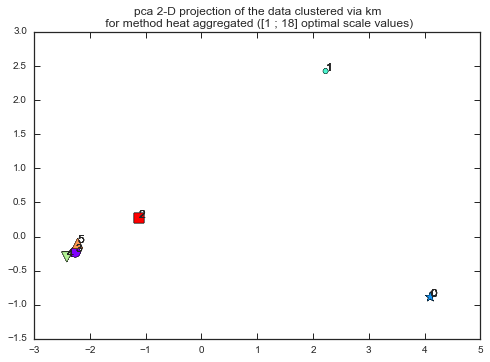

smax= 6  and smin= 1


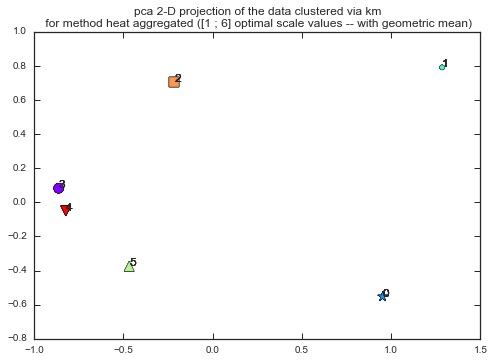

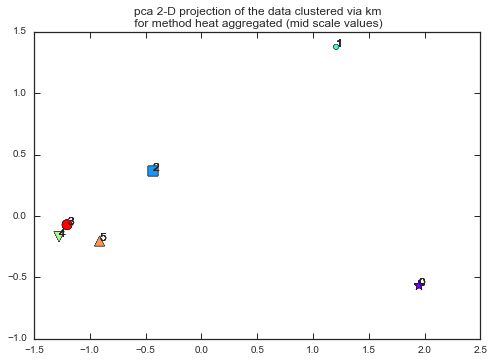

Creating Vertex Features matrix
V is a 40 by 8 matrix.
Node-role matrix is of dimensions 40 by 6
[[ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959  

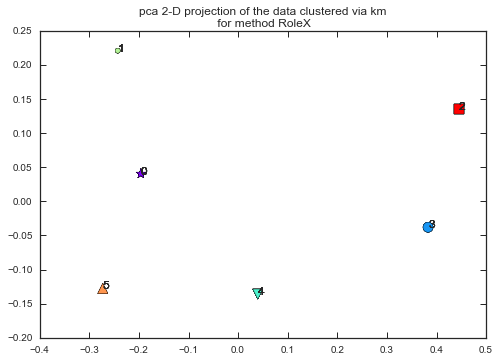

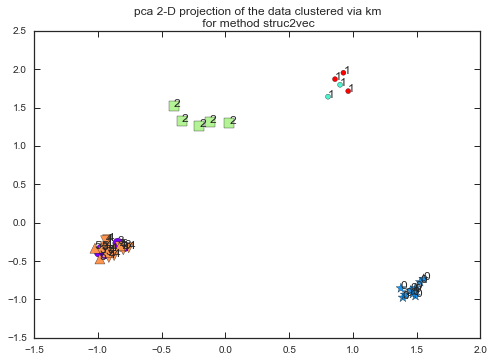

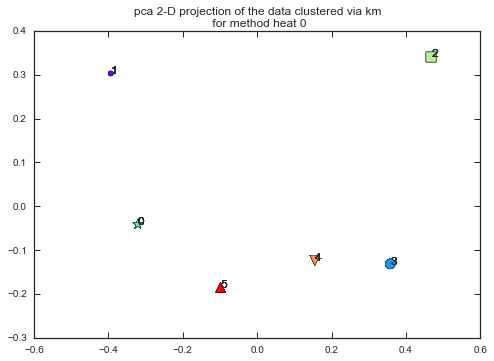

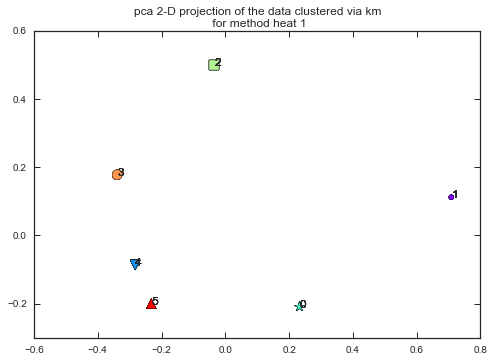

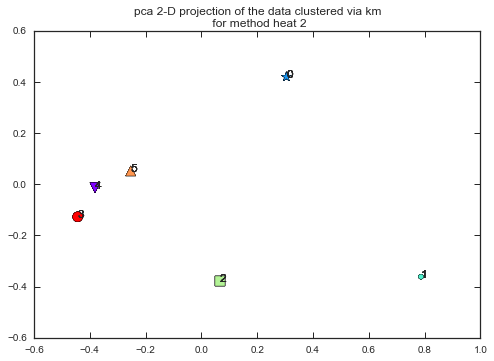

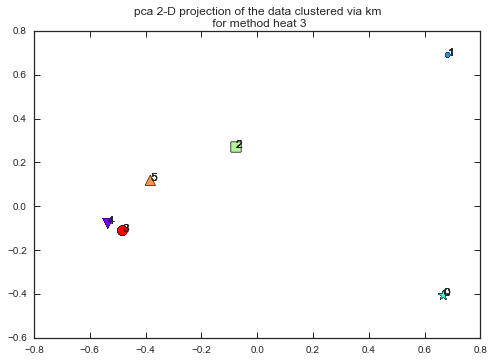

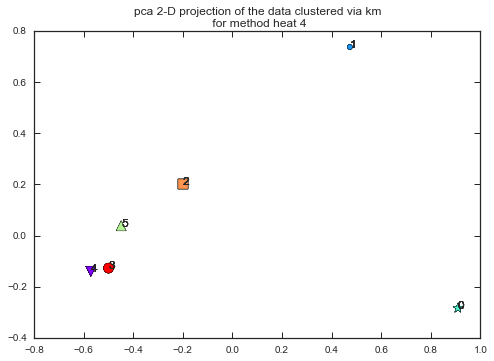

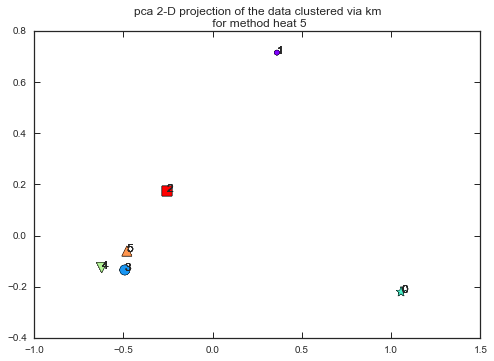

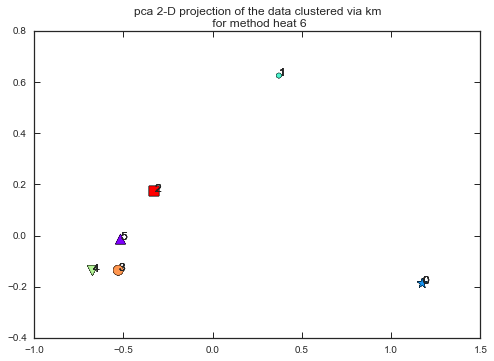

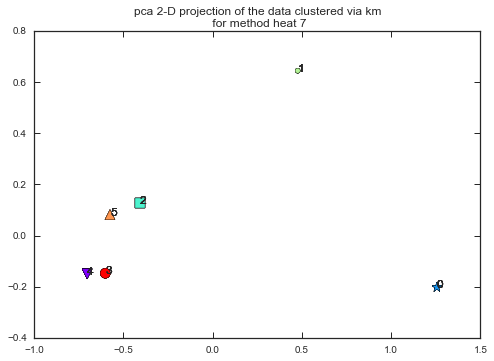

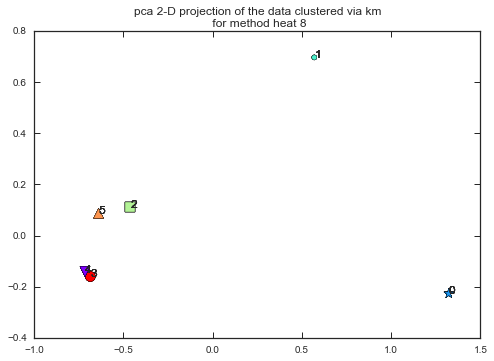

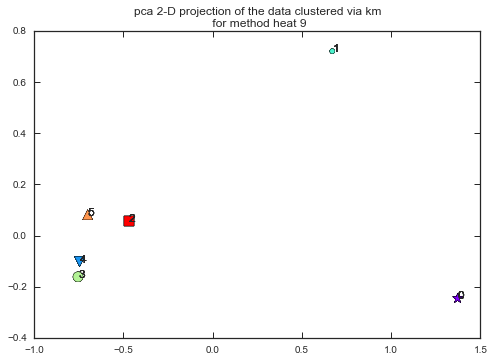

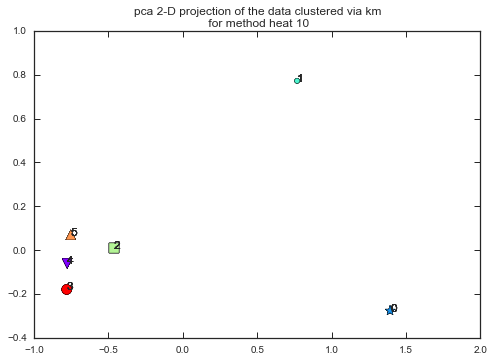

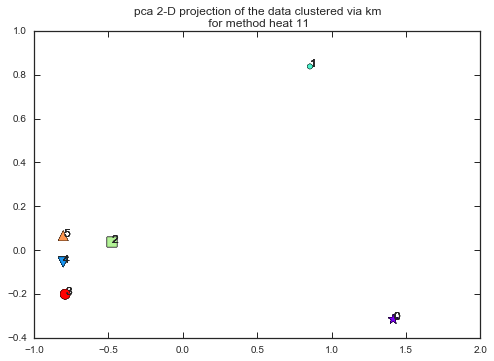

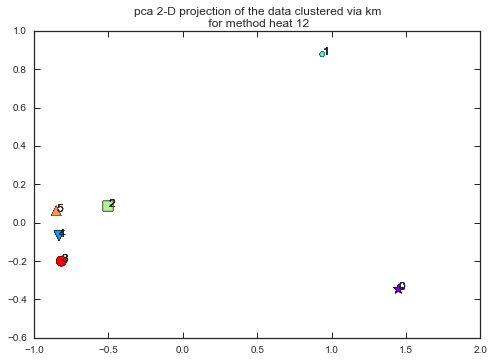

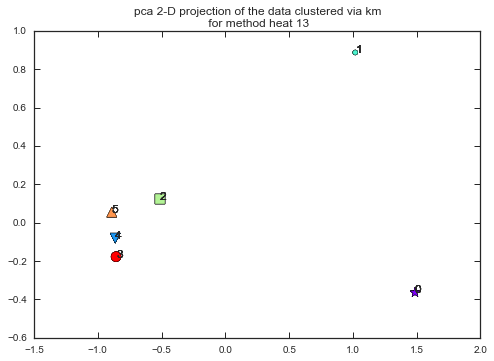

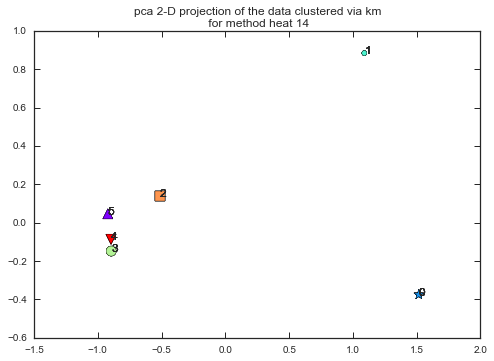

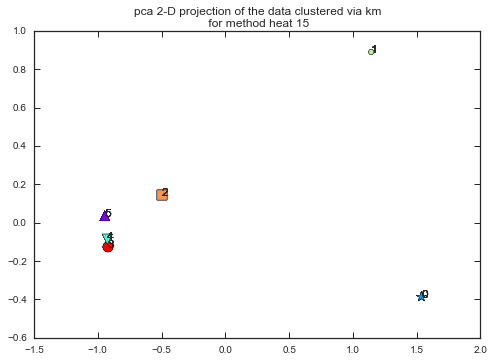

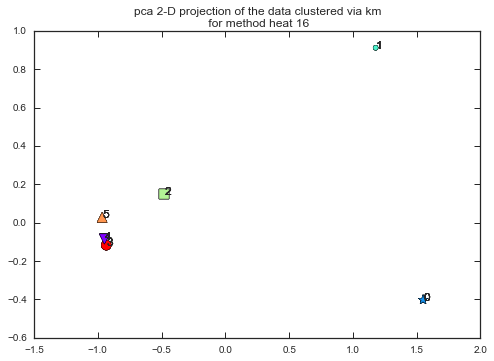

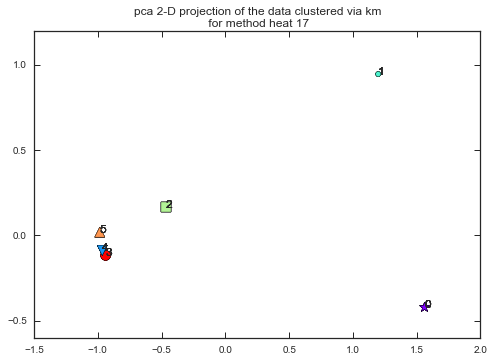

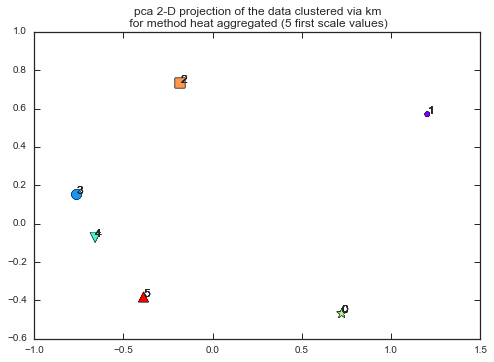

smax= 18  and smin= 1


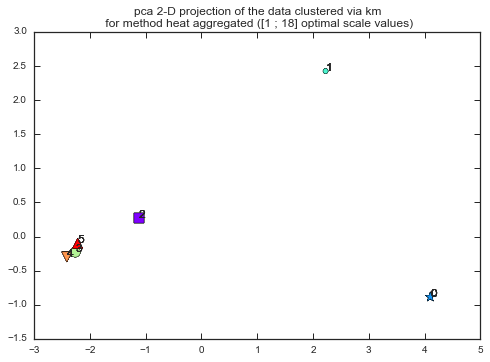

smax= 6  and smin= 1


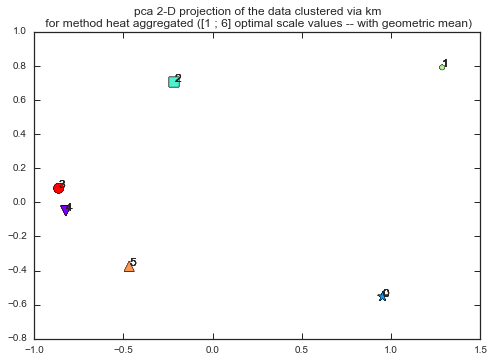

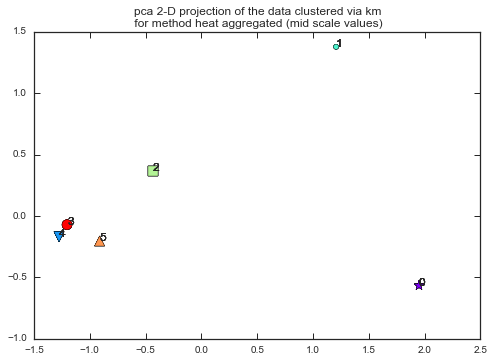

Creating Vertex Features matrix
V is a 40 by 8 matrix.
Node-role matrix is of dimensions 40 by 6
[[ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959  

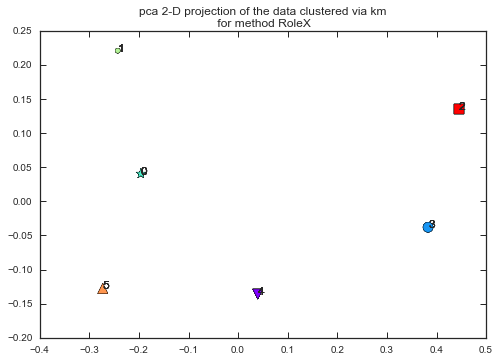

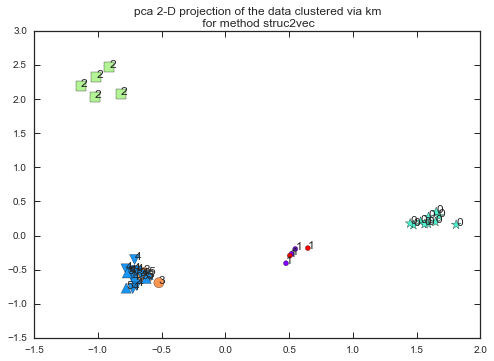

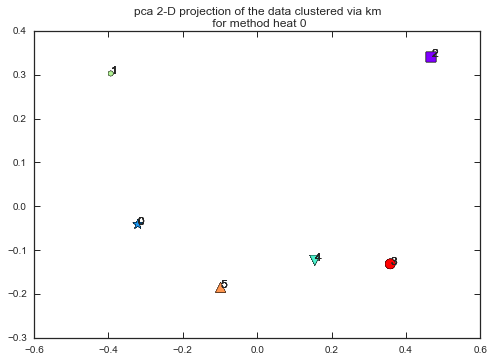

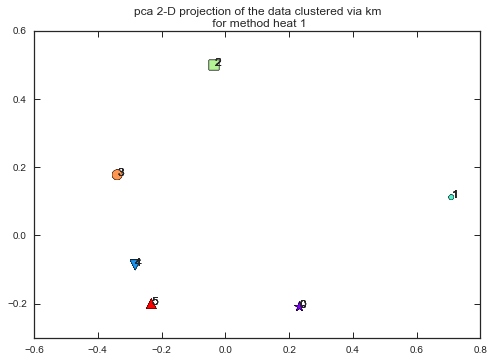

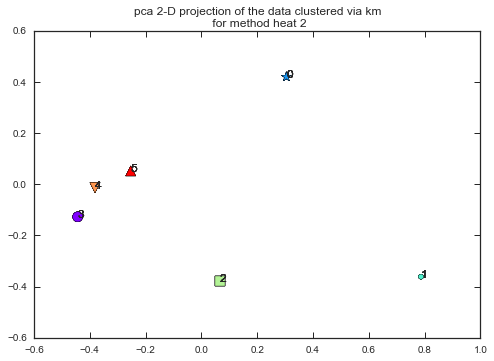

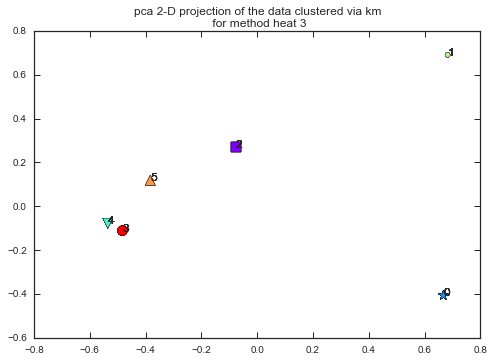

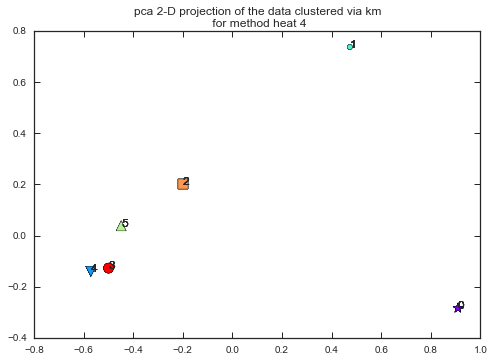

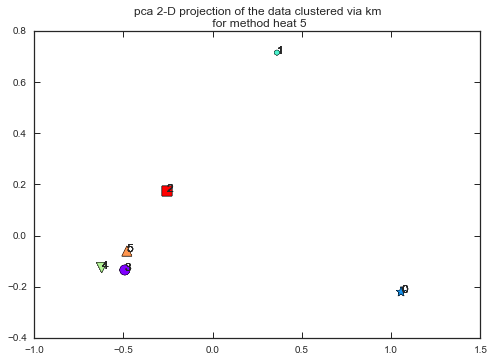

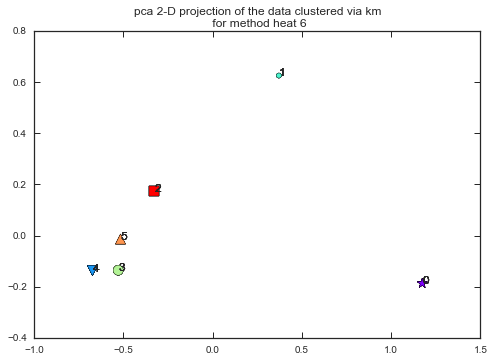

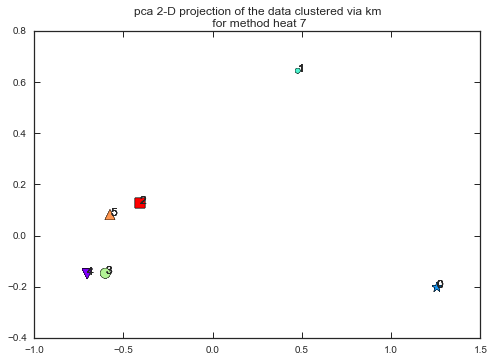

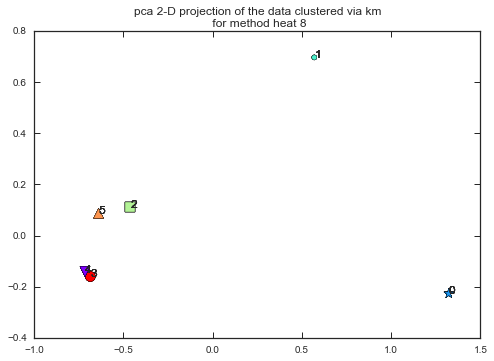

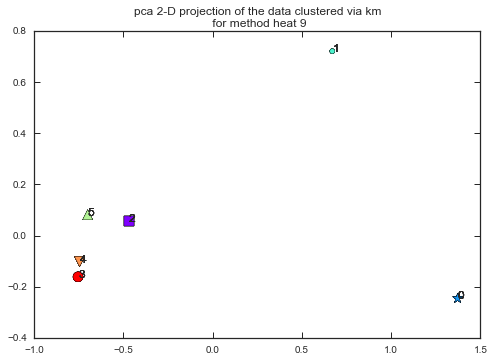

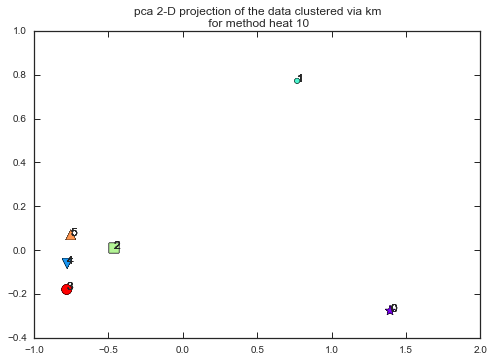

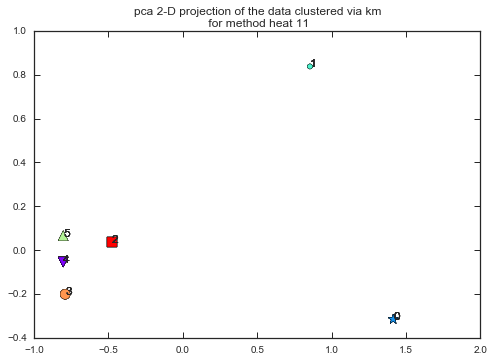

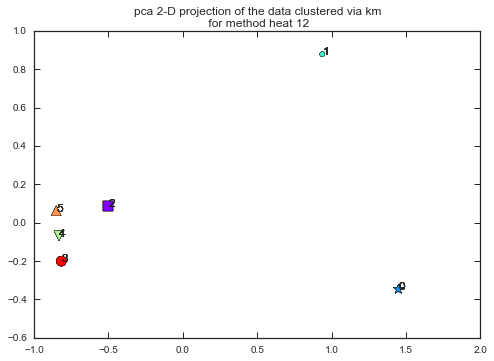

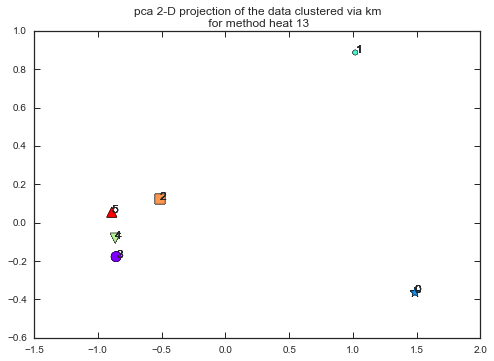

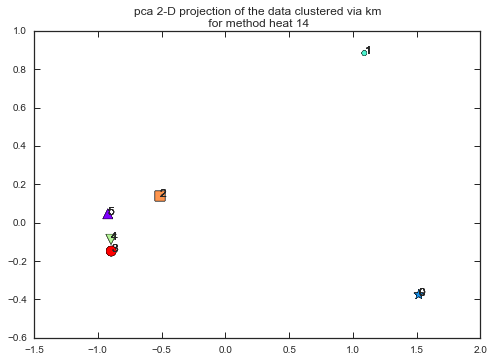

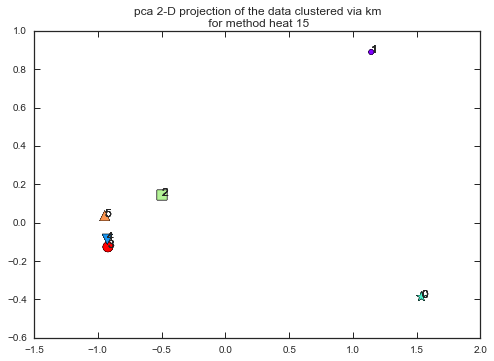

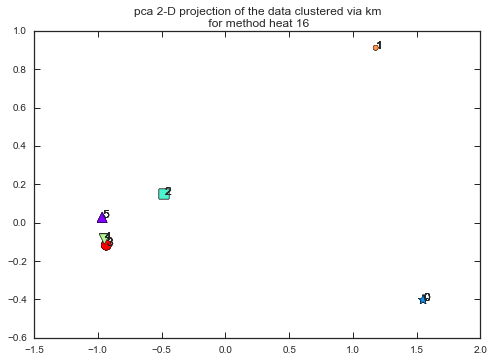

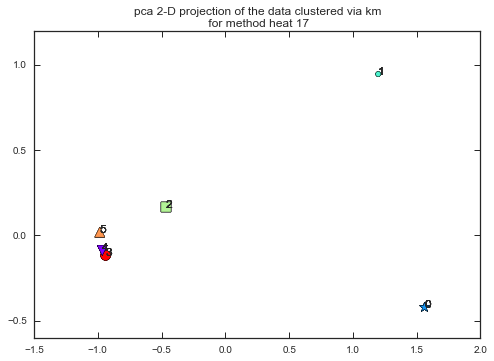

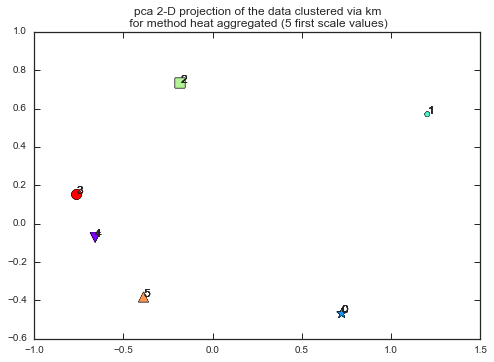

smax= 18  and smin= 1


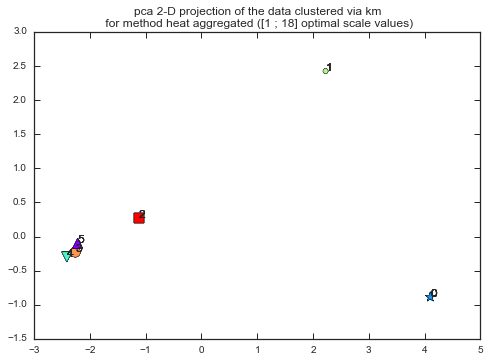

smax= 6  and smin= 1


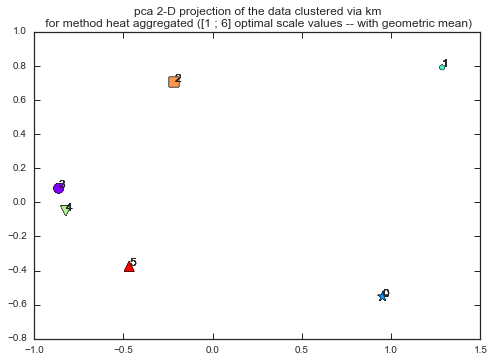

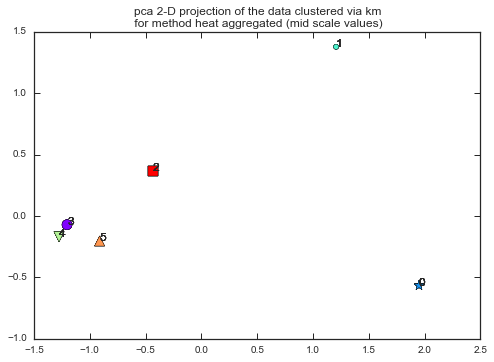

Creating Vertex Features matrix
V is a 40 by 8 matrix.
Node-role matrix is of dimensions 40 by 6
[[ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959  

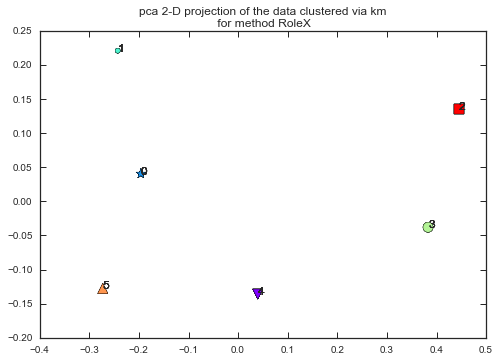

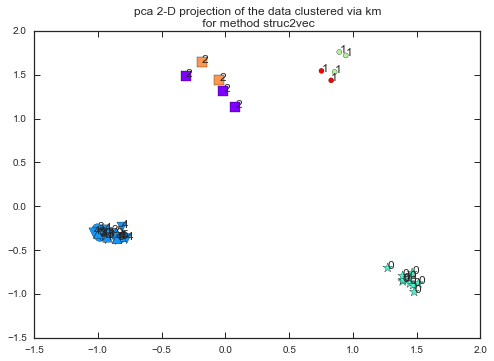

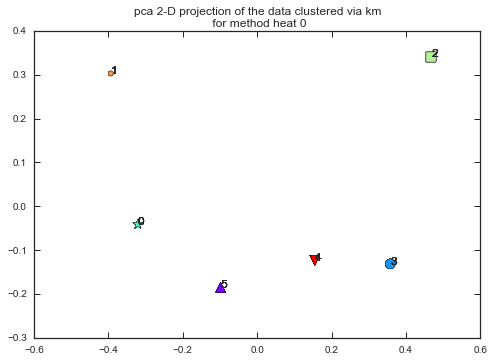

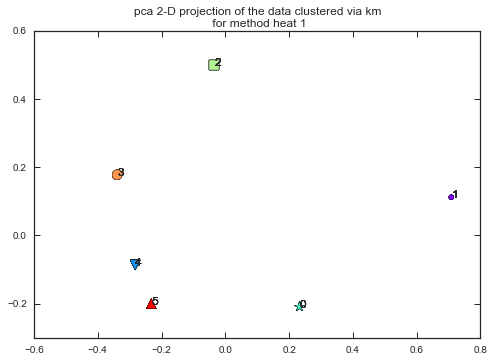

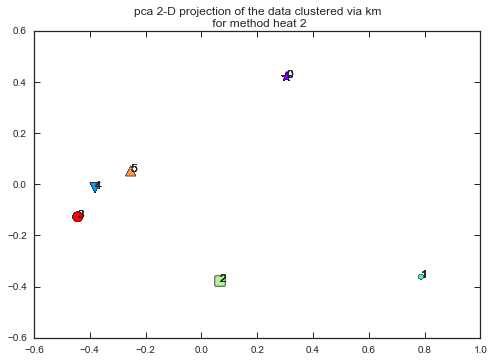

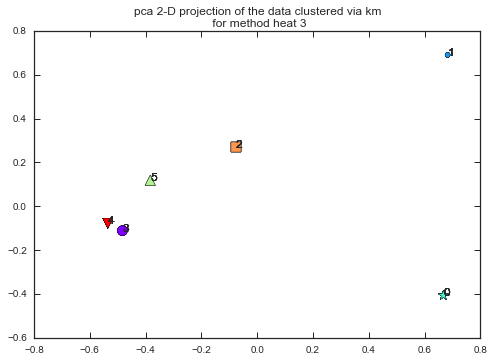

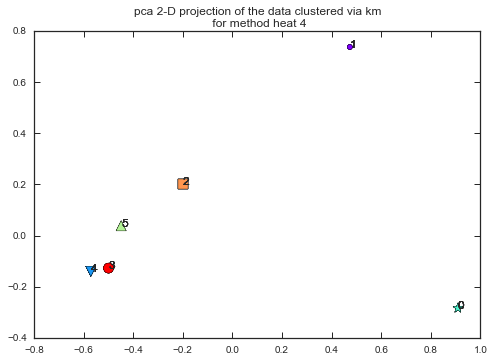

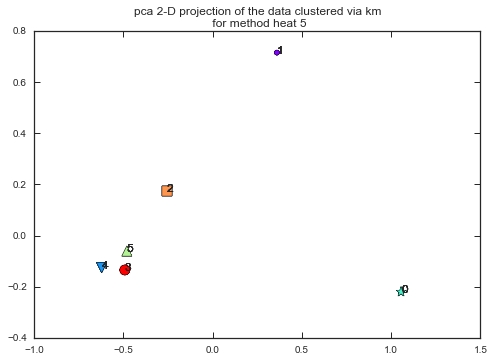

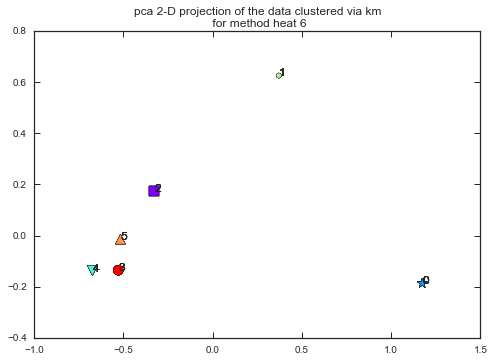

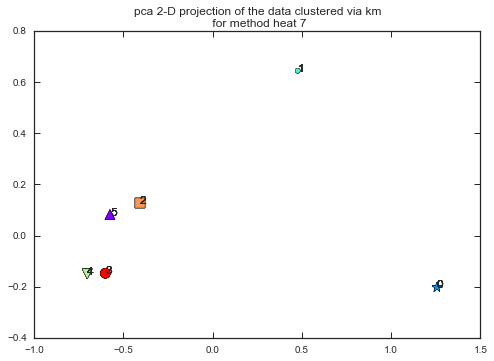

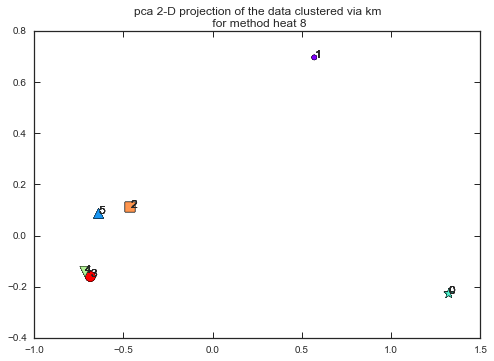

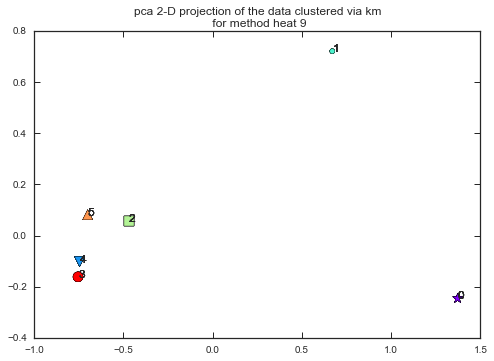

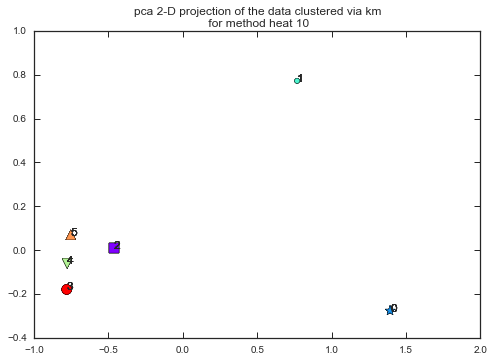

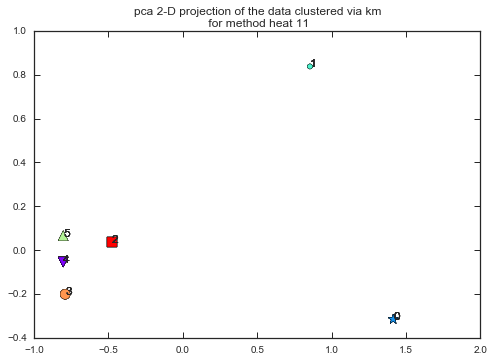

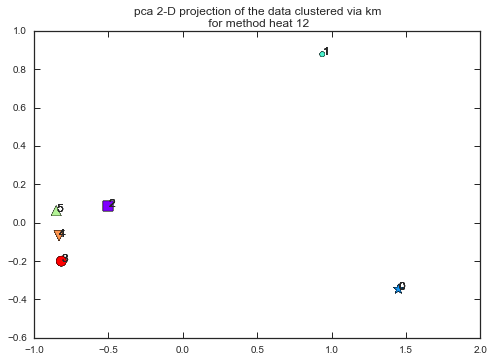

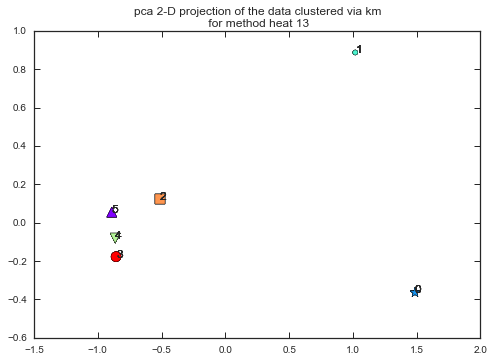

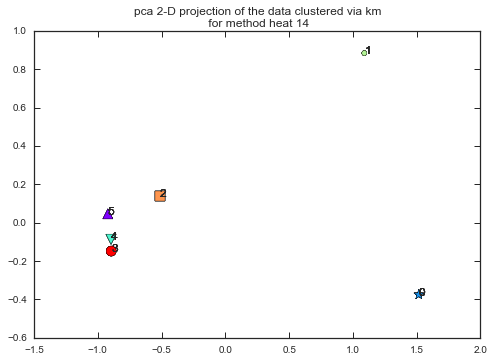

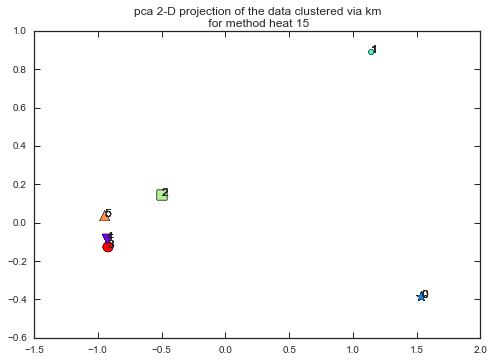

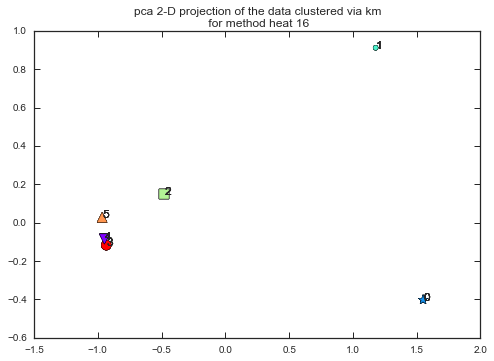

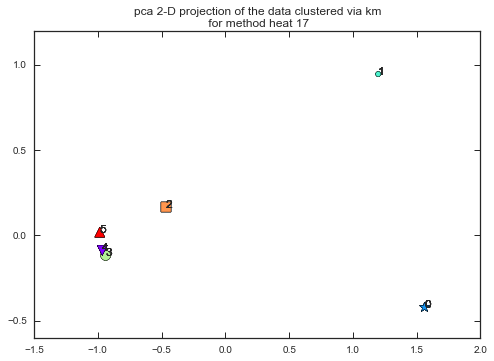

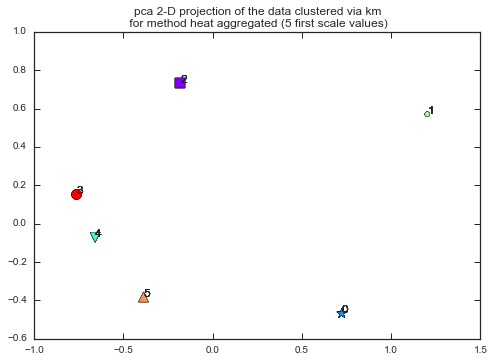

smax= 18  and smin= 1


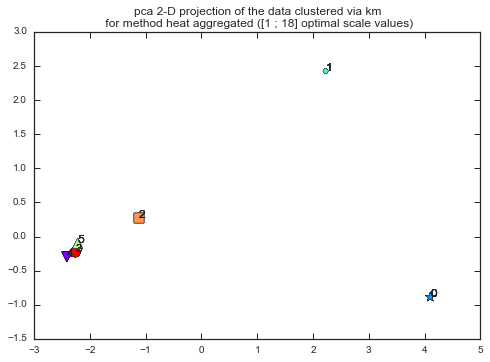

smax= 6  and smin= 1


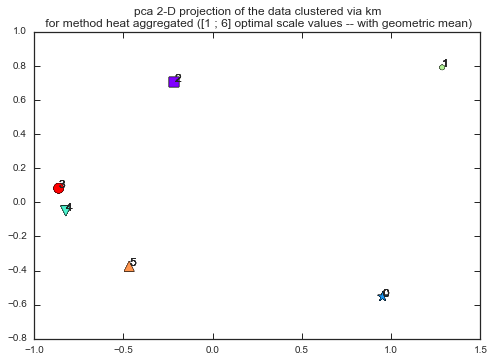

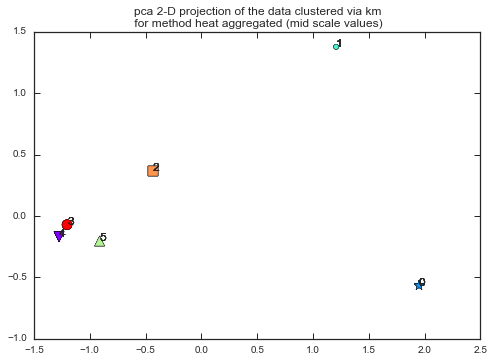

Creating Vertex Features matrix
V is a 40 by 8 matrix.
Node-role matrix is of dimensions 40 by 6
[[ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959  

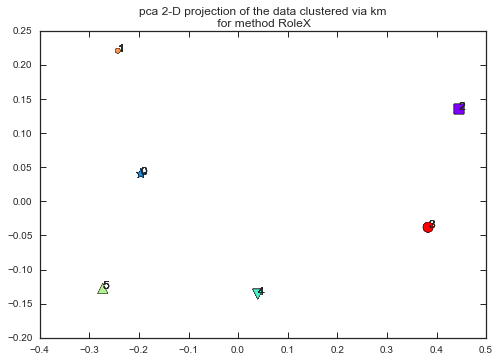

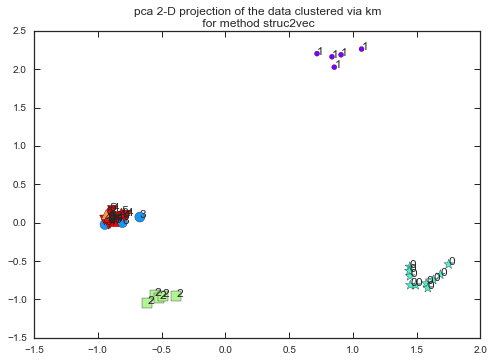

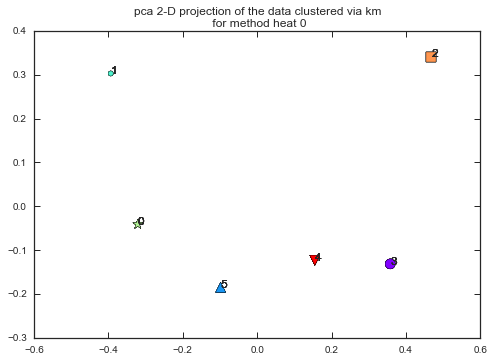

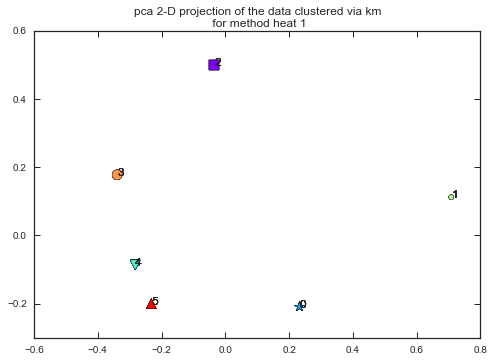

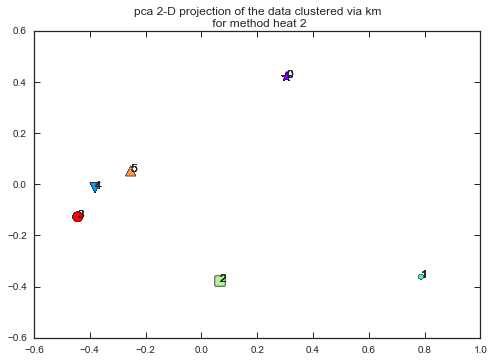

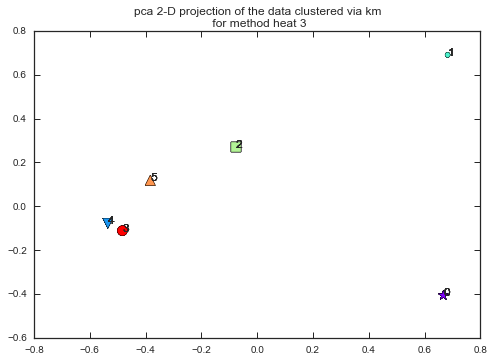

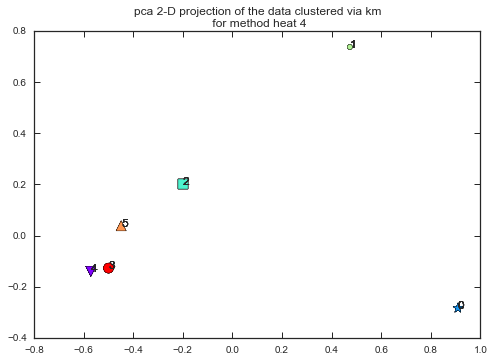

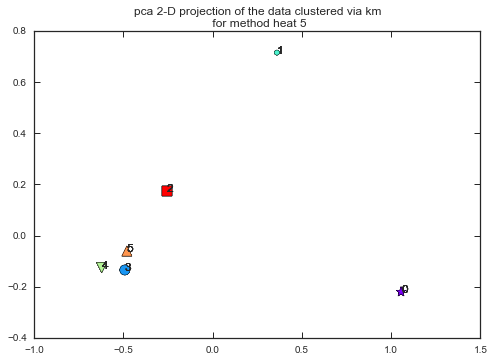

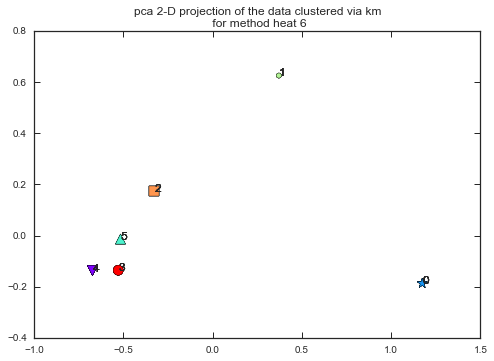

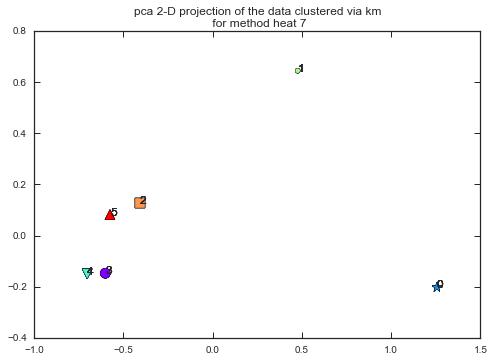

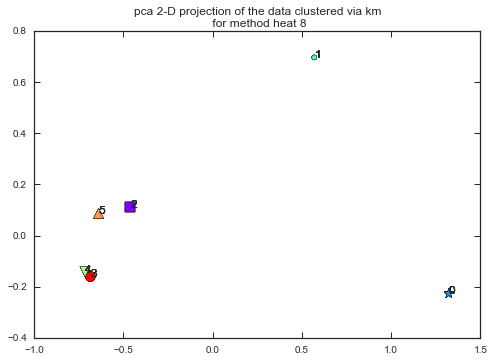

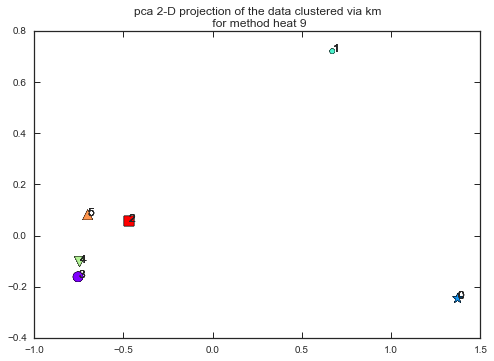

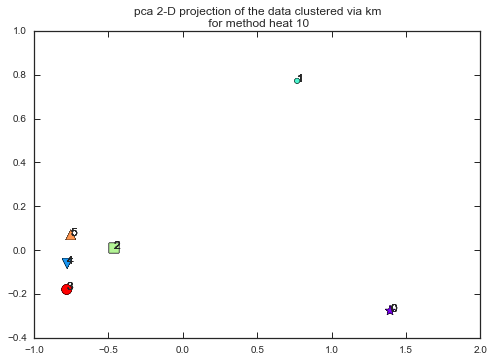

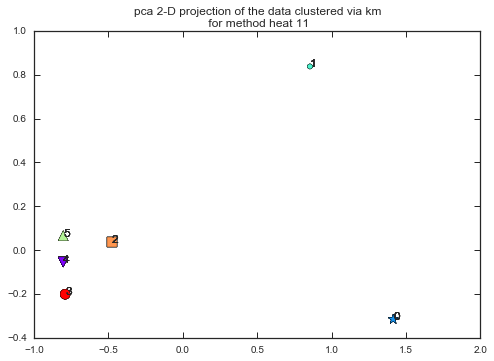

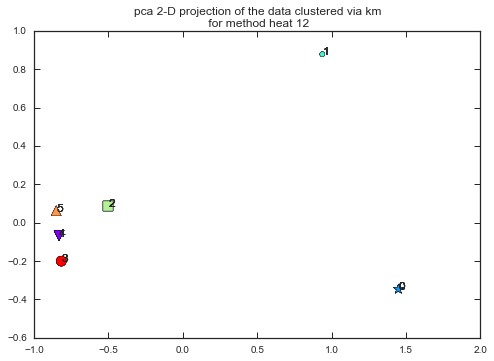

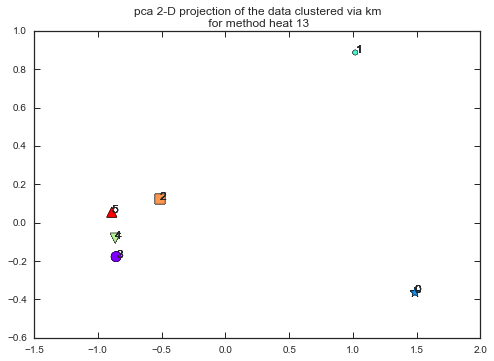

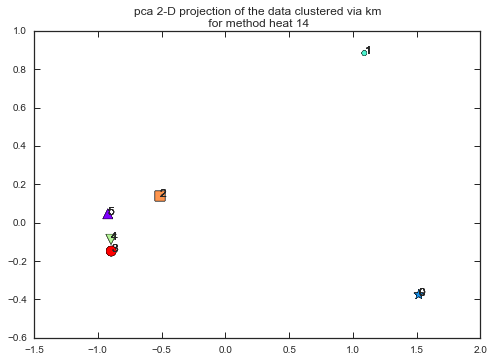

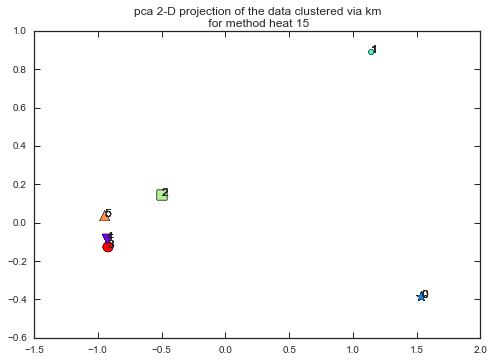

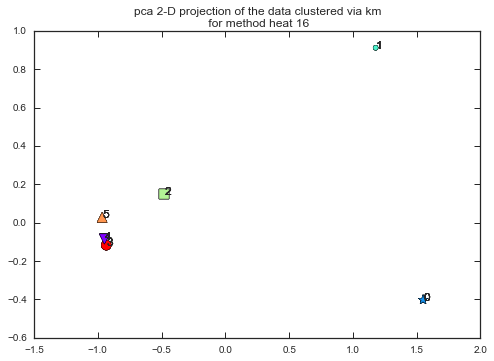

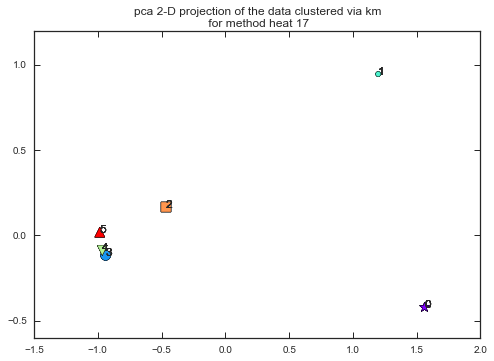

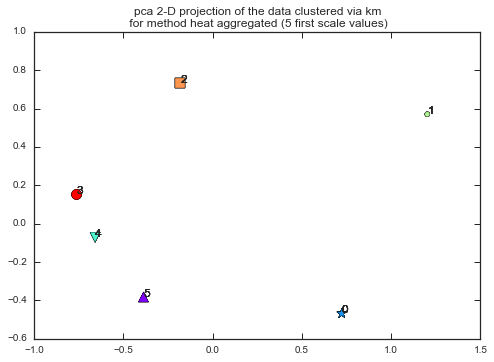

smax= 18  and smin= 1


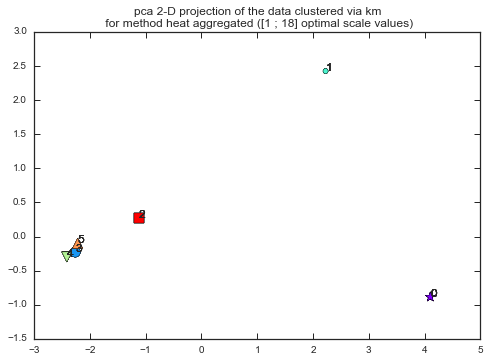

smax= 6  and smin= 1


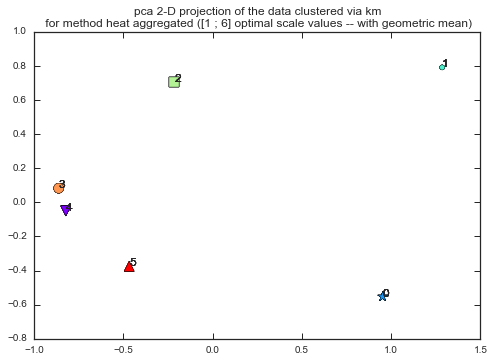

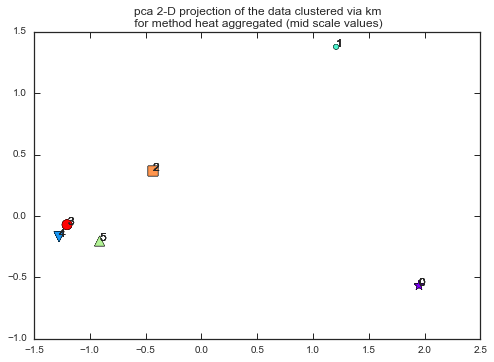

Creating Vertex Features matrix
V is a 40 by 8 matrix.
Node-role matrix is of dimensions 40 by 6
[[ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959  

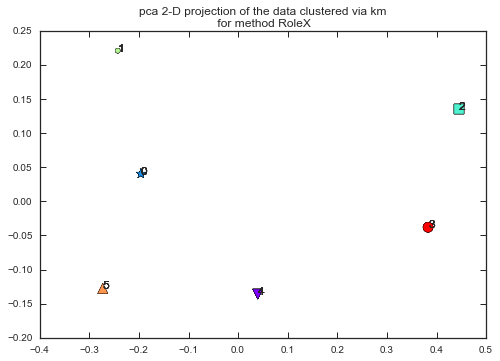

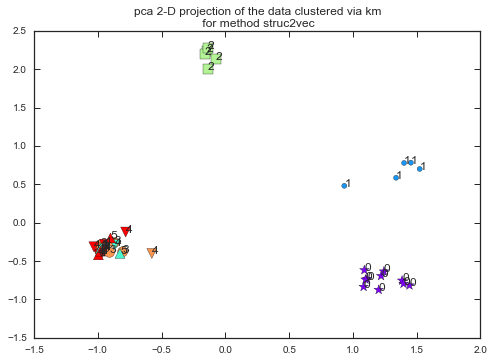

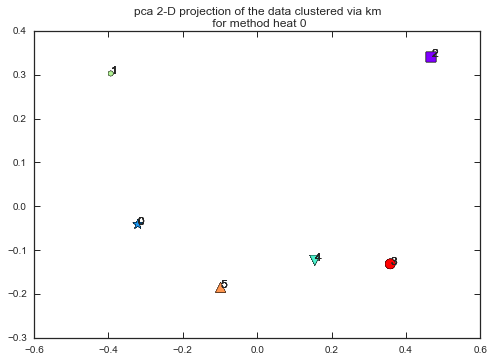

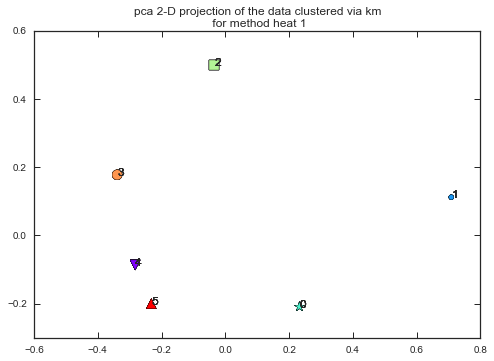

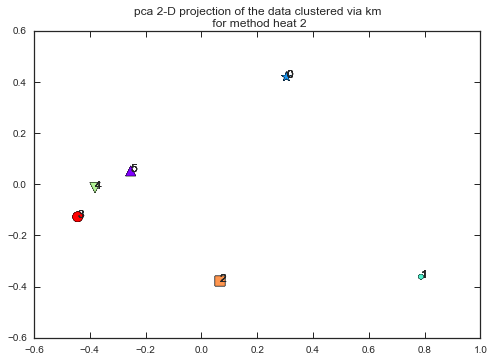

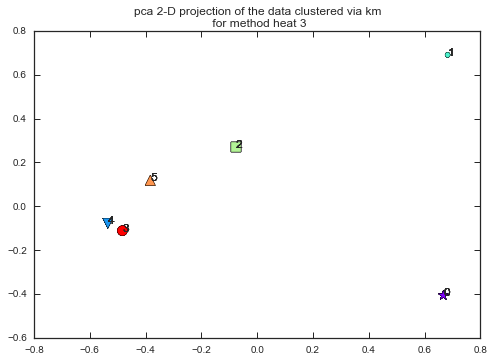

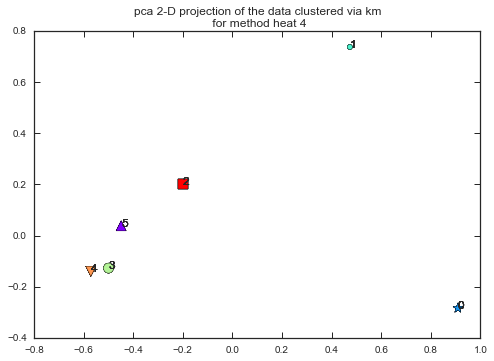

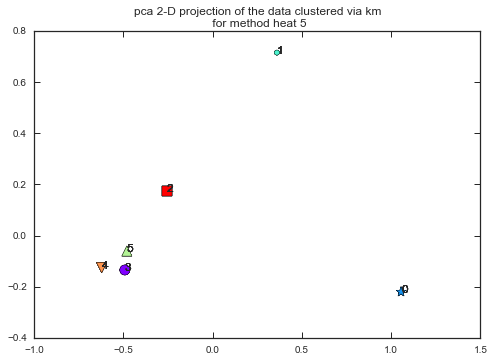

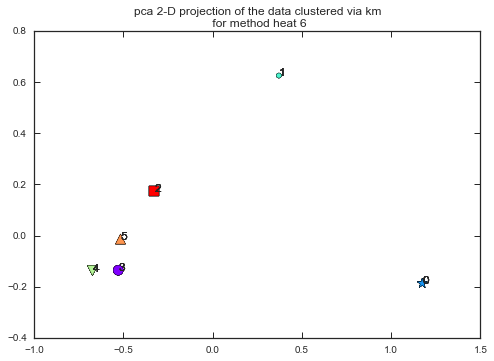

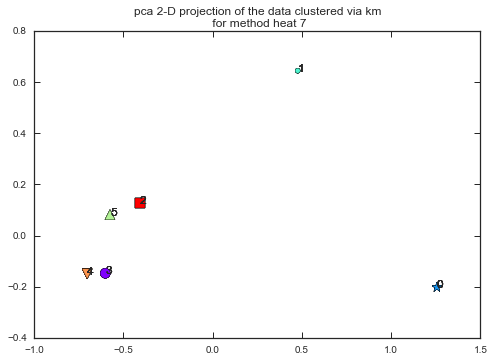

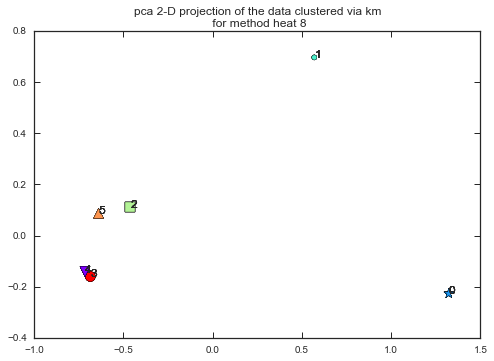

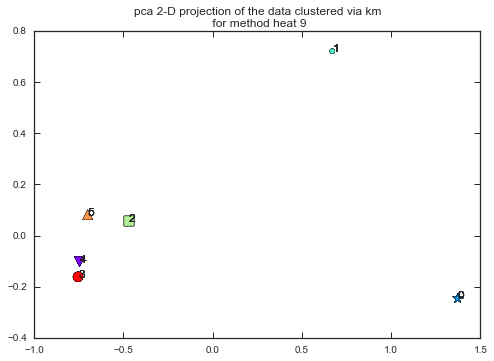

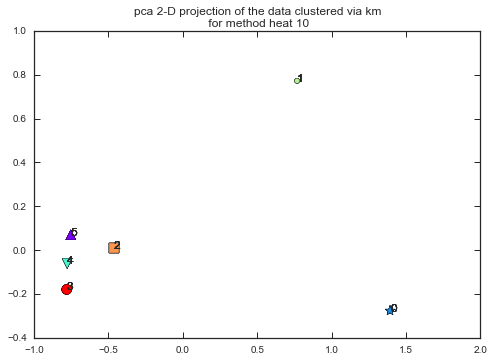

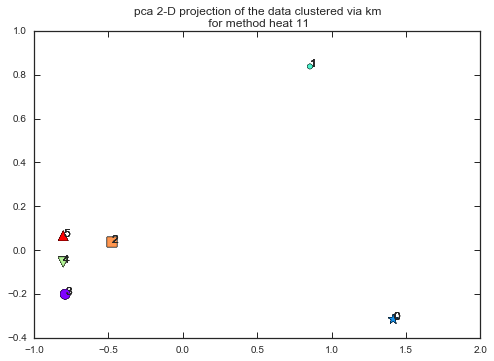

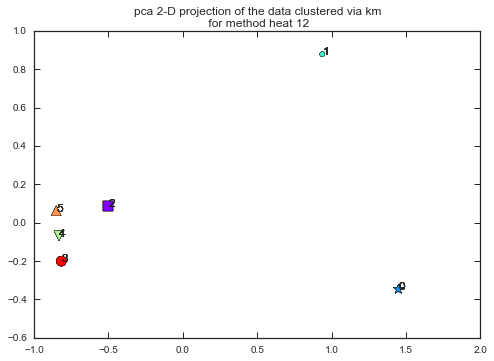

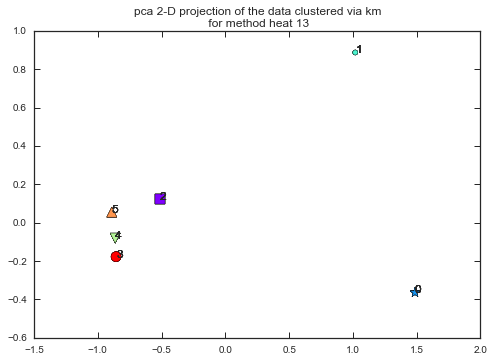

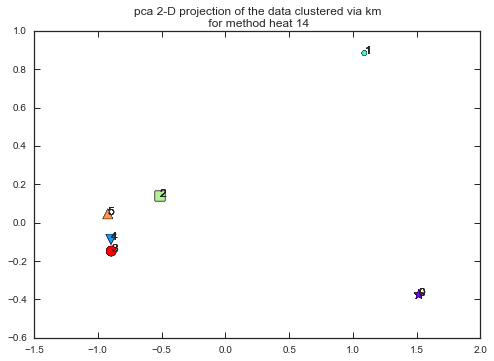

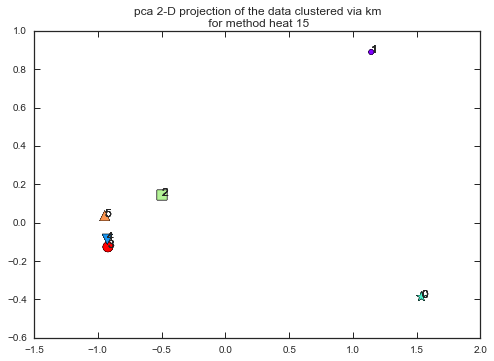

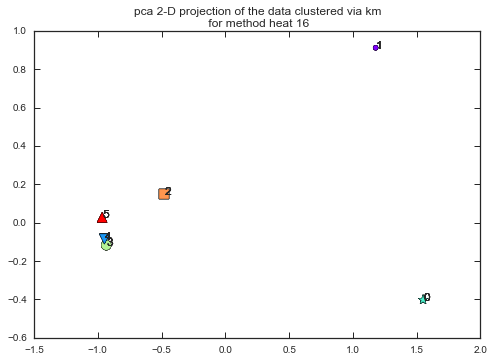

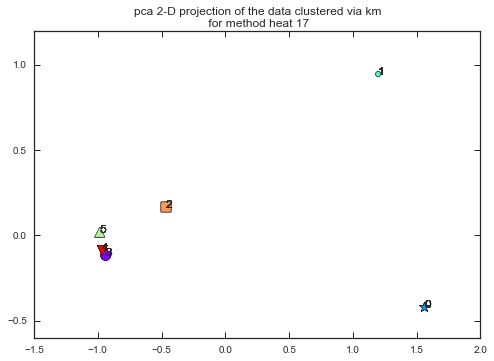

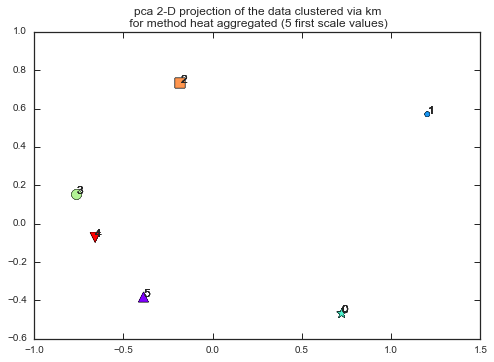

smax= 18  and smin= 1


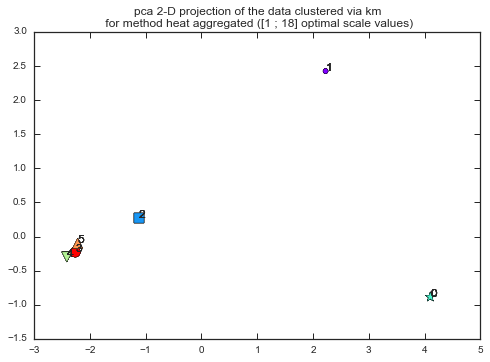

smax= 6  and smin= 1


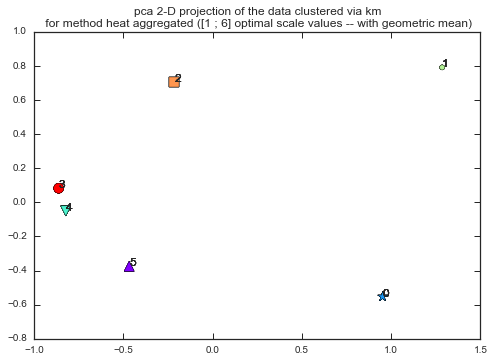

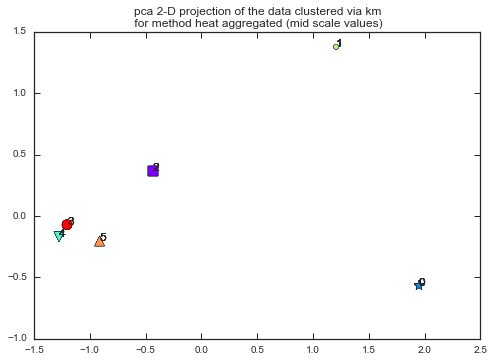

Creating Vertex Features matrix
V is a 40 by 8 matrix.
Node-role matrix is of dimensions 40 by 6
[[ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959  

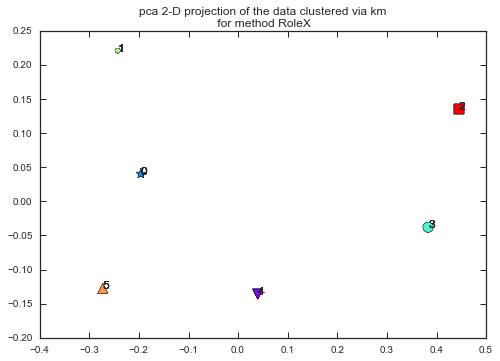

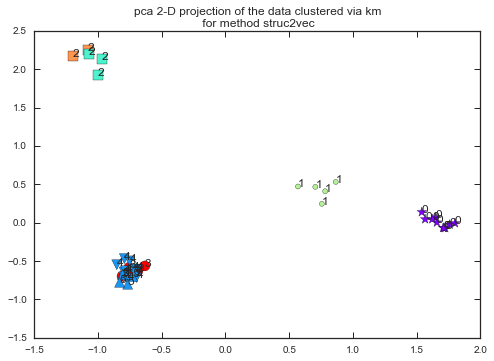

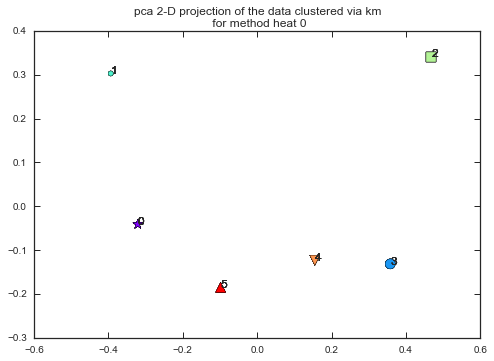

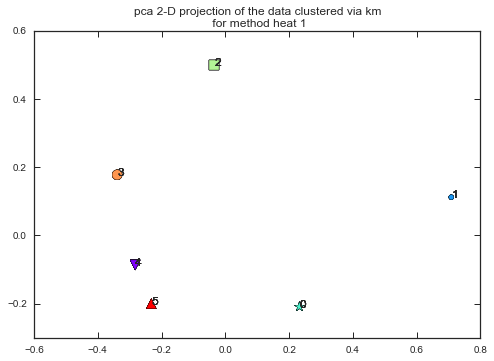

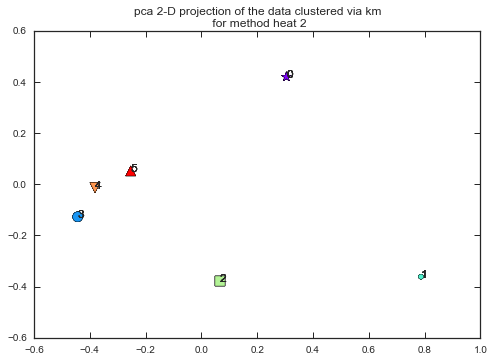

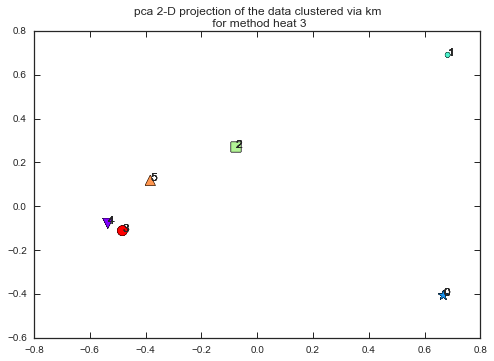

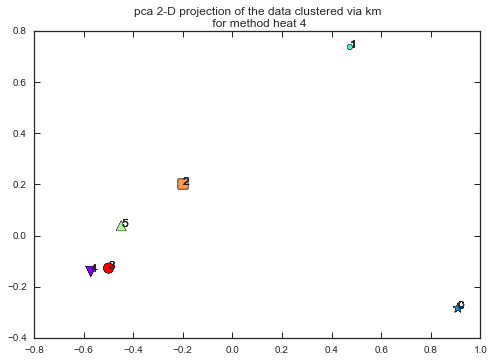

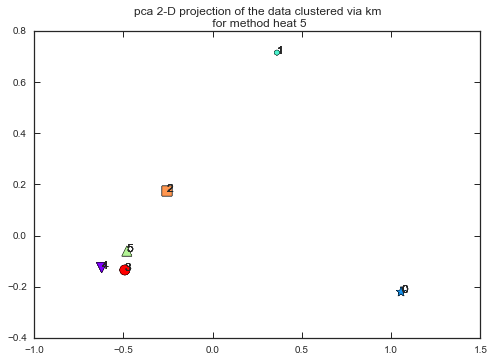

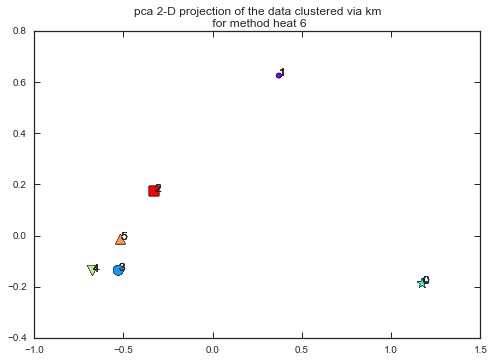

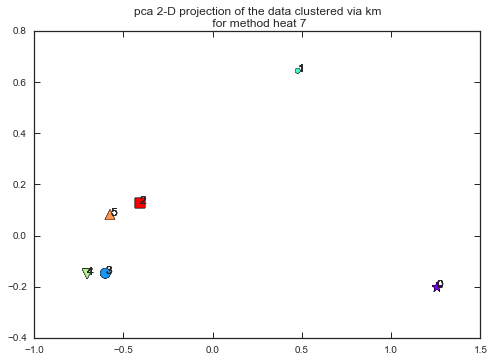

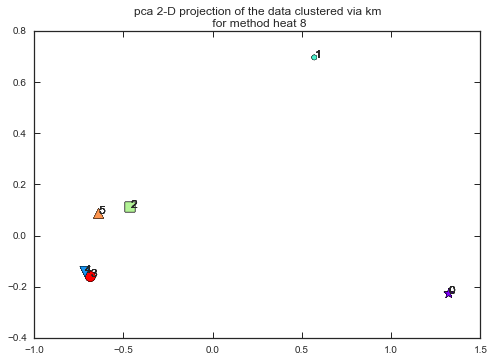

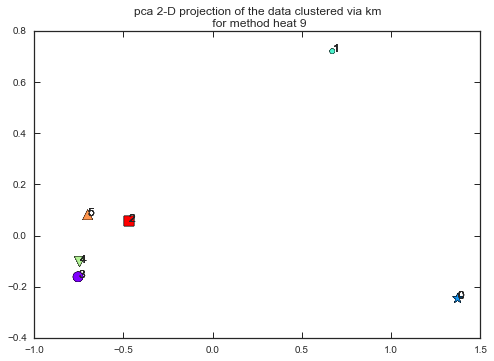

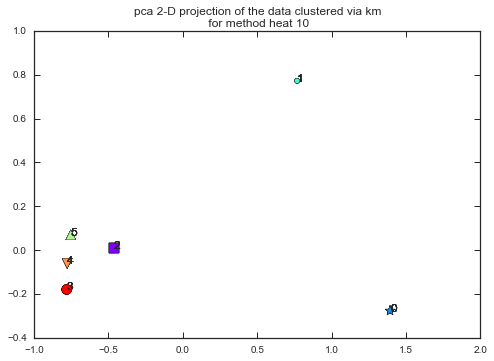

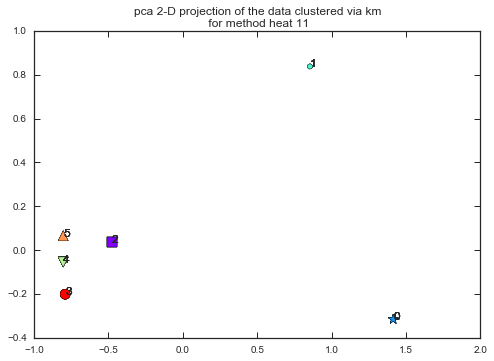

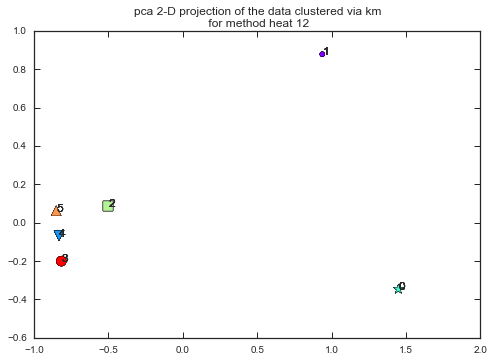

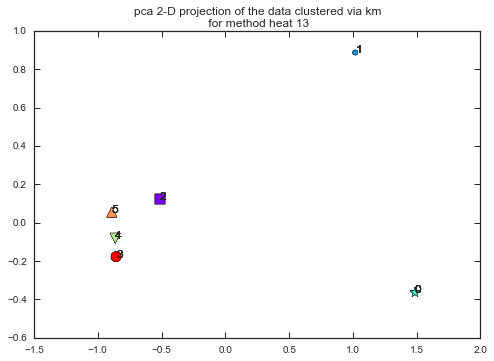

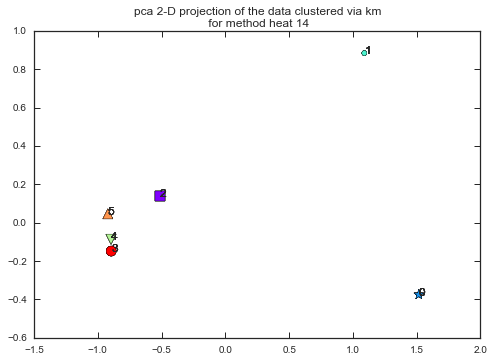

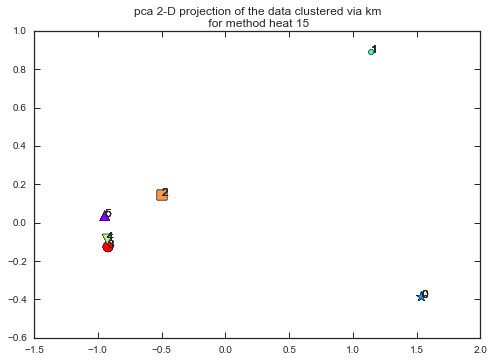

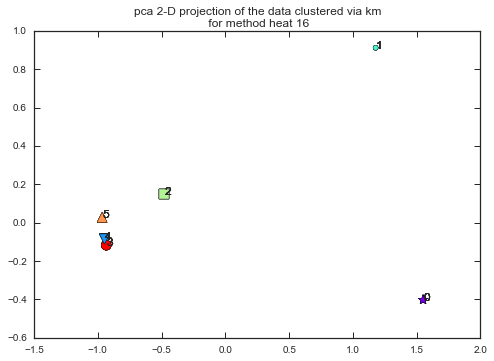

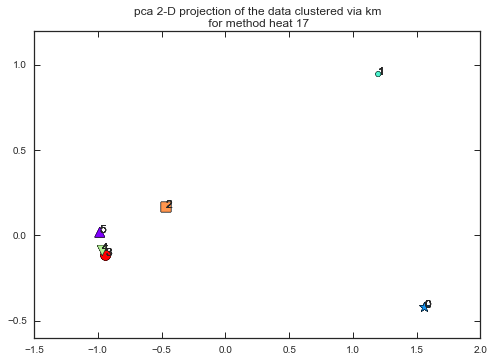

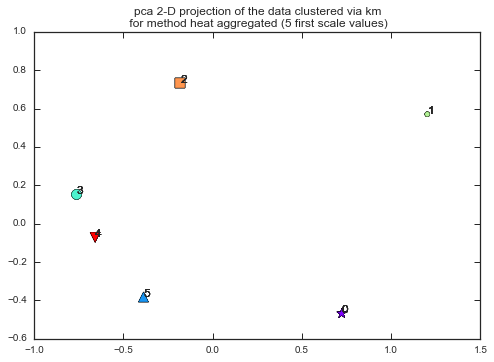

smax= 18  and smin= 1


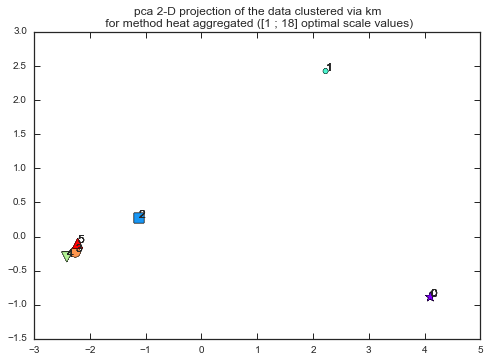

smax= 6  and smin= 1


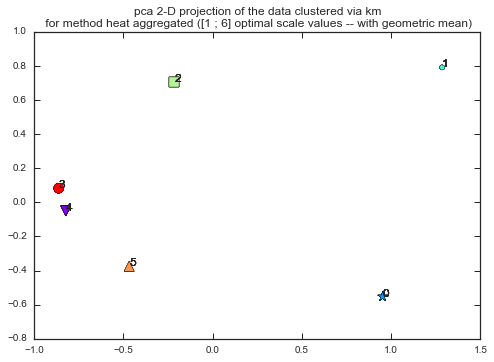

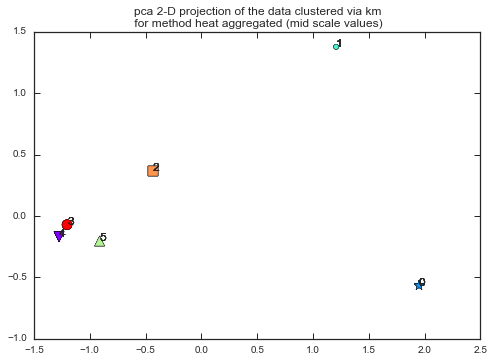

Creating Vertex Features matrix
V is a 40 by 8 matrix.
Node-role matrix is of dimensions 40 by 6
[[ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 532.            0.20418848    6.            1.            8.
     0.02723361    0.02723361    6.        ]
 [ 352.            0.19897959    4.            1.            9.
     0.0199412     0.0199412     4.        ]
 [ 352.            0.19897959  

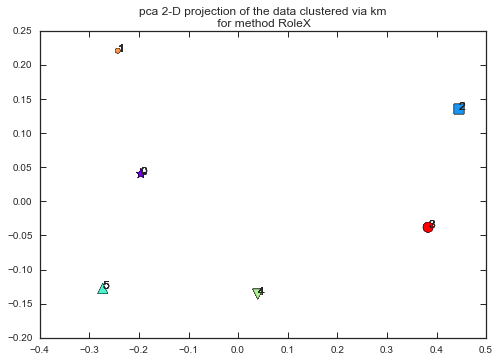

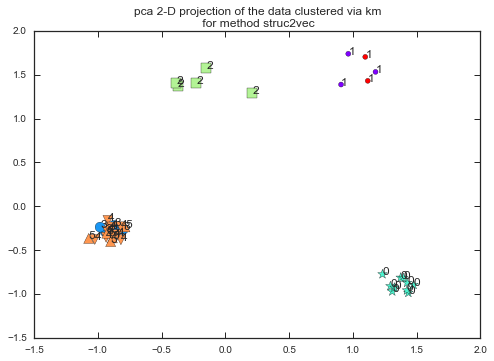

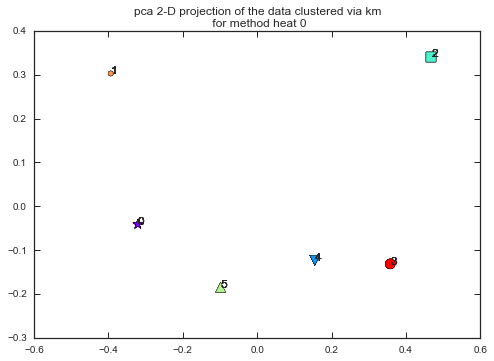

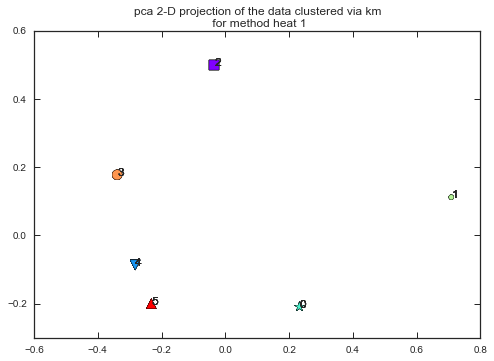

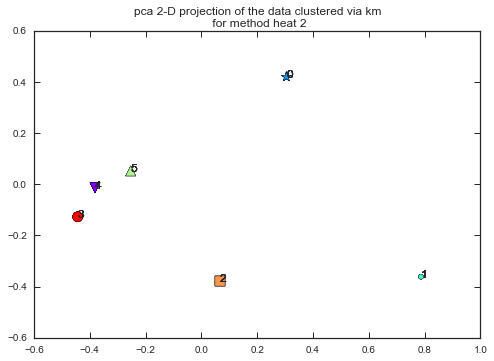

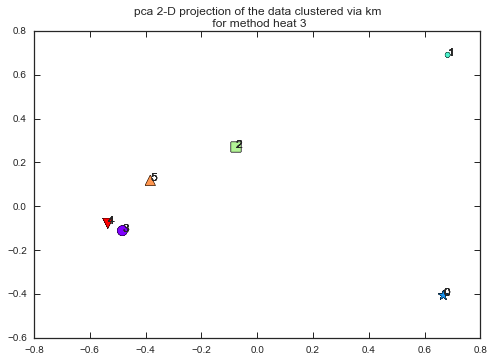

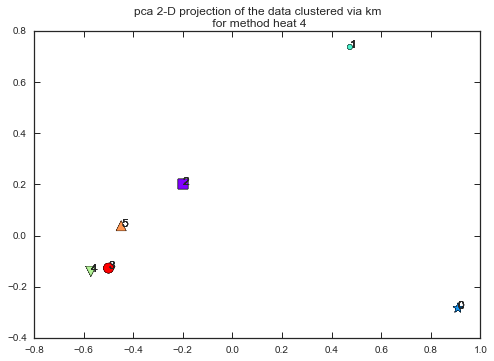

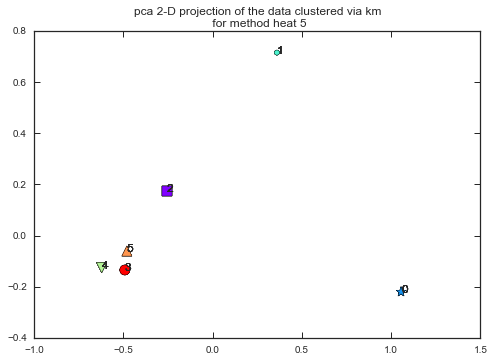

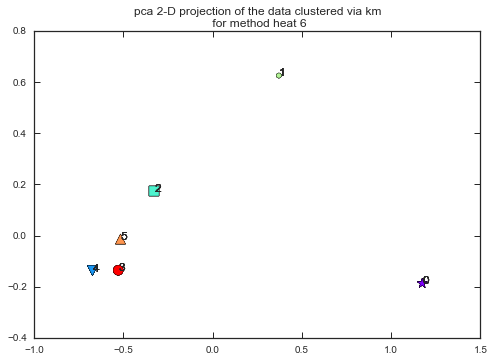

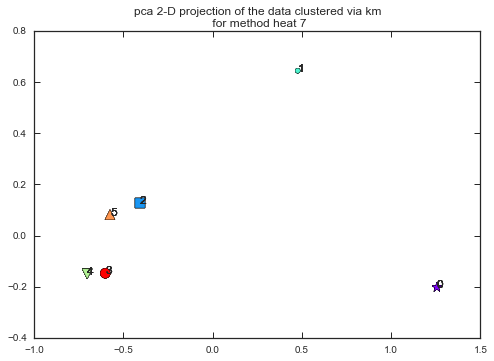

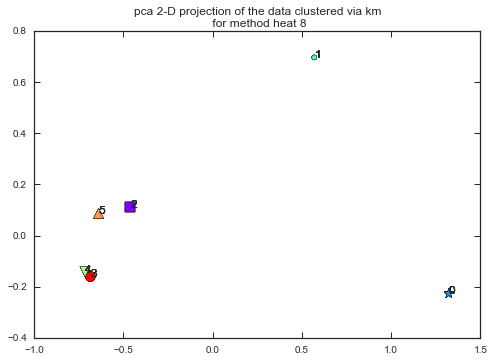

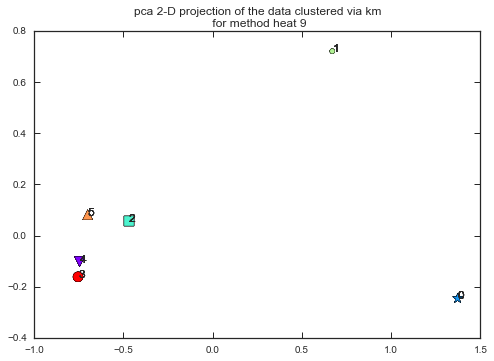

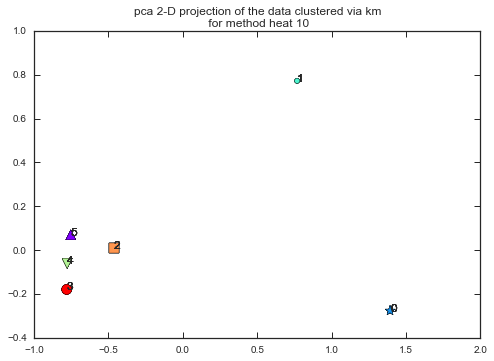

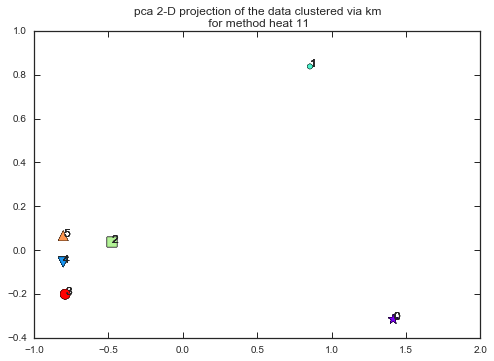

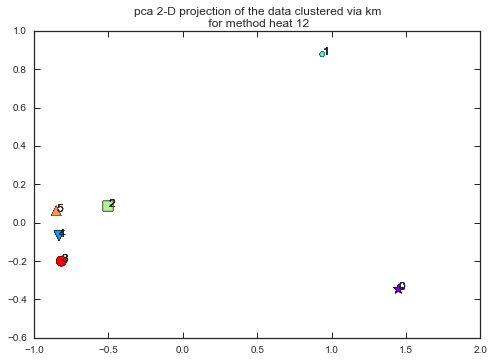

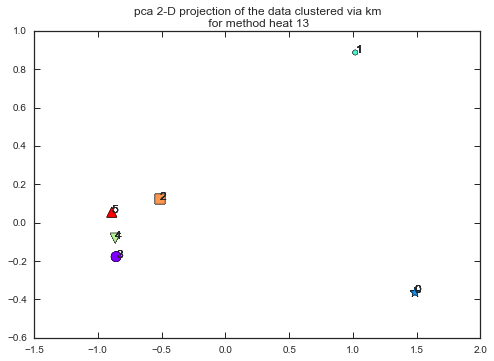

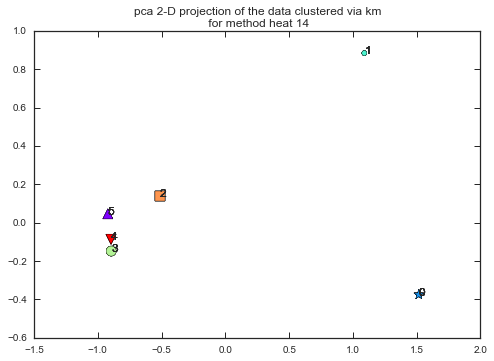

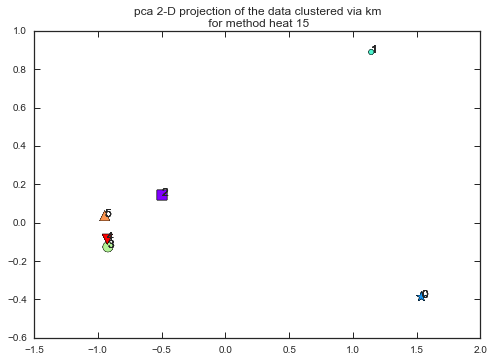

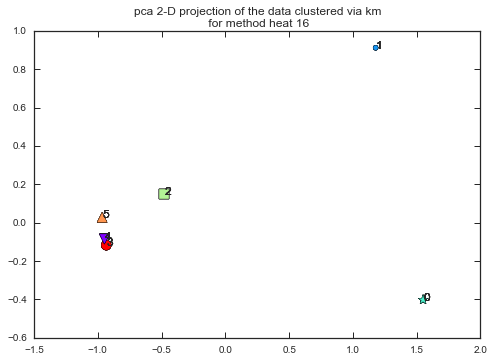

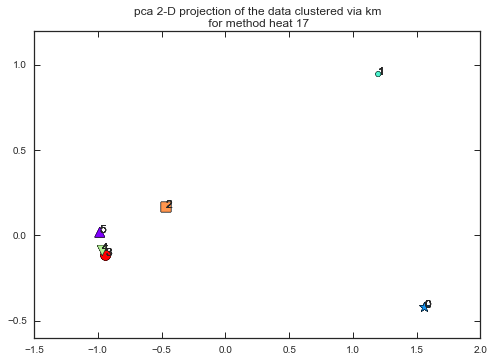

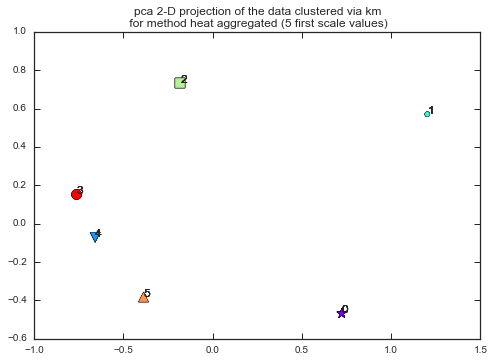

smax= 18  and smin= 1


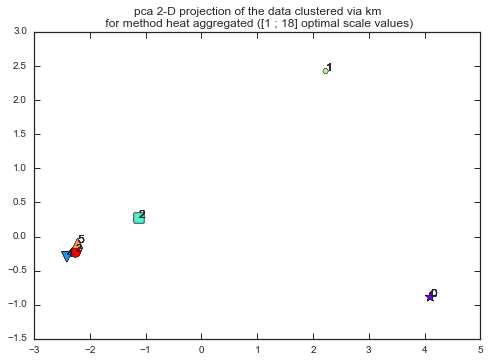

smax= 6  and smin= 1


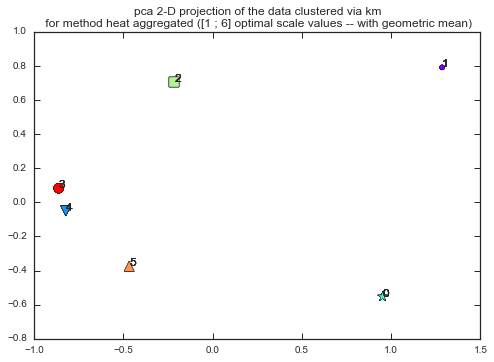

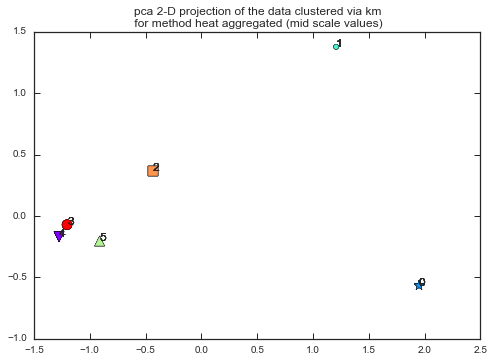

In [7]:
### 1.  Select the range of scales and compute the associated heat wavelets
taus=range(1,20,1)
heat_print=heat_diffusion(G,taus,diff_type="immediate",type_graph="nx")
N=nx.number_of_nodes(G)
B=20
name_graph='regular_houses_'
D={}
chi={}
Perf={}
D_classes={}
D_var={}
### 2. Conduct the comparative analysis described in the introduction passing these wavelets as input
load_from_cache=False
if load_from_cache:
    for b in range(B):
        D[b], chi[b], Perf[b],D_classes[b],D_var[b]=clustering_comparative_analysis(G, colors, heat_print,nb_clust,dirpath='../../structural_equivalents',graph_nodes_name=name_graph+'_nodes.txt',graph_edges_name=name_graph+'_edges.txt',agg_max=5,struc2vec_input=name_graph+'_edges.txt',struc2vec_output=name_graph+'_struc2vec.txt')
    with open('../caches/regular_houses_trials.pkl', "wb") as f:
            pickle.dump(data, f) 
else:
    with open('../caches/regular_houses_trials.pkl', "rb") as f:
            D, chi, Perf,D_classes,D_var,Ff,Varr=pickle.load(f) 
    

## II. Analyze the data

For each graph, we run different structural role discovery methods, and we then evaluate performance using the following  metrics on the structural signatures returned by the methods.
+ Cluster homogeneity score when we run k-means on the resulting embeddings (with k equal to the true number of roles). This is the conditional entropy of the known roles given the proposed clustering~\citep{rosenberg2007v}. 
+ Cluster completeness score for k-means on the embeddings~\citep{rosenberg2007v}, which evaluates the clustering method's ability to group all the members of a given class in the same cluster.  This reflects whether the roles recovered by the method are well separated.
+ The 4-nearest neighbor purity: since we have generated 5 instances of each shape, the best algorithm should aim to recover 4 nearest neighbors of the same class.
+ An F-statistic, defined as:
	$$ F= \frac{ \text{Between-class variance}}{\text{Within-class variance}  }=\frac{ \frac{1}{K-1} \sum_k  |C_k| (\bar{Y}_k-\bar{Y})^2 }{ \frac{1}{N-K} \sum_k \sum_{i \in C_k} (Y_{i}-\bar{Y}_k)^2   }$$
	where $K$ is the number of roles, $\bar{Y}$ is the overall mean embedding, and the $\bar{Y}_k$ are the centroids of the different (ground-truth) clusters $C_k$.
	This metric compares the ratio of the overall variance with respect to the distances between nodes within each cluster. Ideally, if the algorithm correctly separates classes, this statistic should be large.
+ The median  ratio of  cluster variance over overall variance: $\text{Var}=\text{Median} [\frac{ \frac{1}{|C_k|-1} \sum_{i \in C_k}  (Y_i-\bar{Y}_k)^2 }{ \frac{1}{N-1} \sum_i (Y_{i}-\bar{Y})^2   }]$.  This measures how dense the clusters are with respect to the overall variance of the representations.
+ The number of insightful contrasts $N_{\text{ contrasts}}$, that is, the number of pairwise distances classes for which $d(C_i, C_{j})^2>4\text{Var}(C_i) \quad(*)$. Whenever (*) is realized, the distance between clusters $C_i$ and $C_j$ is on average above $2$ standard deviations of points in cluster $i$, and the algorithm can separate the classes well. 


In [17]:
Perf_tot=pd.DataFrame(np.zeros(Perf[0].shape),index=Perf[0].index, columns=Perf[0].columns)
D_var_tot={kk: pd.DataFrame(np.zeros(D_var[0]['RoleX'].shape),index=D_var[0]['RoleX'].index, columns=D_var[0]['RoleX'].columns) for kk in D_classes[0].keys()}
D_classes_tot={kk: pd.DataFrame(np.zeros(D_classes[0]['RoleX'].shape),index=D_classes[0]['RoleX'].index, columns=D_classes[0]['RoleX'].columns) for kk in D_classes[0].keys()}
for k in Perf.keys():
    Perf_tot+=1.0/len(Perf.keys())*Perf[k]
    for kk in D_var[0].keys():
        D_var_tot[kk]+=1.0/len(Perf.keys())*D_var[k][kk]
        D_classes_tot[kk]+=1.0/len(Perf.keys())*D_classes[k][kk]


In [18]:
 Perf_tot.sort_values('purity4')

homogeneity  completeness     score  purity1  purity2  purity3  \
struc2vec        0.845032      0.895552  0.849583  0.88375  1.73125  2.54875   
chi_agg1_5       1.000000      1.000000  0.000000  1.00000  2.00000  3.00000   
chi_opt1_18      1.000000      1.000000  0.000000  1.00000  2.00000  3.00000   
chi_opt2         1.000000      1.000000  0.000000  1.00000  2.00000  3.00000   
chi5             1.000000      1.000000  1.000000  1.00000  2.00000  3.00000   
chi4             1.000000      1.000000  1.000000  1.00000  2.00000  3.00000   
chi7             1.000000      1.000000  1.000000  1.00000  2.00000  3.00000   
chi6             1.000000      1.000000  1.000000  1.00000  2.00000  3.00000   
chi1             1.000000      1.000000  1.000000  1.00000  2.00000  3.00000   
chi0             1.000000      1.000000  1.000000  1.00000  2.00000  3.00000   
chi3             1.000000      1.000000  1.000000  1.00000  2.00000  3.00000   
chi2             1.000000      1.000000  1.000000  1.00000  2.00000  3.00000   
chi9             1.000000      1.000000  1.000000  1.00000  2.00000  3.00000   
chi8             1.000000      1.000000  1.000000  1.00000  2.00000  3.00000   
chi17            1.000000      1.000000  1.000000  1.00000  2.00000  3.00000   
chi16            1.000000      1.000000  1.000000  1.00000  2.00000  3.00000   
chi15            1.000000      1.000000  1.000000  1.00000  2.00000  3.00000   
chi14            1.000000      1.000000  1.000000  1.00000  2.00000  3.00000   
chi13            1.000000      1.000000  1.000000  1.00000  2.00000  3.00000   
chi12            1.000000      1.000000  1.000000  1.00000  2.00000  3.00000   
chi11            1.000000      1.000000  1.000000  1.00000  2.00000  3.00000   
chi10            1.000000      1.000000  1.000000  1.00000  2.00000  3.00000   
chi_agg1_mid     1.000000      1.000000  0.000000  1.00000  2.00000  3.00000   
RoleX            1.000000      1.000000  1.000000  1.00000  2.00000  3.00000   

              purity4  purity5  purity6  purity7  purity8  purity9  purity10  \
struc2vec     3.31875  3.79125    4.265   4.7275  5.17125     5.59   5.76125   
chi_agg1_5    4.00000  4.50000    5.000   5.5000  6.00000     6.50   6.50000   
chi_opt1_18   4.00000  4.50000    5.000   5.5000  6.00000     6.50   6.50000   
chi_opt2      4.00000  4.50000    5.000   5.5000  6.00000     6.50   6.50000   
chi5          4.00000  4.50000    5.000   5.5000  6.00000     6.50   6.50000   
chi4          4.00000  4.50000    5.000   5.5000  6.00000     6.50   6.50000   
chi7          4.00000  4.50000    5.000   5.5000  6.00000     6.50   6.50000   
chi6          4.00000  4.50000    5.000   5.5000  6.00000     6.50   6.50000   
chi1          4.00000  4.50000    5.000   5.5000  6.00000     6.50   6.50000   
chi0          4.00000  4.50000    5.000   5.5000  6.00000     6.50   6.50000   
chi3          4.00000  4.50000    5.000   5.5000  6.00000     6.50   6.50000   
chi2          4.00000  4.50000    5.000   5.5000  6.00000     6.50   6.50000   
chi9          4.00000  4.50000    5.000   5.5000  6.00000     6.50   6.50000   
chi8          4.00000  4.50000    5.000   5.5000  6.00000     6.50   6.50000   
chi17         4.00000  4.50000    5.000   5.5000  6.00000     6.50   6.50000   
chi16         4.00000  4.50000    5.000   5.5000  6.00000     6.50   6.50000   
chi15         4.00000  4.50000    5.000   5.5000  6.00000     6.50   6.50000   
chi14         4.00000  4.50000    5.000   5.5000  6.00000     6.50   6.50000   
chi13         4.00000  4.50000    5.000   5.5000  6.00000     6.50   6.50000   
chi12         4.00000  4.50000    5.000   5.5000  6.00000     6.50   6.50000   
chi11         4.00000  4.50000    5.000   5.5000  6.00000     6.50   6.50000   
chi10         4.00000  4.50000    5.000   5.5000  6.00000     6.50   6.50000   
chi_agg1_mid  4.00000  4.50000    5.000   5.5000  6.00000     6.50   6.50000   
RoleX         4.00000  4.50000    5.000   5.5000  6.00000     6.50   6.50000   

            

### Average square distance between classes

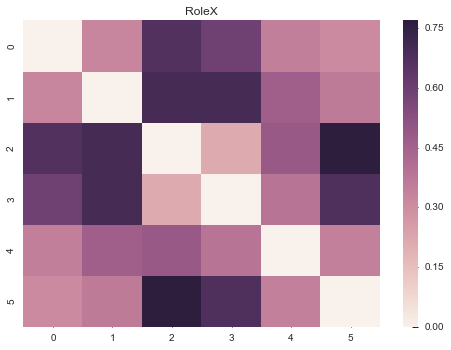

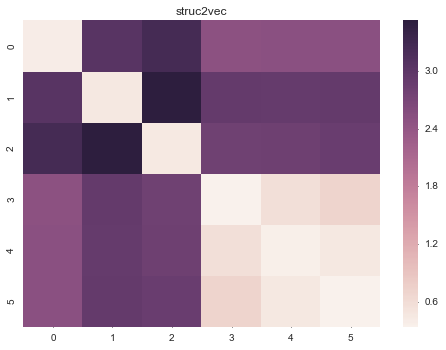

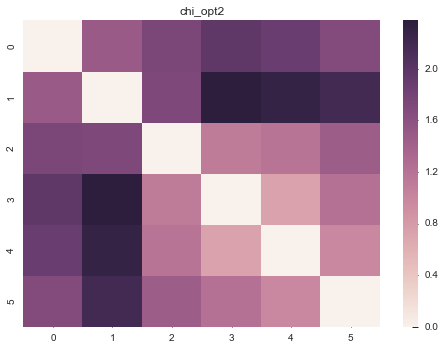

In [19]:
plt.figure()
sb.heatmap(D_classes_tot['RoleX'])
plt.title('RoleX')
plt.figure()
sb.heatmap(D_classes_tot['struc2vec'])
plt.title('struc2vec')
plt.figure()
sb.heatmap(D_classes_tot['chi_opt2'])
plt.title('chi_opt2')

### Significant contrasts

In [25]:
C=len(np.unique(colors))
for k in D_classes[0].keys():
    try:
        print"for", k, " the average percentage of contrasts greater than 4 is ",np.mean([1.0/(C*(C-1))*np.sum(np.diag(1.0/np.diag(D_var[j][k].iloc[:8,:8])).dot(D_var[j][k].iloc[:8,:8])>4) for j in D.keys()]),'\n'
    except:
        print 'pass ',k

for chi_agg1_5  the average percentage of contrasts greater than 4 is  1.0 

for chi10  the average percentage of contrasts greater than 4 is  1.0 

for chi11  the average percentage of contrasts greater than 4 is  1.0 

for chi12  the average percentage of contrasts greater than 4 is  1.0 

for chi13  the average percentage of contrasts greater than 4 is  1.0 

for chi14  the average percentage of contrasts greater than 4 is  1.0 

for chi15  the average percentage of contrasts greater than 4 is  1.0 

for chi16  the average percentage of contrasts greater than 4 is  1.0 

for chi17  the average percentage of contrasts greater than 4 is  1.0 

for struc2vec  the average percentage of contrasts greater than 4 is  0.83 

for chi8  the average percentage of contrasts greater than 4 is  1.0 

for chi9  the average percentage of contrasts greater than 4 is  1.0 

for chi2  the average percentage of contrasts greater than 4 is  1.0 

for chi3  the average percentage of contrasts greater tha

/Users/cdonnat/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in divide
/Users/cdonnat/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in greater


## Comparing the clustering results

As detailed in the introduction, to quantify the performance of the method and the relevance of the topological representations that it yields, we assess compare the clustering obtained by using these representation as input.

In [21]:
D_class_r=pd.DataFrame(np.zeros((len(np.unique(colors)),len(np.unique(colors)))),index=np.unique(colors),columns=np.unique(colors))
for l in np.unique(colors):
index_nodes_color_l=[i for i in range(len(colors)) if colors[i]==l]
for ll in np.unique(colors):
            index_nodes_color_ll=[i for i in range(len(colors)) if colors[i]==ll]
            D_class[k].loc[l,ll]=np.mean(D[k][index_nodes_color_l,:][:,index_nodes_color_ll])
            try:
                D_var[k]=density(chi[k],colors)
        except:
            pass

IndentationError: expected an indented block (<ipython-input-21-a4c11542ab65>, line 3)

In [ ]:
len(np.unique(colors))


In [ ]:
0.5*Perf_tot


In [ ]:
## Visualize the Characteristic signatures associated to a "bunch" of nodes
bunch=[0,1,2,3,5,16,21,24,25,29]
cmap=plt.get_cmap('inferno')
x=np.linspace(0,1,N)
mode=2
plot_bunch_characteristic_functions(heat_print,mode, bunch,color_bunch=[colors[b] for b in bunch],savefig=False,fileplot="plots_paper/plot_characteristic_perturbed_graph.png")
 
    
    

In [ ]:
[colors[b] for b in bunch]

In [ ]:
rows=np.setdiff1d(Perf.index,['RoleX','struc2vec'])
col=['purity'+str(i) for i in range(1,16)]
score_diff=pd.DataFrame(np.zeros((Perf.shape[0]-2,15)), index=rows,columns=['purity'+str(i) for i in range(1,16)])
score_diff2=pd.DataFrame(np.zeros((Perf.shape[0]-2,15)), index=rows,columns=['purity'+str(i) for i in range(1,16)])

for r in rows:
    score_diff.loc[r]=Perf.loc[r][col]-Perf.loc['RoleX'][col]
    score_diff2.loc[r]=Perf.loc[r][col]-Perf.loc['struc2vec'][col]


    

In [ ]:
cc=0


fig, ax = plt.subplots()
sb.set(style='ticks')
sb.set_context("paper", font_scale=1.5)
ax.set_ylim([-1,5])
ax.plot(range(1,16),score_diff.iloc[1,:],c=colors_ref[cc],label="tau=1,RolX")
cc+=1
ax.plot(range(1,16),score_diff.iloc[3,:],c=colors_ref[cc],label="tau=5,RolX")
cc+=1
plt.plot(range(1,16),score_diff.iloc[7,:],c=colors_ref[cc],label="tau=15,RolX")
cc+=1
ax.plot(range(1,16),score_diff2.iloc[1,:],c=colors_ref[cc],label="tau=1, struc2Vec")
cc+=1
ax.plot(range(1,16),score_diff2.iloc[3,:],c=colors_ref[cc],label="tau=5, struc2Vec")
cc+=1
plt.plot(range(1,16),score_diff2.iloc[7,:],c=colors_ref[cc],label="tau=15, struc2Vec")
cc+=1
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.legend(loc="upper left")
plt.title("Difference in Neighbor Purity levels for different scales")


In [ ]:
Perf.loc[rows[0]]

In [ ]:
score_diff.iloc[1,:]

In [26]:
##### Visualize the nearest neighbor graph obtained for each scale/mode value

compute_nearest_role=True
if compute_nearest_role==True:
    A={}
    for tau in D.keys():
            G_role=nx.Graph()
            G_role.add_nodes_from(range(nx.number_of_nodes(G)))
            k=3 ### Numbers of neighbors needed for our perturbation test
            score=0
            for n in range(nx.number_of_nodes(G)):
                neighbors=np.argsort(D[tau][n,:]).tolist()
                neighbors=neighbors[1:(k+1)]
                roles_neighbors=[colors[nn] for nn in neighbors  ]
                success_rate=len([nn for nn in neighbors if colors[nn]==colors[n] ])*1.0/k
                score+=success_rate/N
                
                for nn in neighbors:
                    G_role.add_edge(n,nn)
            plt.figure()
            nx.draw_networkx(G_role,node_color=colors,cmap="hot")    
            plt.title(tau)
            A[tau]=nx.adjacency_matrix(G_role)
            

TypeError: unhashable type

## III. Varied shapes

In [27]:

################################### EXAMPLE TO BUILD A MORE COMPLICATED STRUCTURE ##########
######### Alternatively, to define a structure with different types of patterns, pass them as a list
######### In the following example, we have 3 fans (with param. 6), 3 stars on 4 nodes, and 3 house shapes
name_graph='regular'
width_basis=30
list_shapes=[["fan",6]]*5+[["star",4]]*5+[["house"]]*5
G,colors_shape, plugins,colors=build_structure(width_basis,basis_type,list_shapes, start=0,add_random_edges=0,plot=False,savefig=False)
A=nx.adjacency_matrix(G).todense()
nb_clust=len(np.unique(colors))

taus=range(1,20,1)
heat_print=heat_diffusion(G,taus,diff_type="immediate",type_graph="nx")
N=nx.number_of_nodes(G)
B=20
name_graph='regular_varied_'
D={}
chi={}
Perf={}
D_classes={}
D_var={}
### 2. Conduct the comparative analysis described in the introduction passing these wavelets as input
load_from_cache=False
if load_from_cache:
    for b in range(B):
        D[b], chi[b], Perf[b],D_classes[b],D_var[b]=clustering_comparative_analysis(G, colors, heat_print,nb_clust,dirpath='../../structural_equivalents',graph_nodes_name=name_graph+'_nodes.txt',graph_edges_name=name_graph+'_edges.txt',agg_max=5,struc2vec_input=name_graph+'_edges.txt',struc2vec_output=name_graph+'_struc2vec.txt')
    with open('../caches/regular_varied_trials.pkl', "wb") as f:
            pickle.dump(data, f) 
else:
    with open('../caches/regular_varied_trials.pkl', "rb") as f:
            D, chi, Perf,D_classes,D_var,Ff,Varr=pickle.load(f) 
    
    
    
    

2017-10-12 17:41:31,875:[INFO](pygsp.filters.filter.__init__): Heat : has to compute lmax
2017-10-12 17:41:31,918:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-10-12 17:41:31,972:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-10-12 17:41:32,005:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby


[1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1]
whoops
whoops
whoops
['Basis', 'fan', 'star', 'house']


2017-10-12 17:41:32,043:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-10-12 17:41:32,077:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-10-12 17:41:32,125:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-10-12 17:41:32,171:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-10-12 17:41:32,220:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-10-12 17:41:32,261:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-10-12 17:41:32,305:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-10-12 17:41:32,354:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-10-12 17:41:32,401:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-10-12 17:41:32,430:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-10-12 17:41:32,463:[INFO](pygsp.filters.filter.analysis): The analysis meth

IOError: [Errno 2] No such file or directory: '../caches/regular_varied_trials.pkl'

### IV. EFFECT OF THE DISTANCES

We now try to estimate the impact of the distances on the accuracy of the result

In [ ]:
width_basis=40
list_shapes=[["fan",6]]*7+[["star",8]]*7+[["house"]]*7
G,colors_shape, plugins,colors=build_structure(width_basis,basis_type,list_shapes, start=0,add_random_edges=0,plot=False,savefig=False)
A=nx.adjacency_matrix(G).todense()
nb_clust=len(np.unique(colors))
taus=range(1,20,1)
heat_print=heat_diffusion(G,taus,diff_type="immediate",type_graph="nx")

D, chi, Perf,D_classes,D_var= clustering_comparative_analysis_distances(G, \
        colors, heat_print,nb_clust,dirpath='/Users/cdonnat/Desktop/structural_equivalents',\
        graph_nodes_name='nodes.txt',graph_edges_name='edges.txt',agg_max=5,\
        struc2vec_input='edges.txt',struc2vec_output='testy_dist.txt')
    

From the PCA projections, we directly spot that the EMD and KS distance are actually not able to characterize structural equivalents. This highlights the importance of correctly selecting a proper distance for this task, as well as the decisiveness of the characteristic distance.